In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
from pickle import load
import pandas as pd
import seaborn as sns

from eoles.write_output import make_area_plot, make_line_plot, plot_simulation, plot_comparison, comparison_simulations
from eoles.inputs.resources import resources_data
sns.set_theme(context="notebook", style="white")

# Sensitivity analysis

In [65]:
sensitivity_results_path = os.path.join("eoles", "outputs", "sensitivity_resirf", "0117_results_start2020_timestep5_n10.csv")
sensitivity_results = pd.read_csv(sensitivity_results_path, index_col=0)
sensitivity_results["Electricity (TWh)"] = sensitivity_results["Electricity (TWh)"]*1e-3
sensitivity_results["Natural gas (TWh)"] = sensitivity_results["Natural gas (TWh)"]*1e-3
sensitivity_results["Wood fuel (TWh)"] = sensitivity_results["Wood fuel (TWh)"]*1e-3
sensitivity_results["Oil fuel (TWh)"] = sensitivity_results["Oil fuel (TWh)"]*1e-3
sensitivity_results = sensitivity_results.rename(columns={'health_cost': 'Health cost (Billion euro)'})

In [66]:
sensitivity_results

sub_heater  sub_insulation  Electricity (TWh)  Natural gas (TWh)  \
0          0.0        0.000000          36.998362         106.054504   
1          0.0        0.111111          36.883950         105.565479   
2          0.0        0.222222          36.803810         105.120373   
3          0.0        0.333333          36.459257         103.442161   
4          0.0        0.444444          35.820681         100.805282   
..         ...             ...                ...                ...   
95         1.0        0.555556          36.782194          88.745942   
96         1.0        0.666667          34.236546          81.564910   
97         1.0        0.777778          31.532323          71.271896   
98         1.0        0.888889          29.604318          65.174166   
99         1.0        1.000000          27.679703          61.802725   

    Wood fuel (TWh)  Oil fuel (TWh)  Investment heater (Billion euro)  \
0        108.421350       25.959237                         55.315410   
1        107.433922       25.541650                         55.283430   
2        106.739651       25.180267                         55.252426   
3        104.573975       24.360398                         55.159721   
4        100.798439       23.318259                         55.007423   
..              ...             ...                               ...   
95        70.504356       20.240158                         65.327331   
96        64.286451       16.199183                         64.718039   
97        54.735544       13.472197                         63.905341   
98        46.471901       12.101083                         63.190175   
99        40.185647       11.218827                         62.568663   

    Investment insulation (Billion euro)  Subsidies heater (Billion euro)  \
0                              30.573571                         0.000000   
1                              36.970457                         0.000000   
2                              40.277817                         0.000000   
3                              60.639019                         0.000000   
4                              95.966401                         0.000000   
..                                   ...                              ...   
95                            171.361732                        41.436948   
96                            299.133294                        40.585079   
97                            452.555096                        39.452362   
98                            574.161136                        38.498490   
99                            661.186911                        37.684364   

    Subsidies insulation (Billion euro)  ...  \
0                              0.000000  ...   
1                              4.107829  ...   
2                              8.950626  ...   
3                             20.213006  ...   
4                             42.651734  ...   
..                                  ...  ...   
95                            95.200962  ...   
96                           199.422196  ...   
97                           351.987297  ...   
98                           510.365454  ...   
99                           661.186911  ...   

    Replacement Wood fuel-Performance boiler (Thousand)  \
0                                         1125.118479     
1                                         1123.289113     
2                                         1121.600396     
3                                         1116.349786     
4                                         1107.527219     
..                                                ...     
95                                         551.867961     
96                                         544.011735     
97                                         533.876031     
98                                         522.553168     
99                                         509.918657     

    Stock Electricity-Heat pump air (Thousand)  \
0

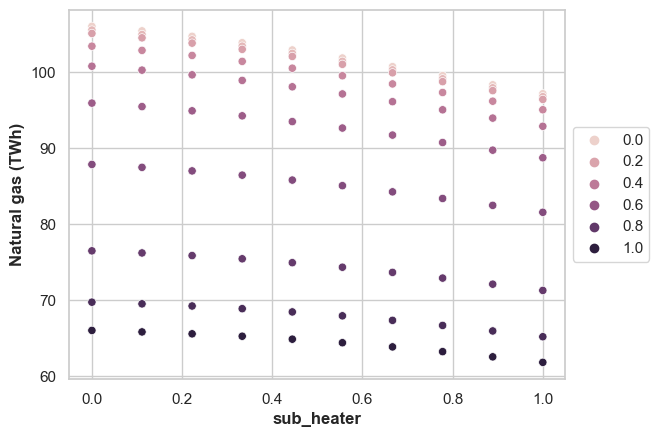

In [67]:
ax = plt.subplot(111)
sns.scatterplot(sensitivity_results, x="sub_heater", y="Natural gas (TWh)", hue="sub_insulation")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

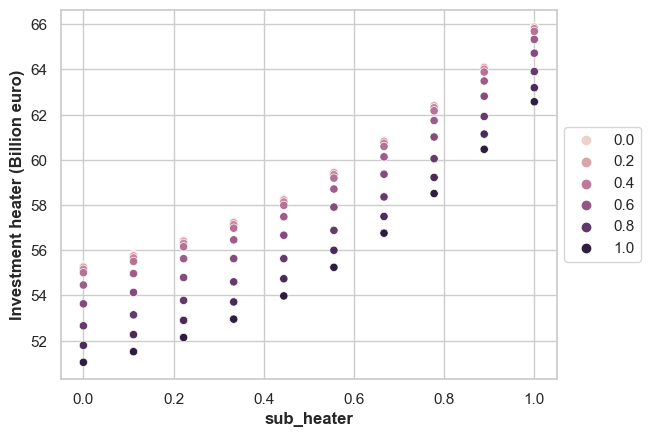

In [68]:
ax = plt.subplot(111)
sns.scatterplot(sensitivity_results, x="sub_heater", y="Investment heater (Billion euro)", hue="sub_insulation")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

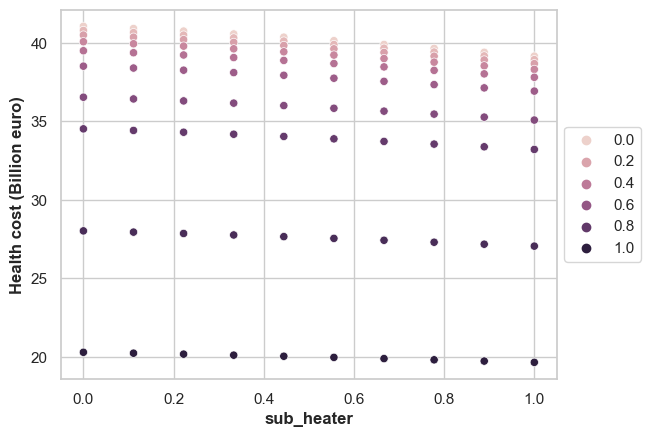

In [69]:
ax = plt.subplot(111)
sns.scatterplot(sensitivity_results, x="sub_heater", y="Health cost (Billion euro)", hue="sub_insulation")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

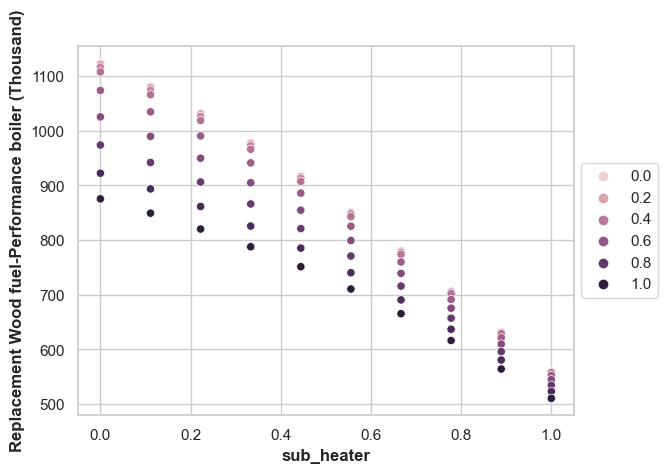

In [70]:
ax = plt.subplot(111)
sns.scatterplot(sensitivity_results, x="sub_heater", y="Replacement Wood fuel-Performance boiler (Thousand)", hue="sub_insulation")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Preliminary analysis

## Simulation 02/21

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from pickle import load
import pandas as pd
import seaborn as sns
from eoles.write_output import format_ax, format_legend

from eoles.write_output import make_area_plot, make_line_plot, plot_simulation, plot_comparison, comparison_simulations
from eoles.inputs.resources import resources_data
sns.set_theme(context="notebook", style="white")

In [36]:
path = os.path.join("eoles/outputs/0223_041634_noHC_efficiency100_simple")
with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
    output = load(file)

In [37]:
output["Transport and distribution price"]

[]

In [31]:
export_results = "eoles/outputs/0223_041634_noHC_efficiency100_simple"
if output is not None:  # we exclude the case where we did not find a way to not violate the carbon budget
    for key in output.keys():
        if key != 'Subvention heater' and key != 'Subvention insulation' and key != 'max_iter' and key !="Electricity price without tax" and key != "Transport and distribution price":
            key_save = '_'.join(key.split('(')[0].lower().split(' ')[:-1])
            output[key].to_csv(os.path.join(export_results, 'dataframes', f'{key_save}.csv'))

    plot_simulation(output, save_path=os.path.join(export_results, "plots"))

In [26]:
path = os.path.join("eoles/outputs/0220_232711_efficiency100_simple_anticipatedSCC")
with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
    output = load(file)

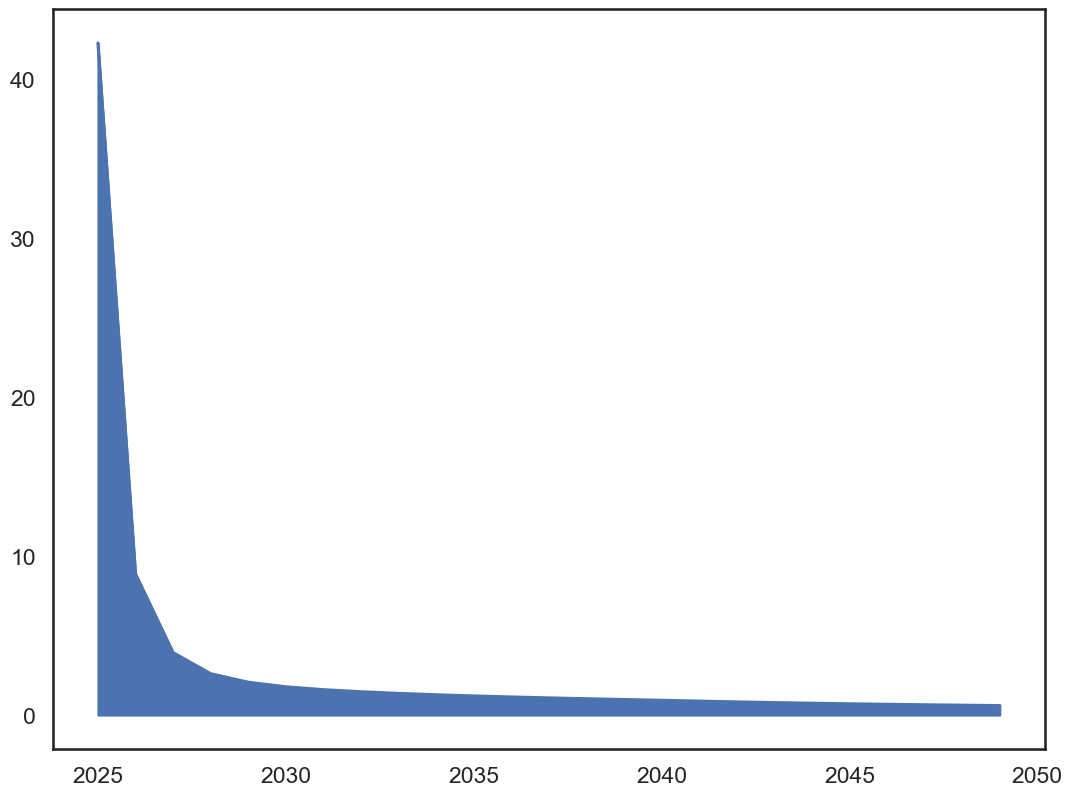

In [27]:
plot_simulation(output, save_path=os.path.join("eoles/outputs/0220_232711_efficiency100_simple_anticipatedSCC/plots"))

### No HC

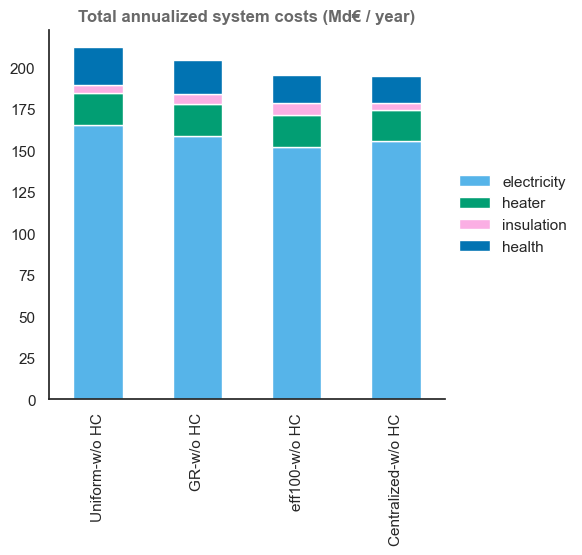

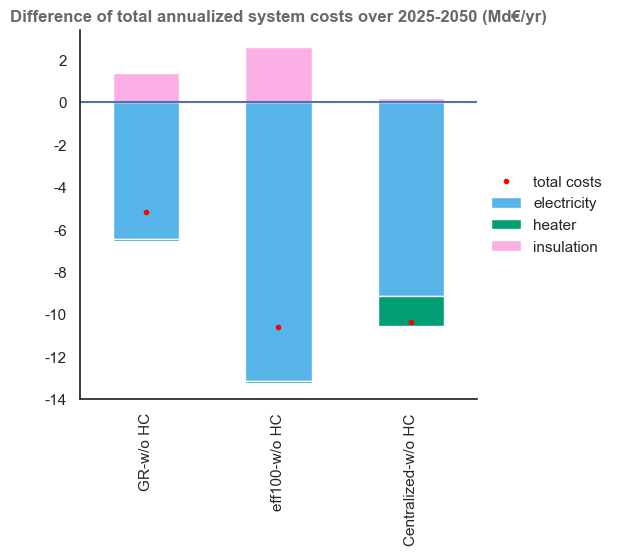

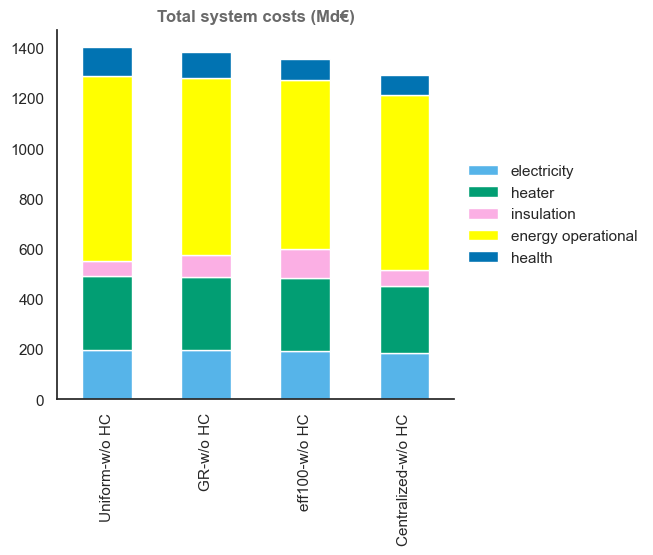

                              Uniform-w/o HC    GR-w/o HC  eff100-w/o HC  \
Investment electricity costs      198.299521   195.059771     194.463146   
Investment heater costs           292.442970   290.759681     291.055245   
Investment insulation costs        59.710777    88.161546     113.614154   
Functionment costs                737.376729   706.013012     672.898093   
Health costs                      114.499764   102.629839      85.794735   
Total costs                      1402.329762  1382.623850    1357.825372   

                              Centralized-w/o HC  
Investment electricity costs          185.719112  
Investment heater costs               266.306334  
Investment insulation costs            65.113784  
Functionment costs                    695.908963  
Health costs                           81.185289  
Total costs                          1294.233482  


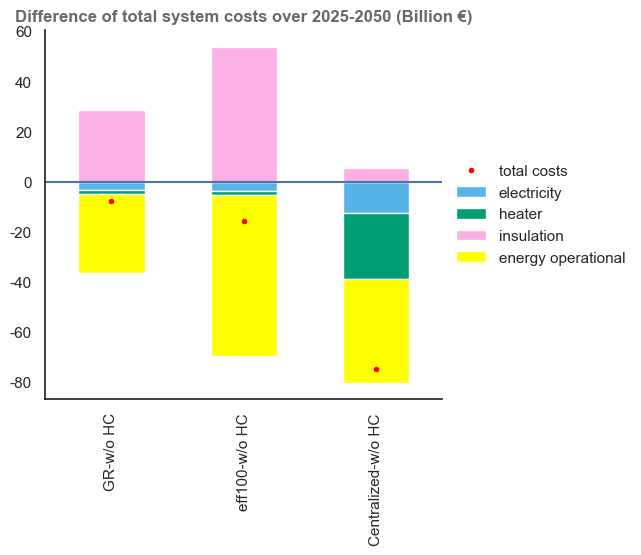

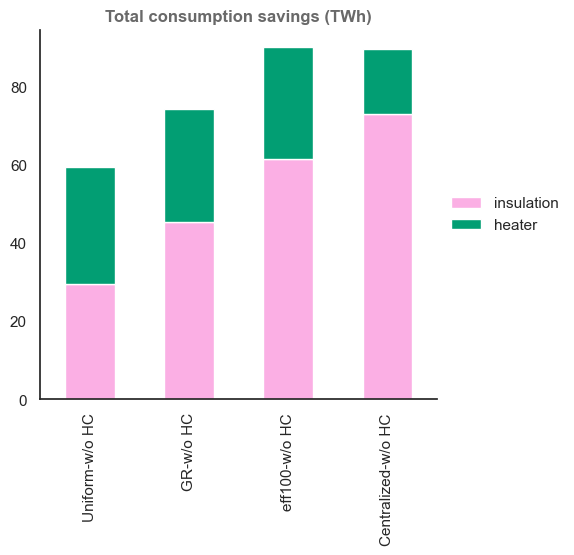

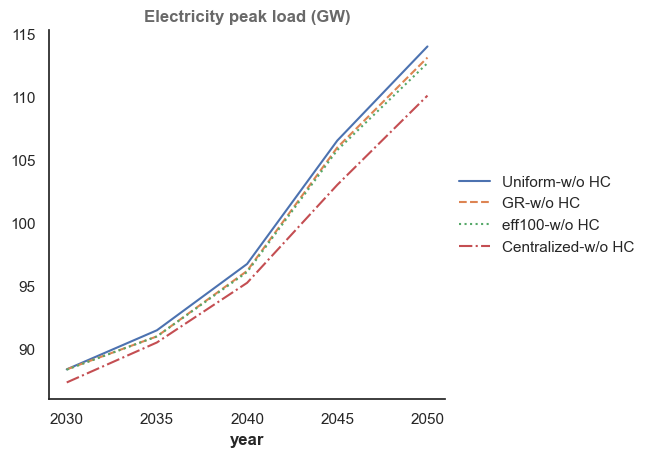

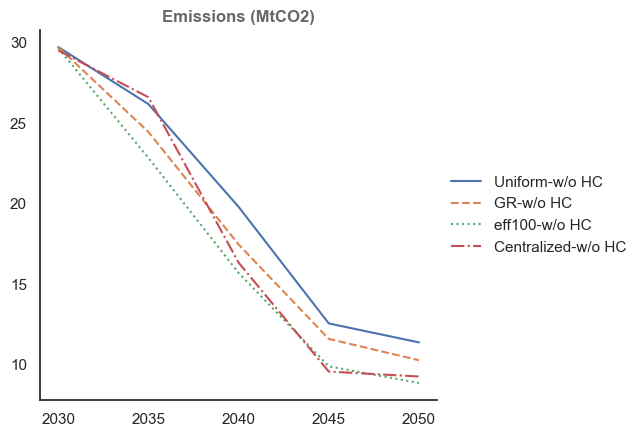

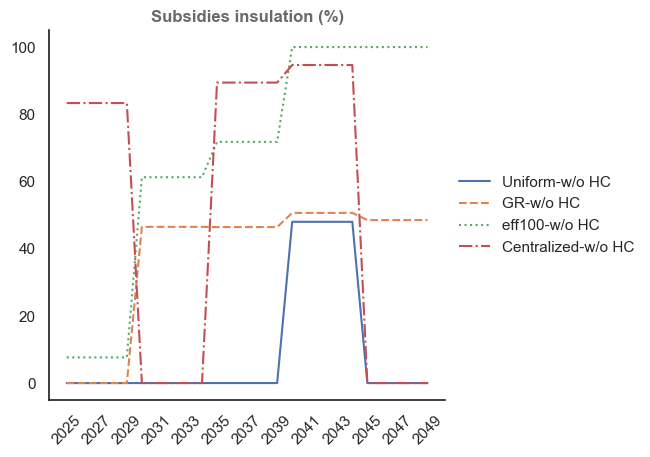

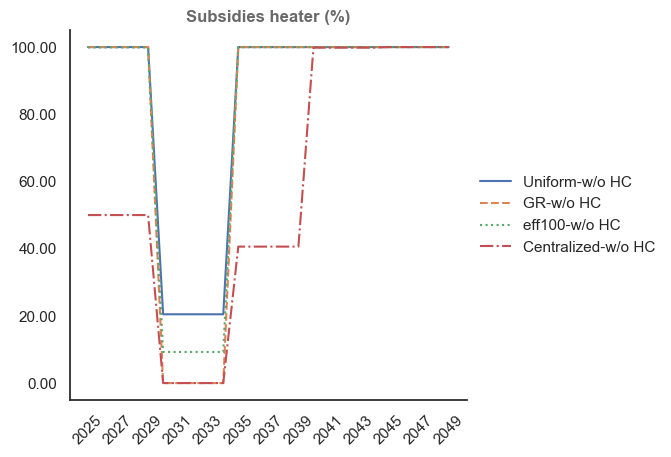

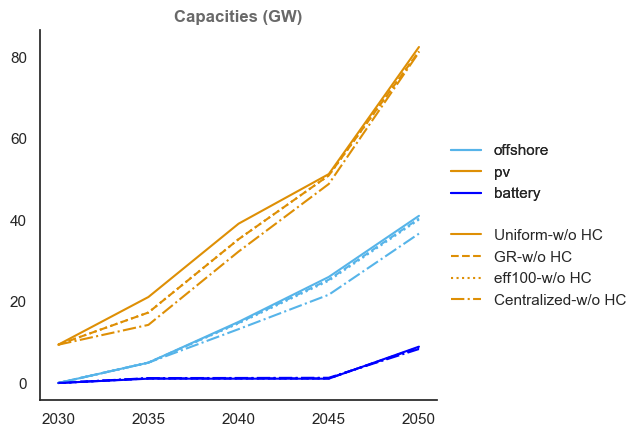

In [2]:
dict_output = {"Uniform-w/o HC": os.path.join("eoles/outputs/0224_072359_noHC_temoin_simple"),
               "GR-w/o HC": os.path.join("eoles/outputs/0224_072216_noHC_global_renovation_simple"),
               "eff100-w/o HC": os.path.join("eoles/outputs/0224_080825_noHC_efficiency100_simple"),
               "Centralized-w/o HC": os.path.join("eoles/outputs/0224_050027_noHC_threshold_simple"),
               # "GR-MF-w/o HC": os.path.join("eoles/outputs/0220_213258_noHC_global_renovation_nolandlord_nomultifamily_simple"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, capacities_dict = comparison_simulations(dict_output, ref="Uniform-w/o HC", health=False, save_path=None)

In [5]:
total_system_costs_df

Uniform-w/o HC  GR-w/o HC  eff100-w/o HC  \
Investment electricity costs      198.299521  -3.239750      -3.836376   
Investment heater costs           292.442970  -1.683289      -1.387725   
Investment insulation costs        59.710777  28.450769      53.903377   
Functionment costs                737.376729 -31.363717     -64.478636   
Health costs                      114.499764 -11.869925     -28.705030   
Total costs                      1402.329762 -19.705912     -44.504390   
Total costs HC excluded          1287.829997  -7.835987     -15.799360   

                              Centralized-w/o HC  
Investment electricity costs          -12.580410  
Investment heater costs               -26.136636  
Investment insulation costs             5.403007  
Functionment costs                    -41.467766  
Health costs                          -33.314475  
Total costs                          -108.096280  
Total costs HC excluded               -74.781805

### Role of HC

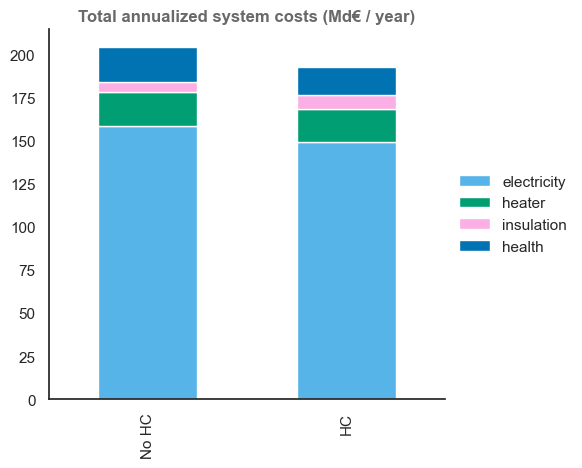

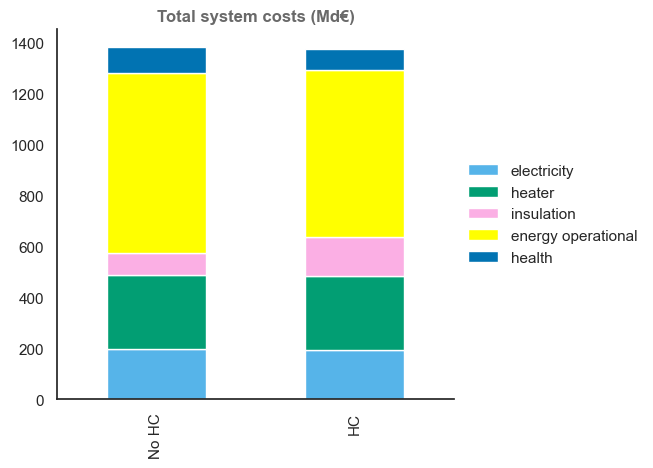

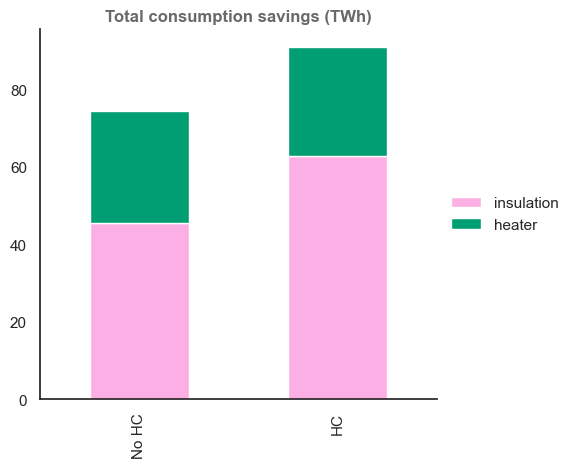

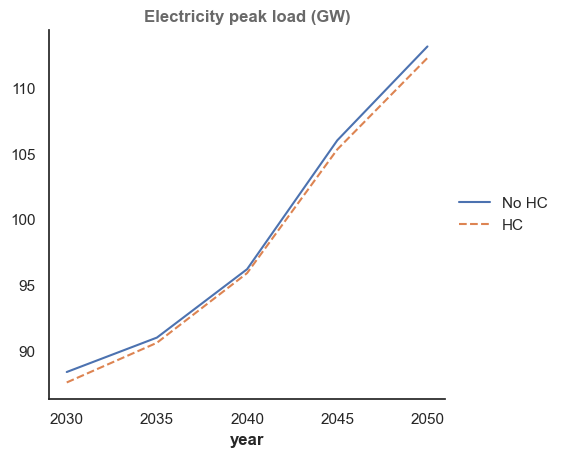

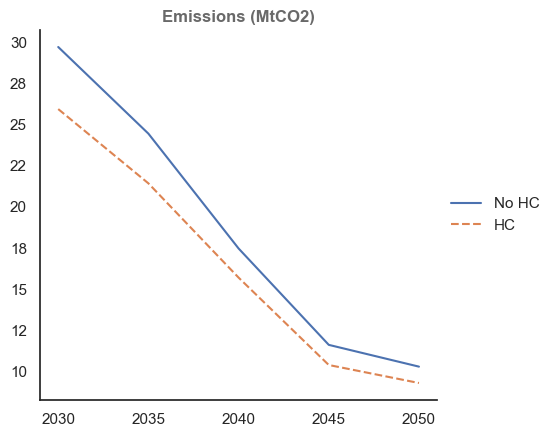

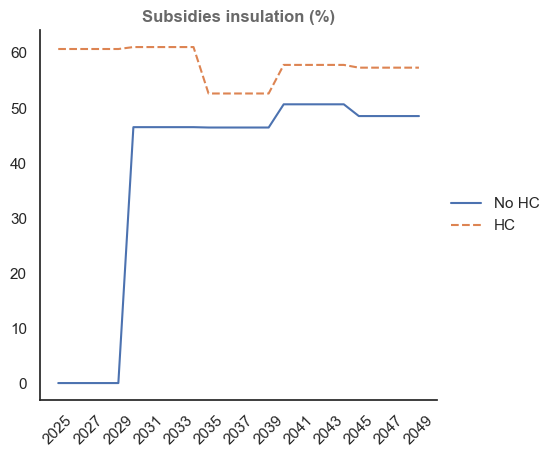

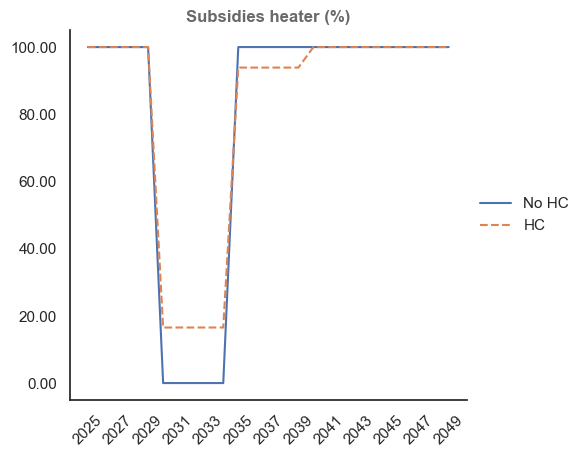

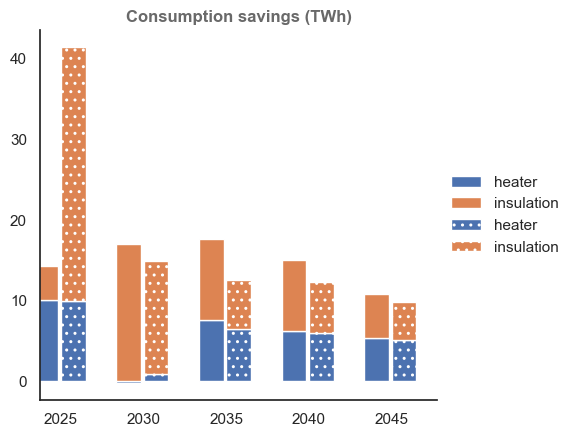

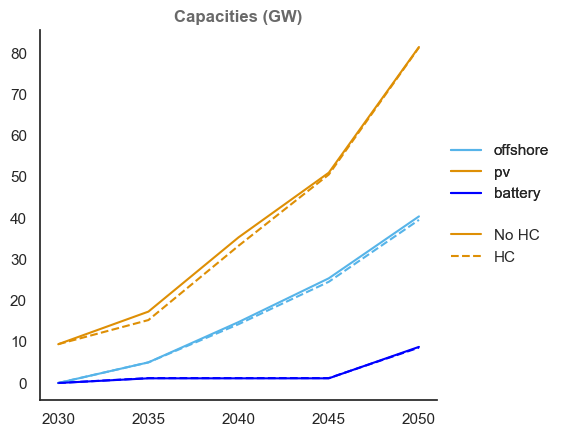

In [5]:
dict_output = {"No HC": os.path.join("eoles/outputs/0224_072216_noHC_global_renovation_simple"),
               "HC": os.path.join("eoles/outputs/0224_070653_global_renovation_simple"),
               # "GR-w/o HC": os.path.join("eoles/outputs/0131_131938_noHC_global_renovation"),
               # "GR": os.path.join("eoles/outputs/0131_105702_global_renovation"),
               # "threshold": os.path.join("eoles/outputs/0131_022136_threshold"),
               # "eff100": os.path.join("eoles/outputs/0131_102021_efficiency100"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="No HC", health=True)

### Role of design

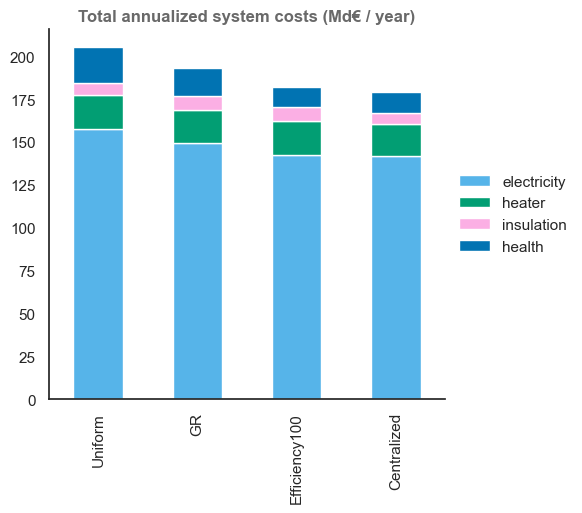

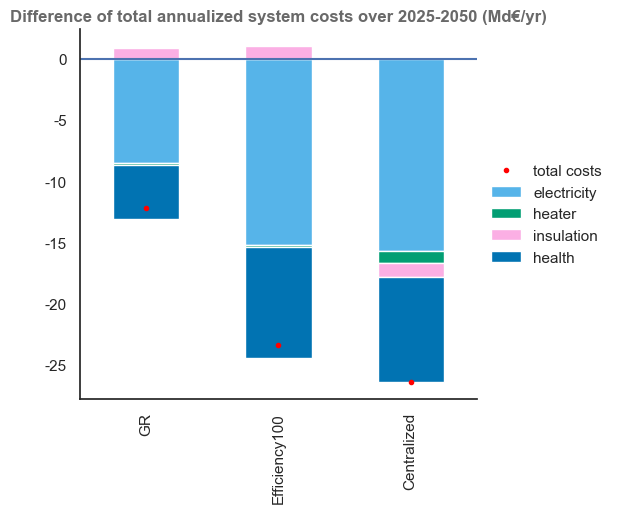

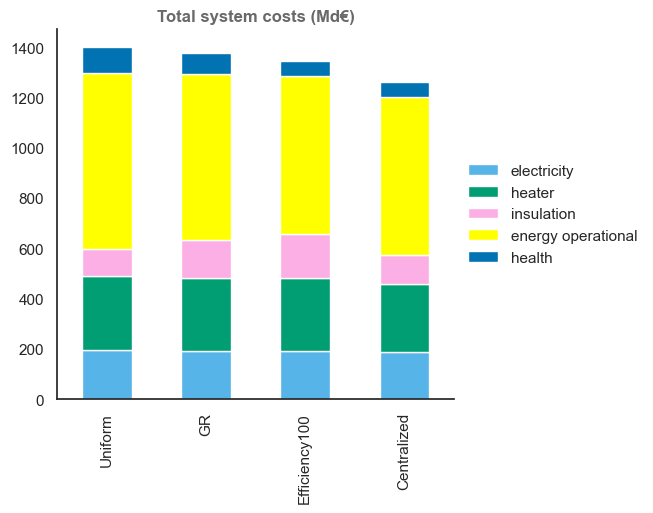

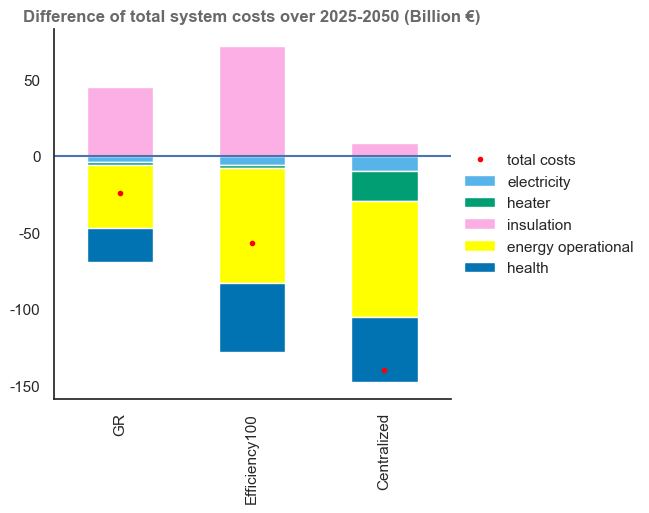

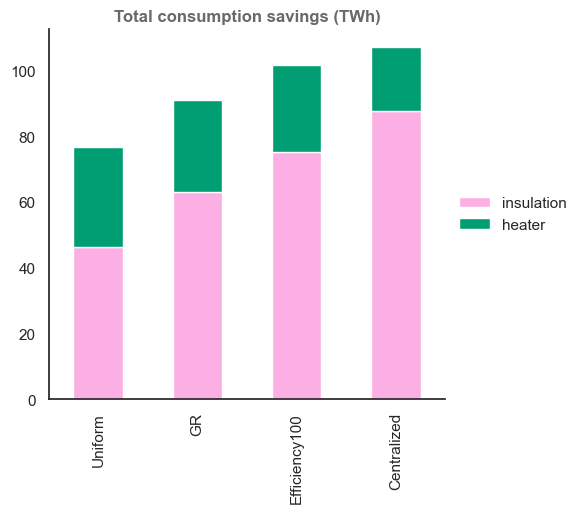

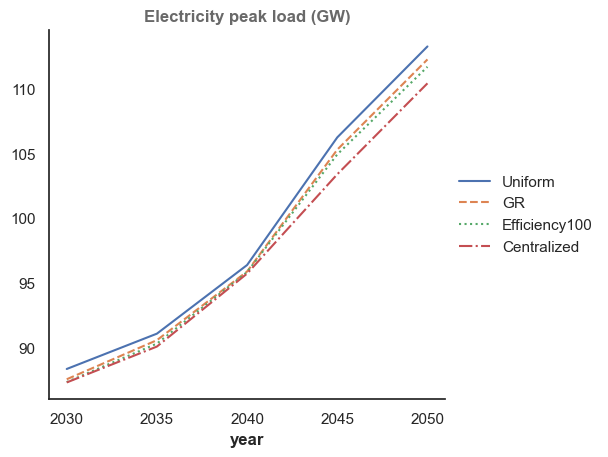

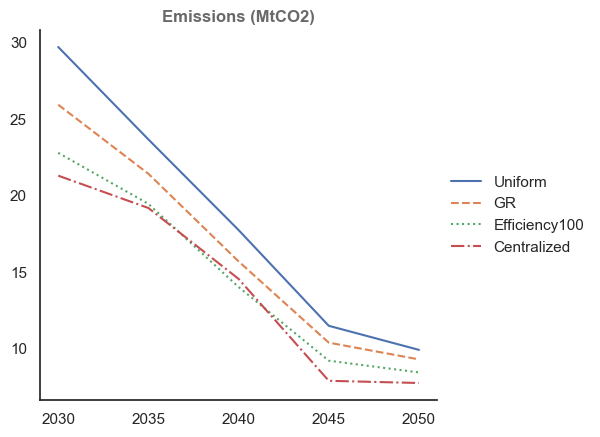

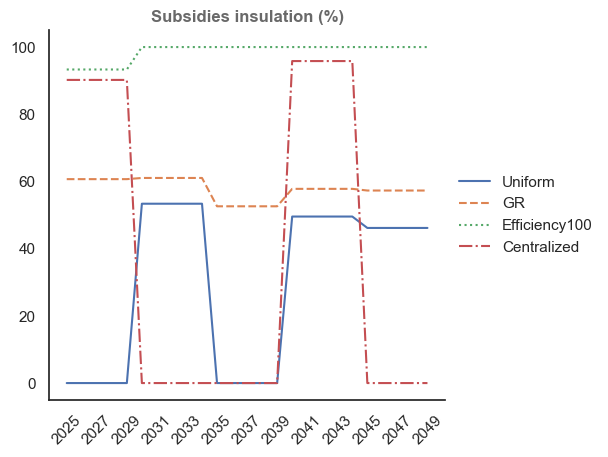

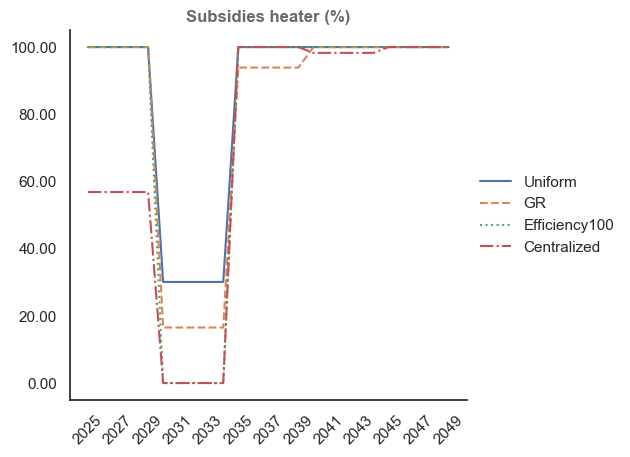

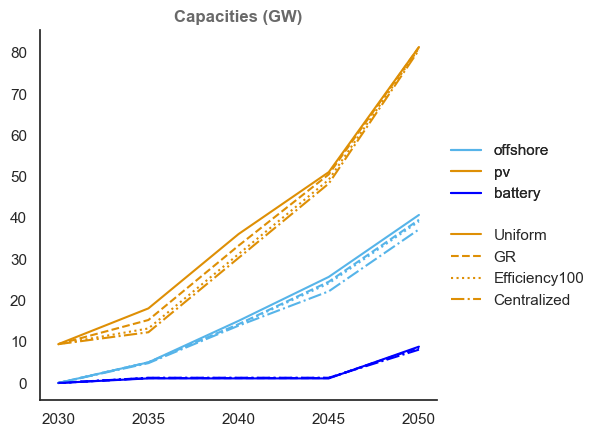

In [3]:
dict_output = {"Uniform": os.path.join("eoles/outputs/0224_070505_temoin_simple"),
               "GR": os.path.join("eoles/outputs/0224_070653_global_renovation_simple"),
               # "GR-MF": os.path.join("eoles/outputs/0223_g"),
               "Efficiency100": os.path.join("eoles/outputs/0224_074953_efficiency100_simple"),
               "Centralized": os.path.join("eoles/outputs/0224_045643_threshold_simple"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, capacities_dict = comparison_simulations(dict_output, ref="Uniform", health=True)

In [4]:
total_system_costs_df

Uniform         GR  Efficiency100  \
Investment electricity costs   196.143518  -4.040514      -5.896513   
Investment heater costs        293.144398  -1.927890      -2.565273   
Investment insulation costs    106.261550  45.007268      71.426138   
Functionment costs             701.029326 -41.684085     -74.677235   
Health costs                   103.580832 -22.065440     -45.494195   
Total costs                   1400.159624 -24.710661     -57.207078   
Total costs HC excluded       1296.578792  -2.645221     -11.712883   

                              Centralized  
Investment electricity costs   -10.064409  
Investment heater costs        -19.821777  
Investment insulation costs      8.274836  
Functionment costs             -75.366962  
Health costs                   -42.934061  
Total costs                   -139.912372  
Total costs HC excluded        -96.978312

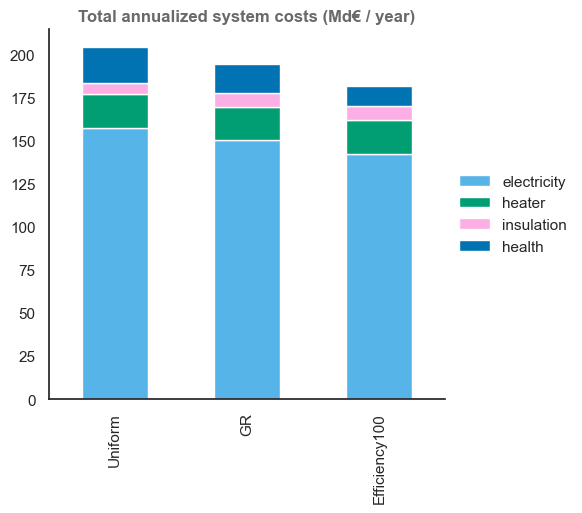

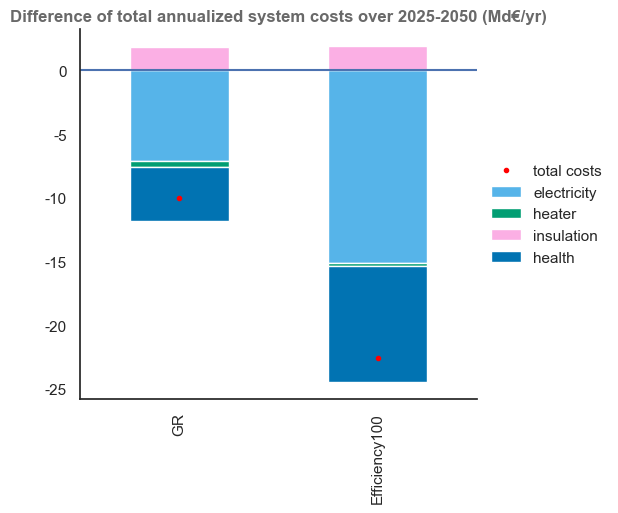

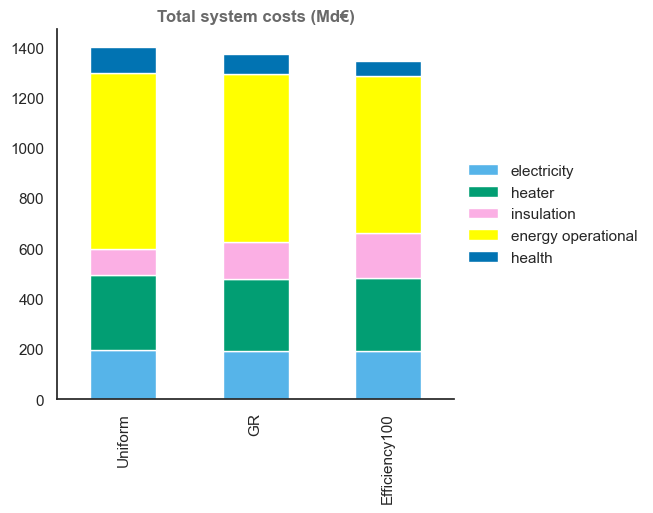

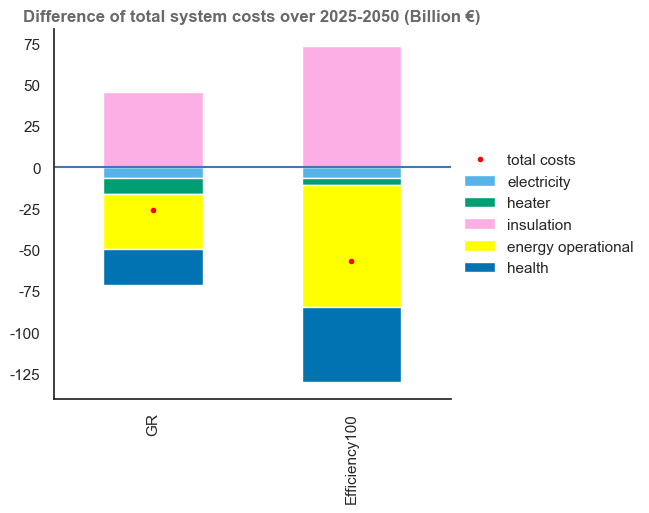

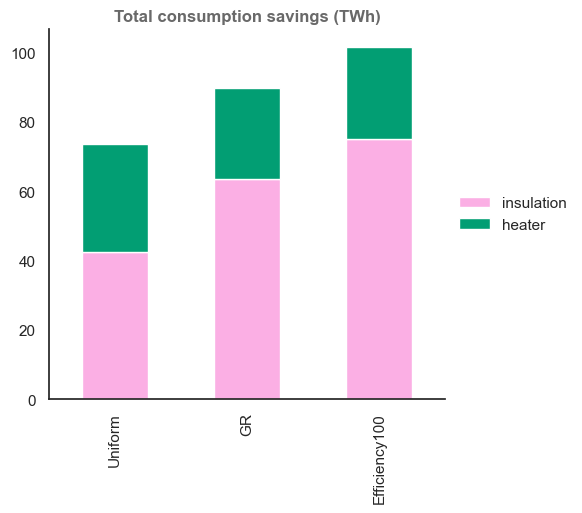

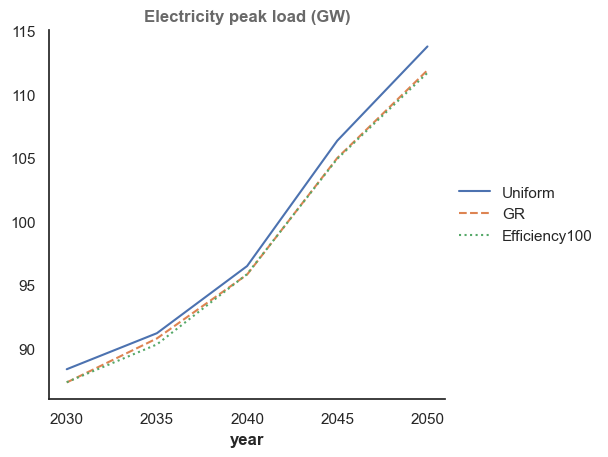

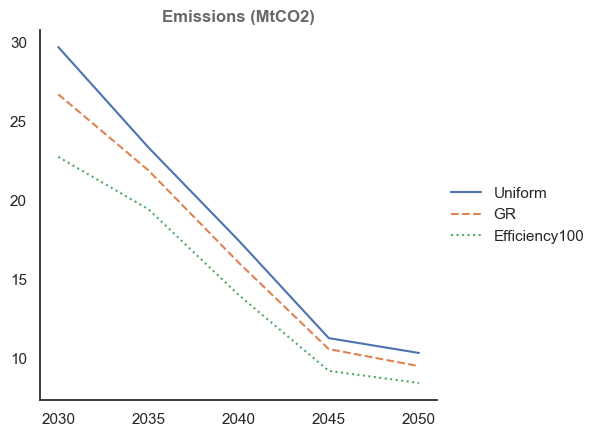

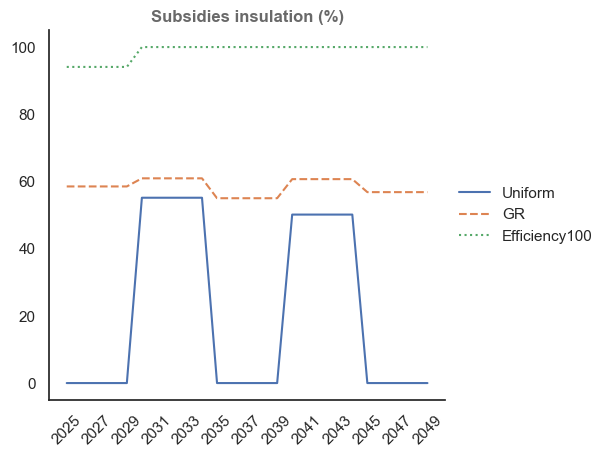

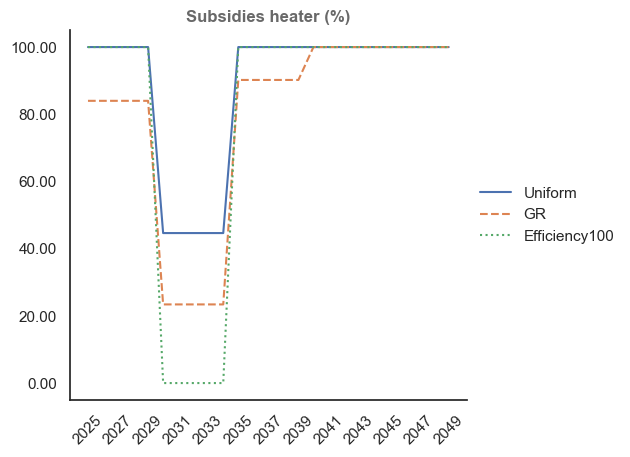

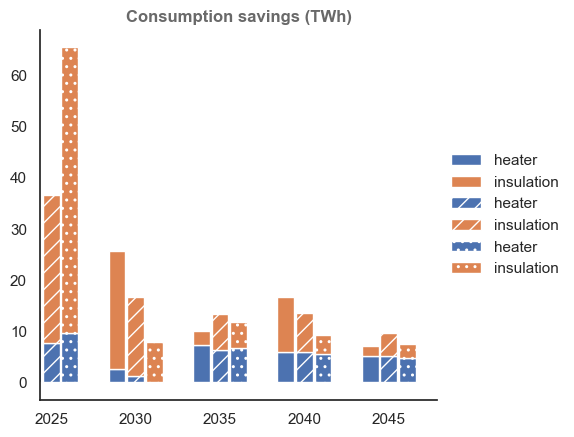

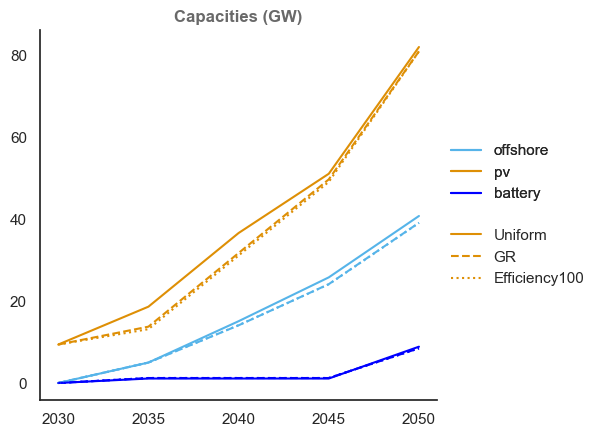

In [2]:
dict_output = {"Uniform": os.path.join("eoles/outputs/0223_032351_temoin_simple"),
               "GR": os.path.join("eoles/outputs/0223_032045_global_renovation_simple"),
               # "GR-MF": os.path.join("eoles/outputs/0223_g"),
               "Efficiency100": os.path.join("eoles/outputs/0223_031120_efficiency100_simple"),
               # "Centralized": os.path.join("eoles/outputs/0220_192722_threshold_simple"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, capacities_dict = comparison_simulations(dict_output, ref="Uniform", health=True)

### Impact anticipation SCC

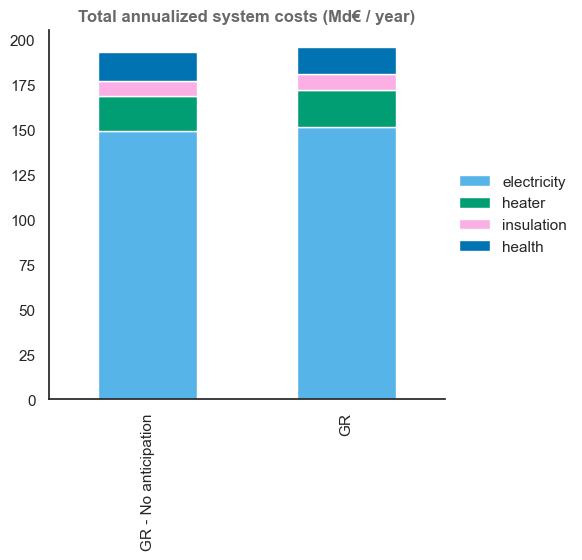

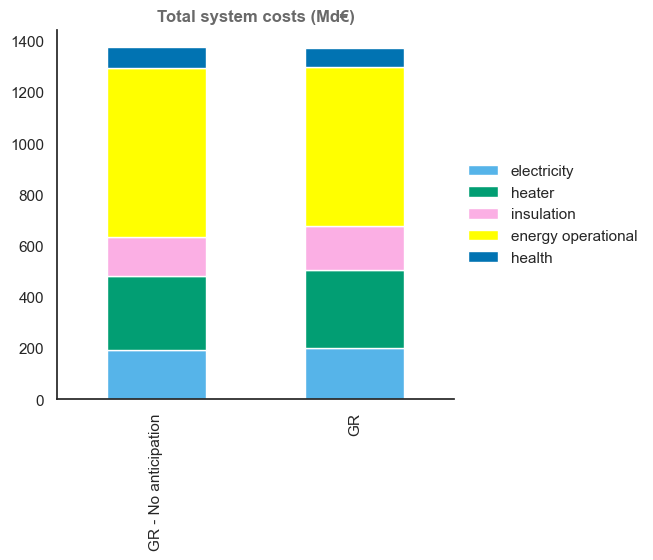

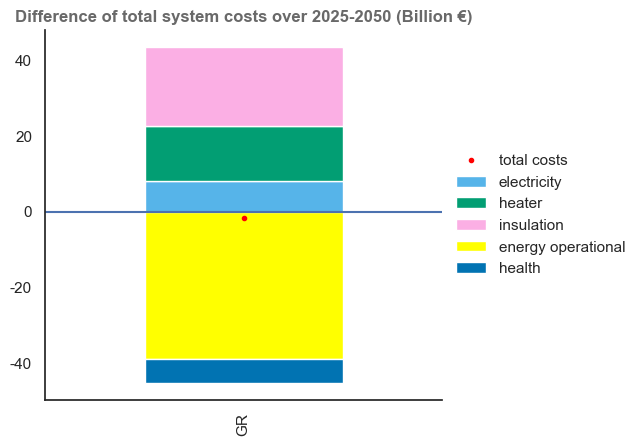

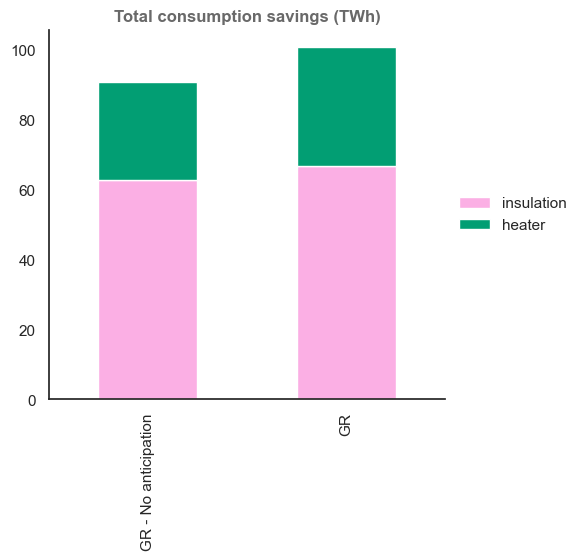

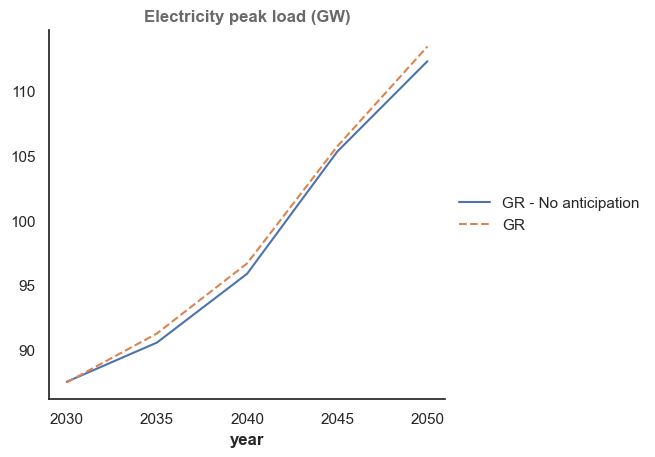

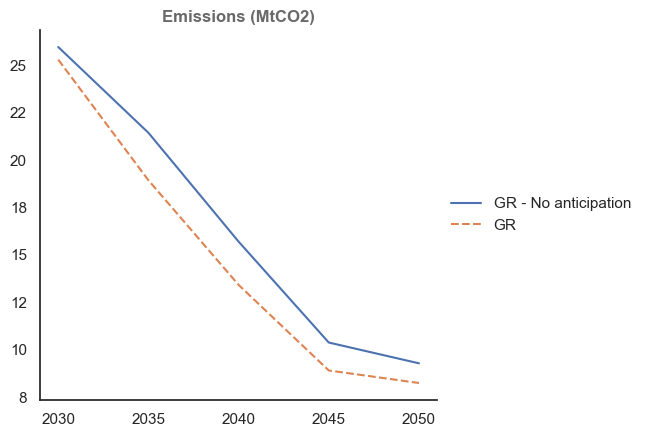

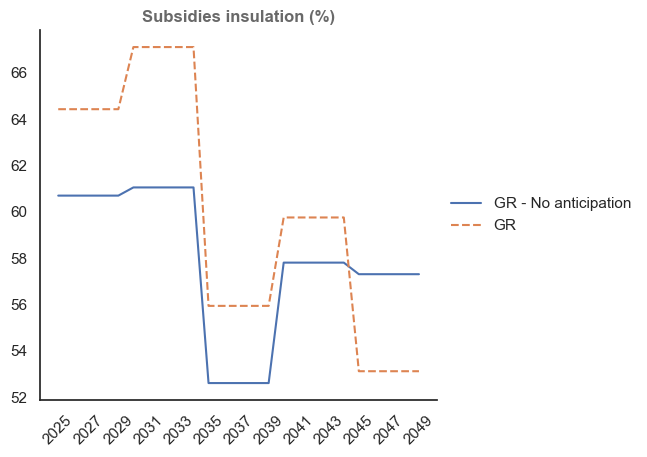

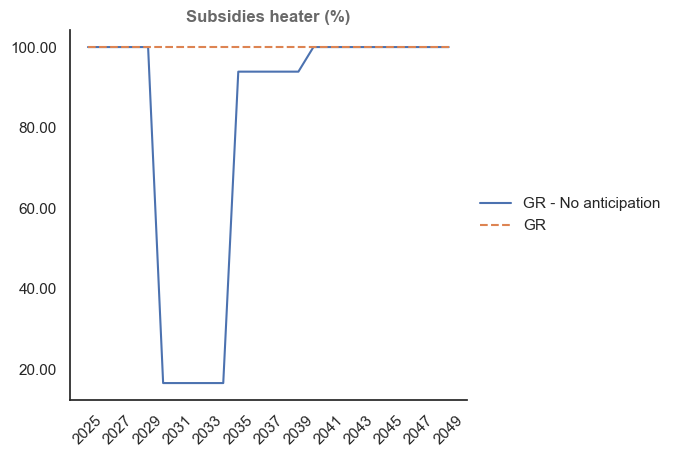

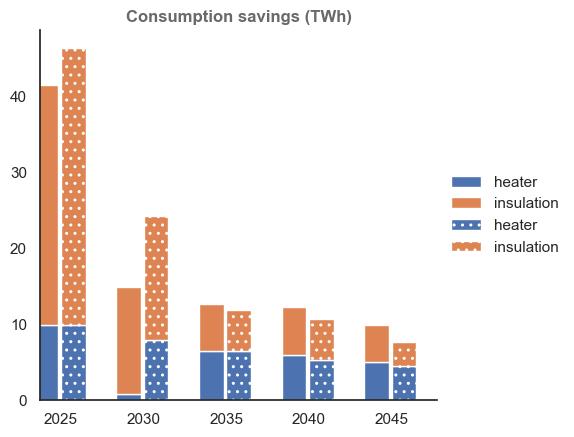

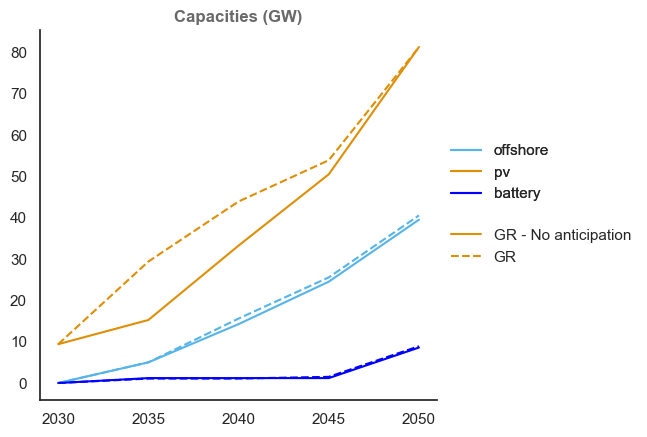

In [5]:
dict_output = {"GR - No anticipation": os.path.join("eoles/outputs/0224_070653_global_renovation_simple"),
               "GR": os.path.join("eoles/outputs/0224_073506_global_renovation_simple_anticipatedSCCt5"),
               # "Efficiency10 - No anticipation": os.path.join("eoles/outputs/0220_220011_efficiency100_simple"),
               # "Efficiency100": os.path.join("eoles/outputs/0220_232711_efficiency100_simple_anticipatedSCC"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="GR - No anticipation", health=True)

In [4]:
capacities_dict

{'Uniform':        offshore         pv   battery
 2030   0.000000   9.400000  0.000000
 2035   5.000000  18.653377  1.097224
 2040  15.105560  36.653377  1.097224
 2045  25.818511  51.140720  1.097224
 2050  40.818511  82.117192  8.875249,
 'GR':        offshore         pv   battery
 2030   0.000000   9.400000  0.000000
 2035   5.000000  13.768720  1.217885
 2040  14.096296  31.768720  1.217885
 2045  24.162220  49.768720  1.217885
 2050  39.162220  81.067507  8.502038,
 'Efficiency100':       offshore         pv   battery
 2030   0.00000   9.400000  0.000000
 2035   5.00000  13.156833  1.228689
 2040  14.13553  31.156833  1.228689
 2045  24.12541  49.156833  1.228689
 2050  39.12541  81.050357  8.467375}

### Role carbon budget

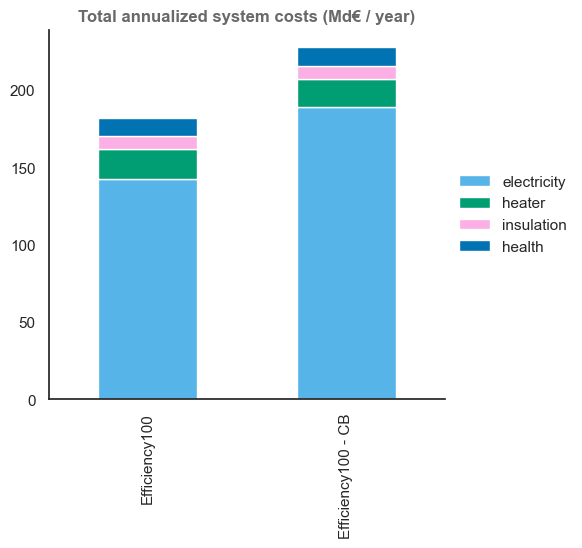

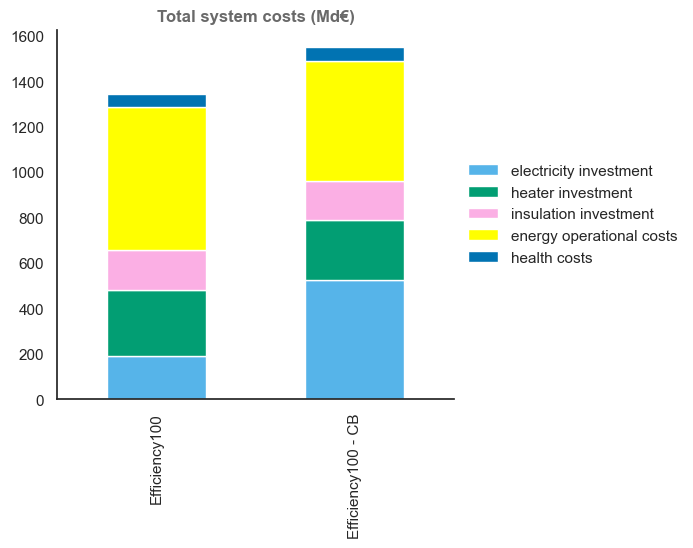

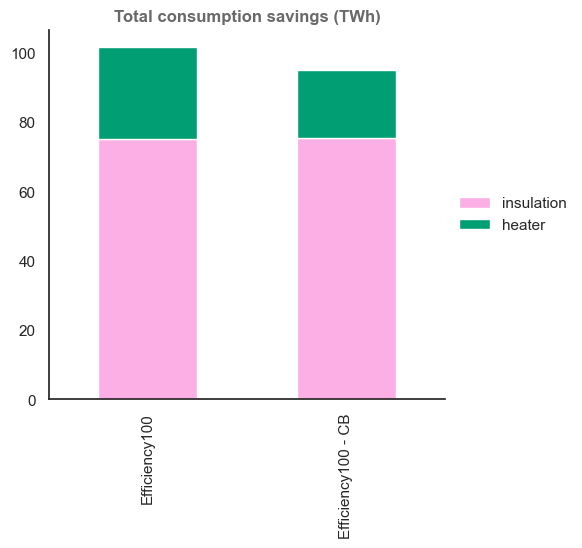

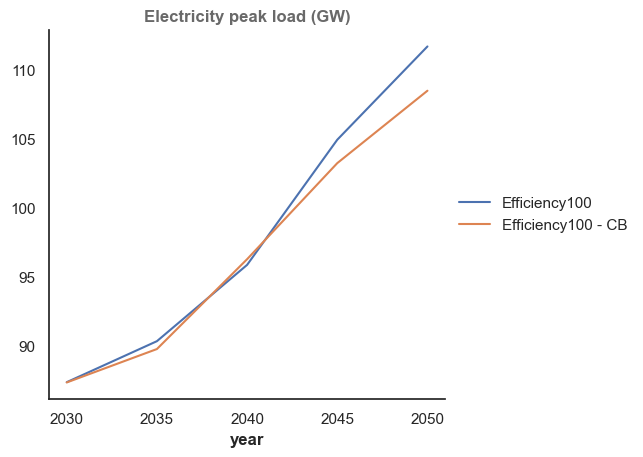

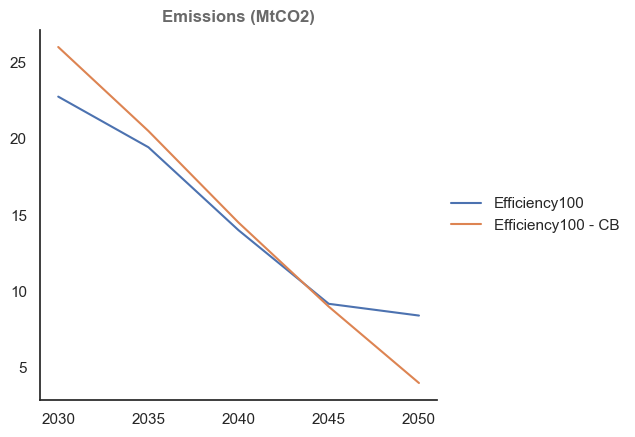

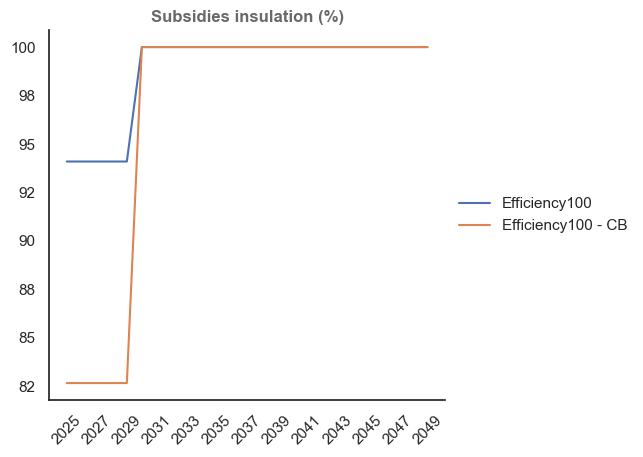

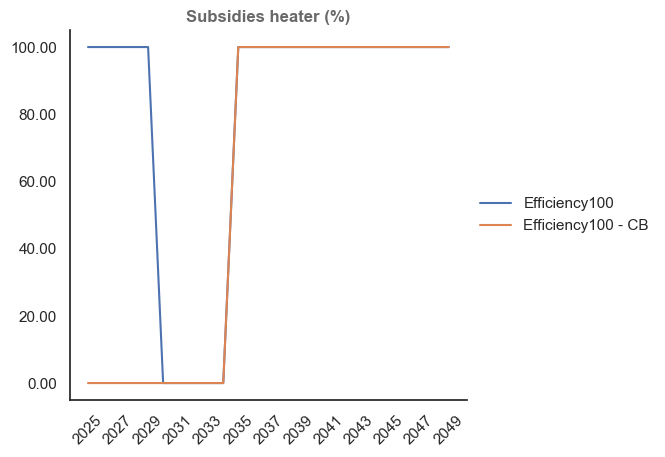

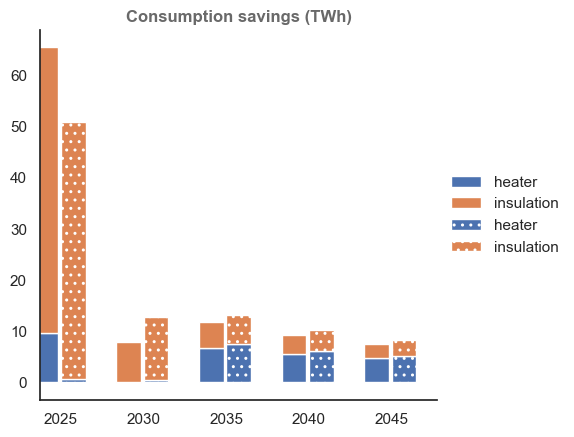

In [38]:
dict_output = {"Efficiency100": os.path.join("eoles/outputs/0223_031120_efficiency100_simple"),
               "Efficiency100 - CB": os.path.join("eoles/outputs/0223_031656_efficiency100_simple_carbonbudget"),
               # "Efficiency10 - No anticipation": os.path.join("eoles/outputs/0220_220011_efficiency100_simple"),
               # "Efficiency100": os.path.join("eoles/outputs/0220_232711_efficiency100_simple_anticipatedSCC"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="Efficiency100", health=True)

### Impact price feedback

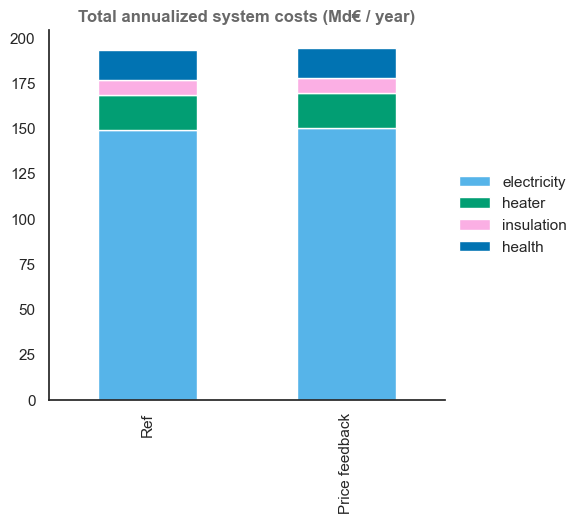

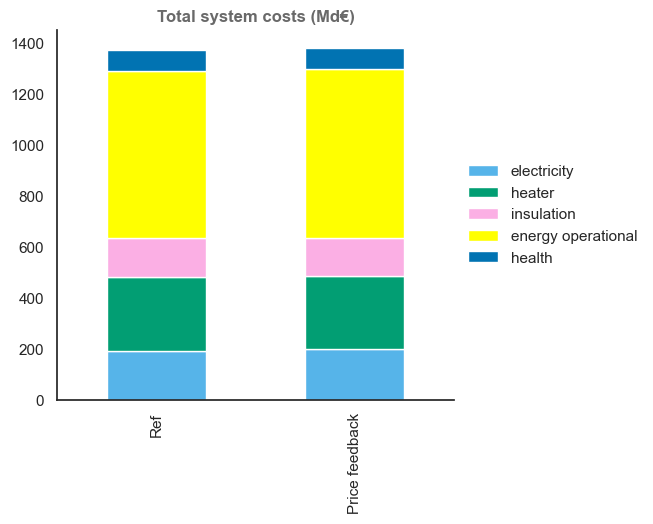

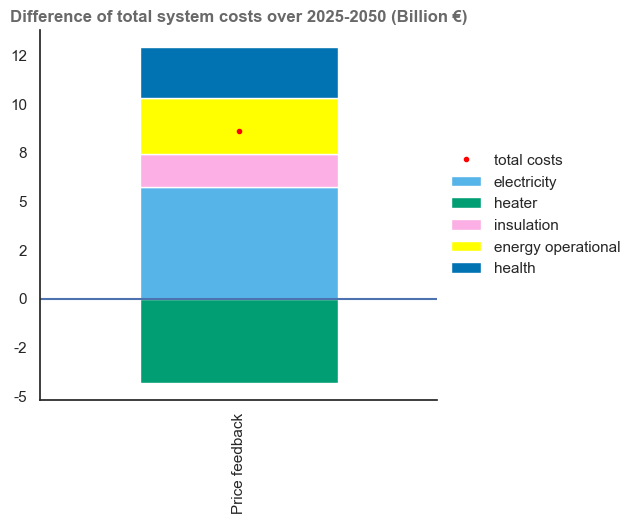

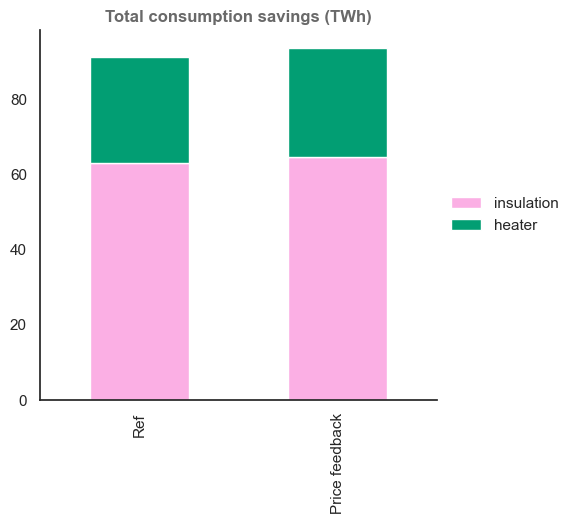

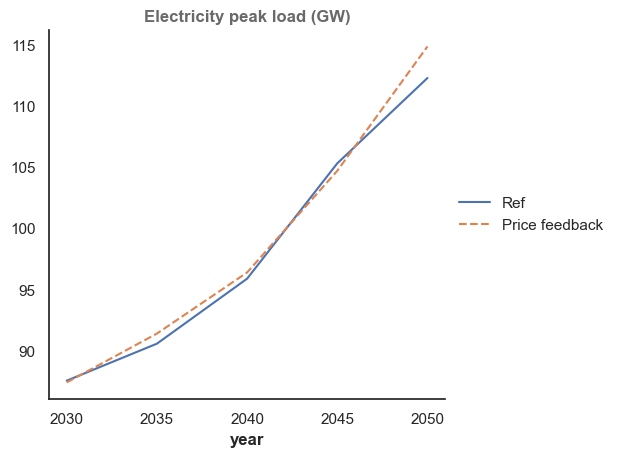

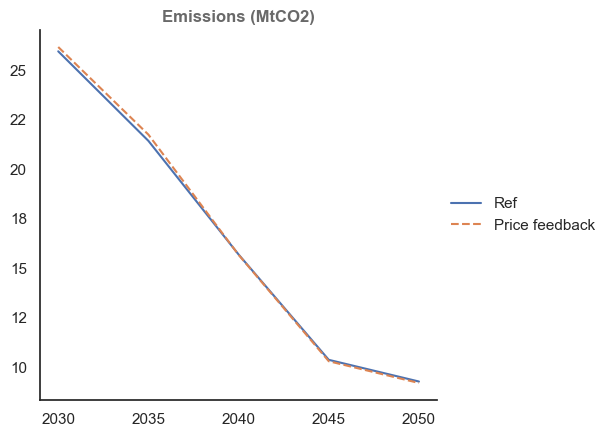

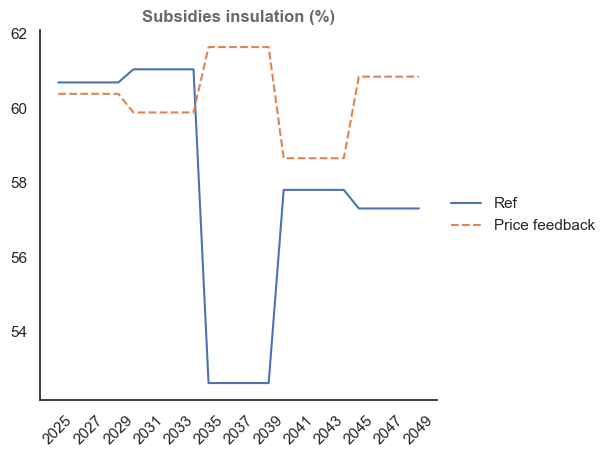

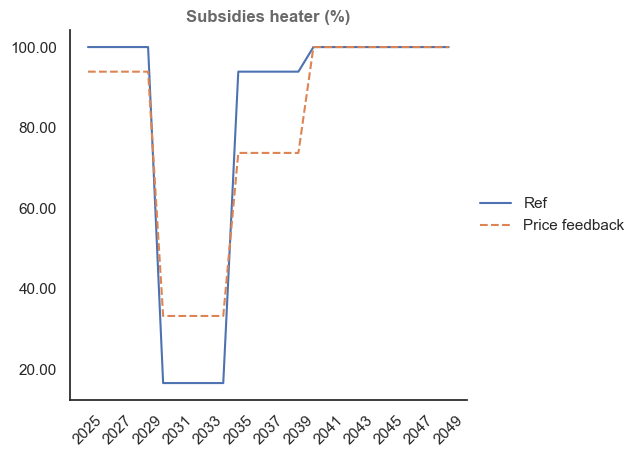

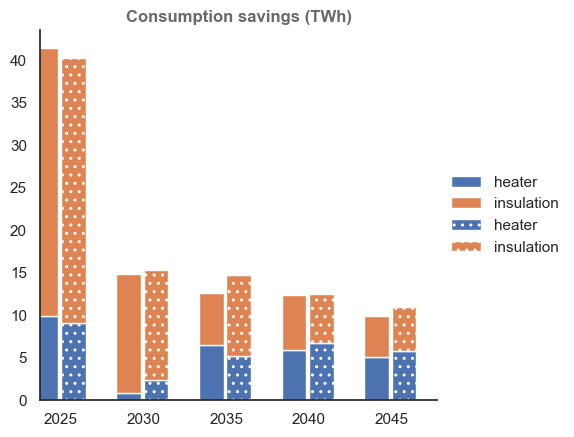

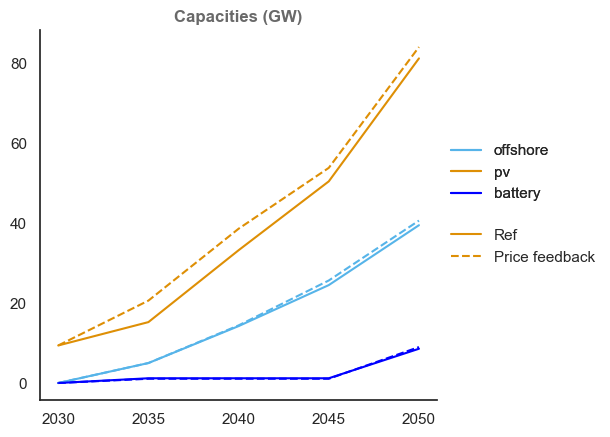

In [2]:
dict_output = {"Ref": os.path.join("eoles/outputs/0224_070653_global_renovation_simple"),
               "Price feedback": os.path.join("eoles/outputs/0224_072311_global_renovation_simple_pricefeedback"),
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="Ref", health=True)

In [16]:
isinstance(total_system_costs_df.drop(columns=["Ref"]).T["Total costs"], pd.Series)

True

### Impact config simple

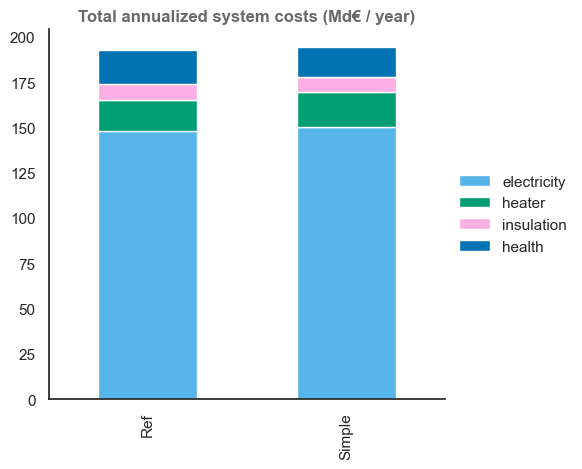

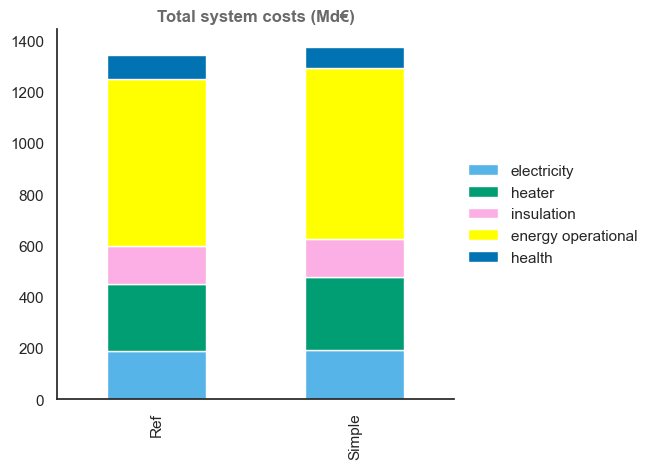

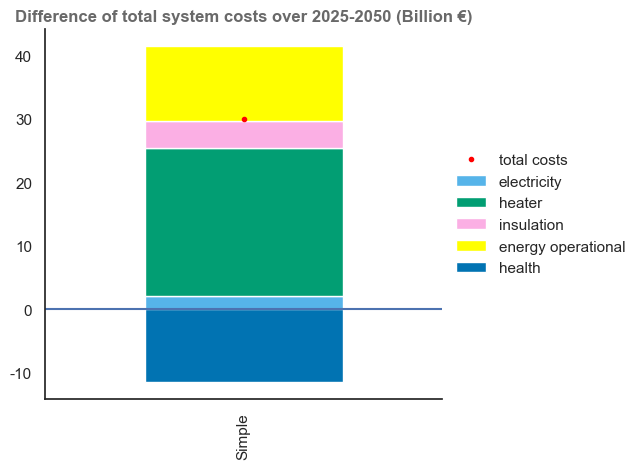

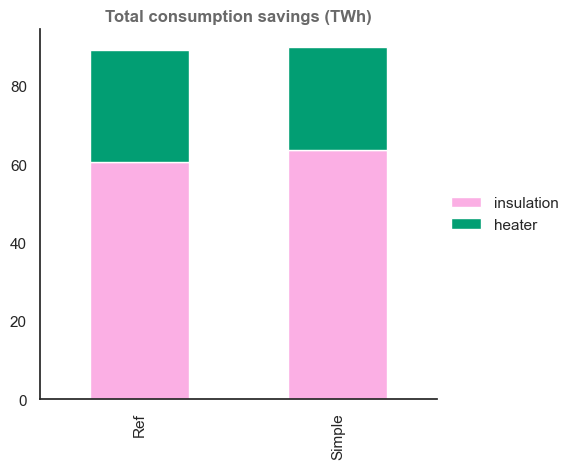

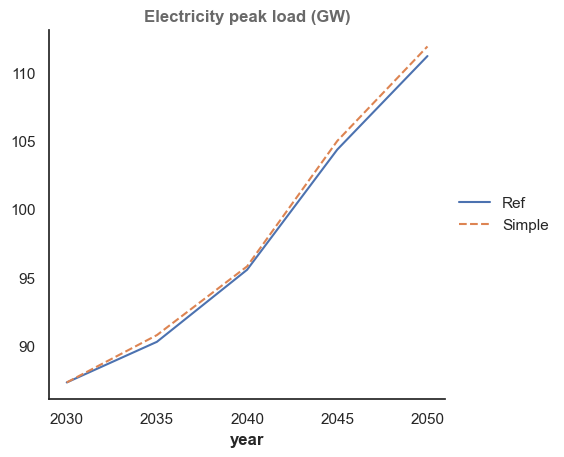

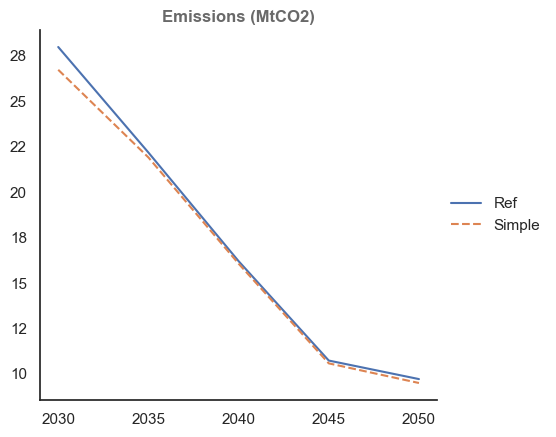

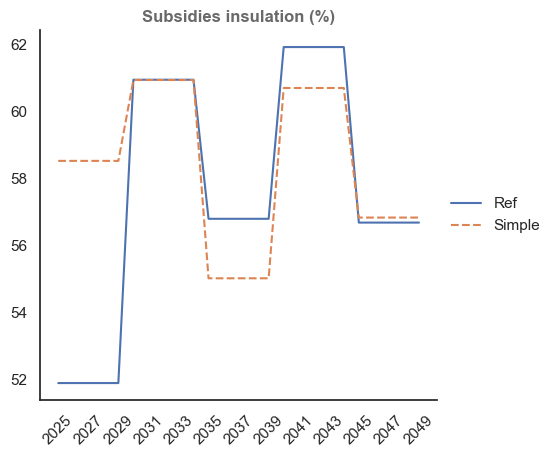

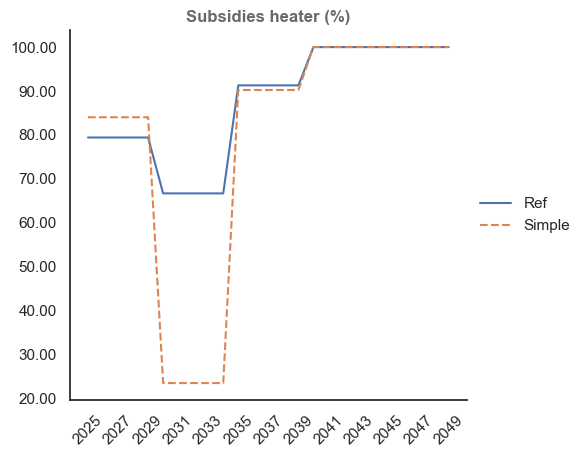

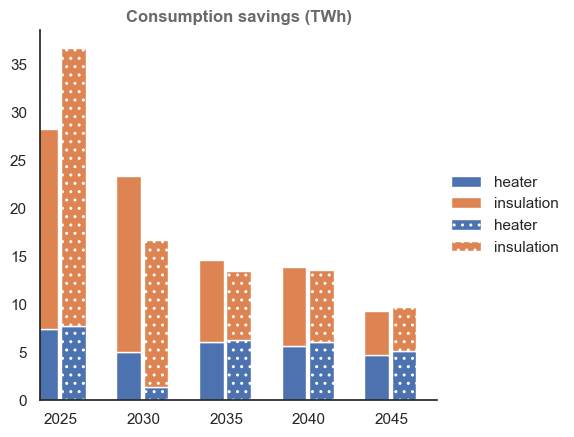

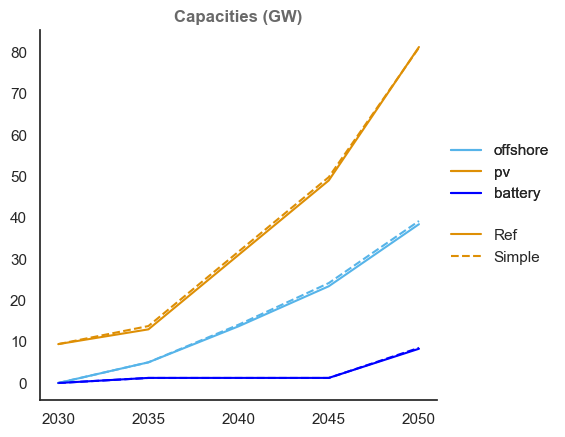

In [6]:
dict_output = {"Ref": os.path.join("eoles/outputs/0223_161101_global_renovation"),
               "Simple": os.path.join("eoles/outputs/0223_032045_global_renovation_simple"),
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="Ref", health=True)

## Simulation 01/31

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
from pickle import load
import pandas as pd
import seaborn as sns
from eoles.write_output import format_ax, format_legend

from eoles.write_output import make_area_plot, make_line_plot, plot_simulation, plot_comparison, comparison_simulations
from eoles.inputs.resources import resources_data
# sns.set_theme(context="notebook", style="white")

### No HC

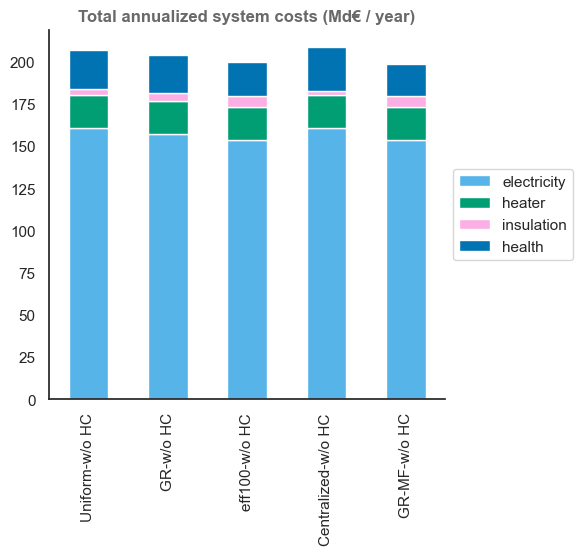

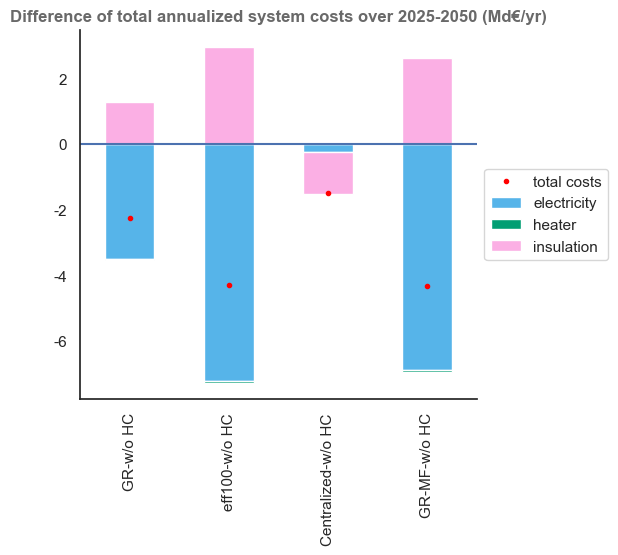

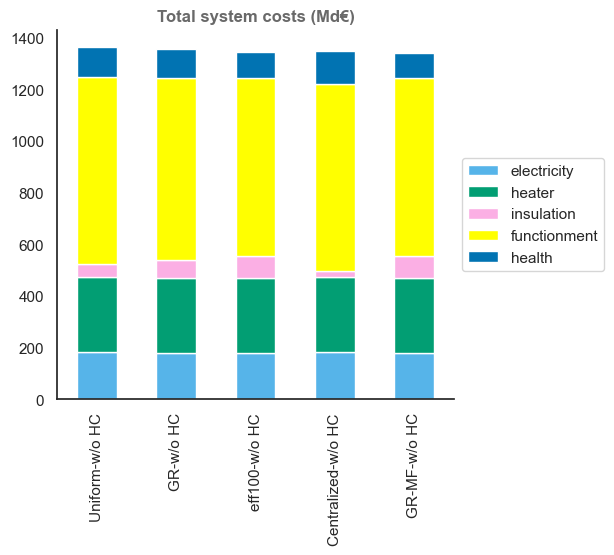

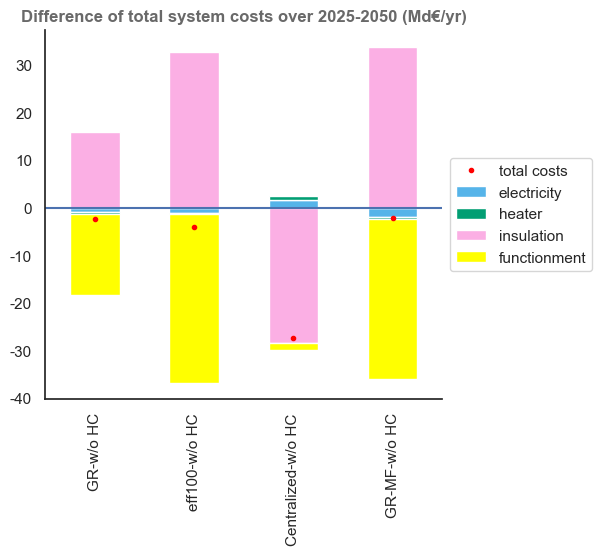

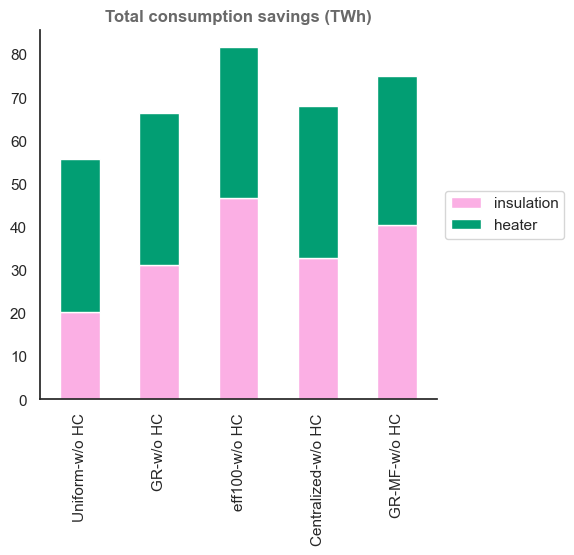

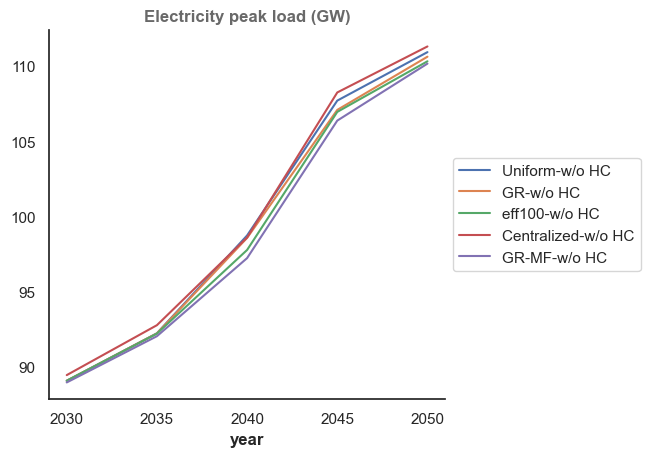

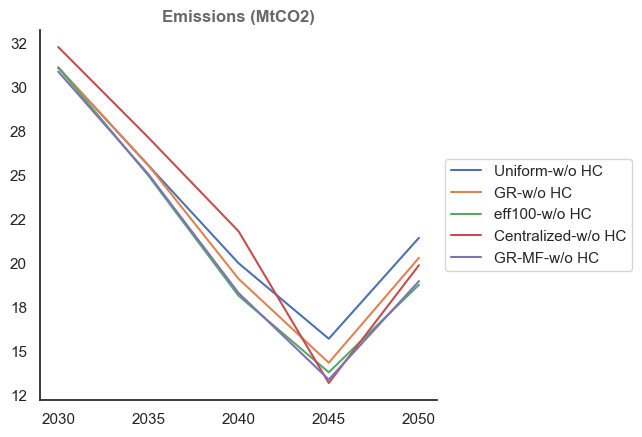

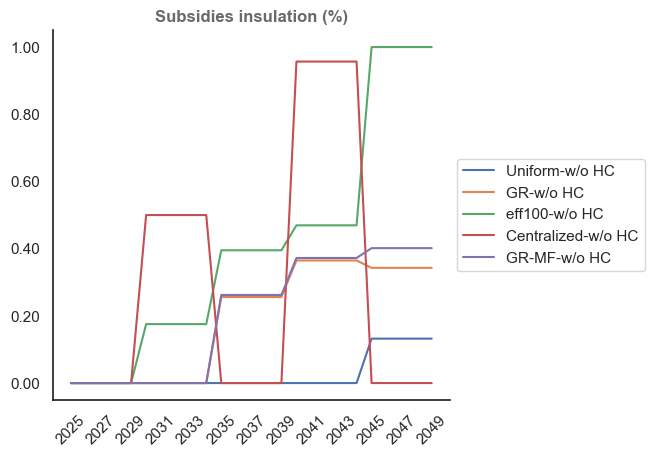

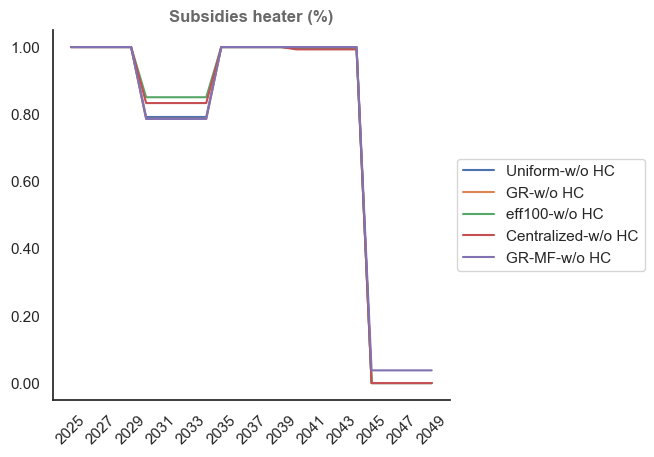

In [7]:
dict_output = {"Uniform-w/o HC": os.path.join("eoles/outputs/0131_132024_noHC_temoin"),
               "GR-w/o HC": os.path.join("eoles/outputs/0131_131938_noHC_global_renovation"),
               "eff100-w/o HC": os.path.join("eoles/outputs/0131_132146_noHC_efficiency100"),
               "Centralized-w/o HC": os.path.join("eoles/outputs/0131_033028_noHC_threshold"),
               "GR-MF-w/o HC": os.path.join("eoles/outputs/0131_132052_noHC_global_renovation_nolandlord_nomultifamily"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="Uniform-w/o HC", health=False)

### Role of HC

In [6]:
# sns.set_theme(context="talk", style="white")
dict_output = {"No HC": os.path.join("eoles/outputs/0131_132146_noHC_efficiency100"),
               "HC": os.path.join("eoles/outputs/0131_102021_efficiency100"),
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, emissions_dict = \
    comparison_simulations(dict_output, ref="No HC", health=True, save_path=os.path.join("eoles/outputs/simulations_comparison_EAERE/role HC"))

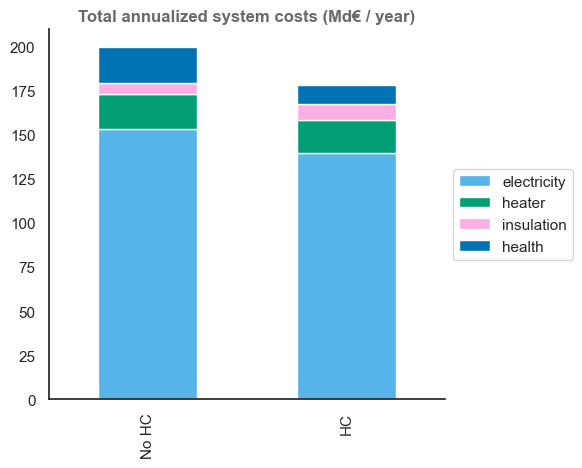

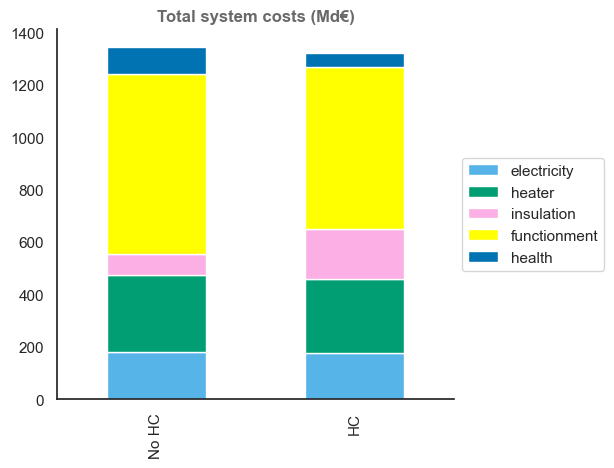

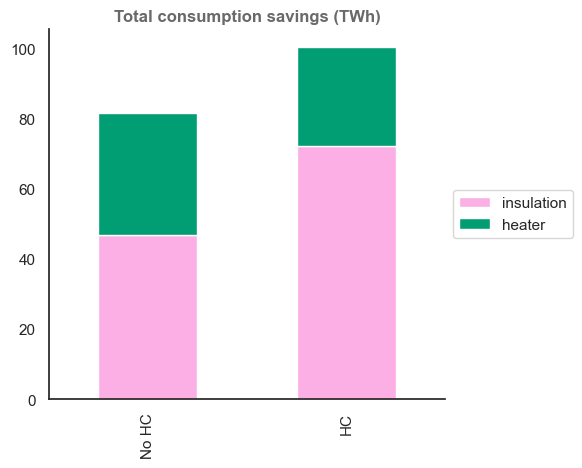

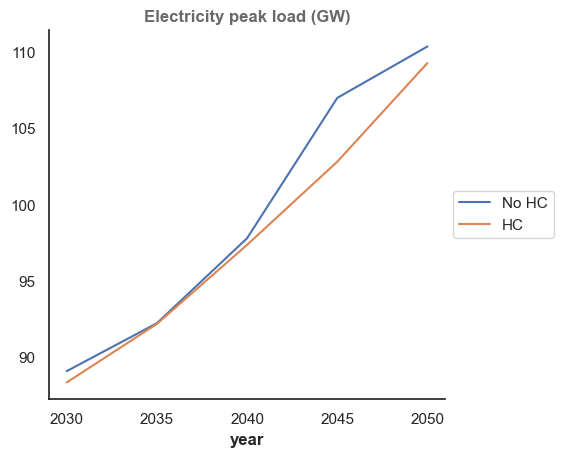

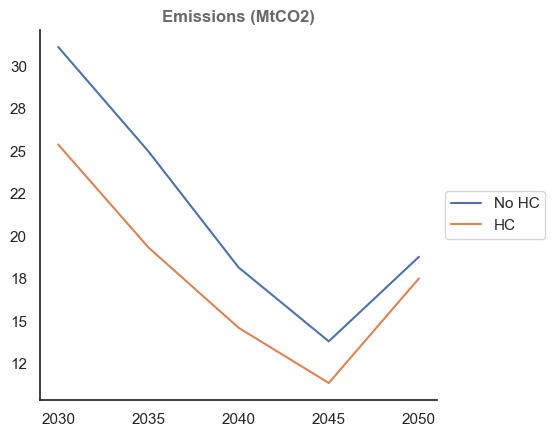

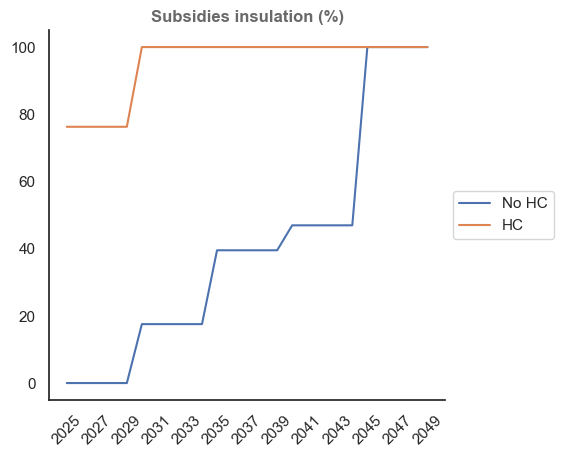

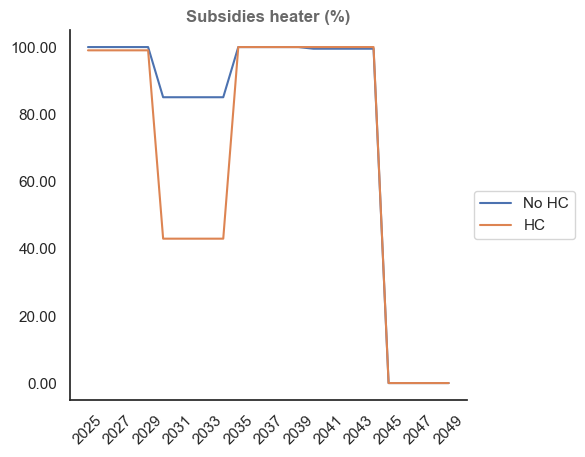

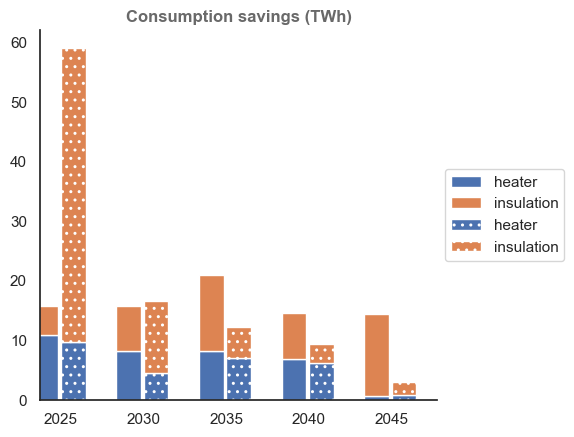

In [17]:
dict_output = {"No HC": os.path.join("eoles/outputs/0131_132146_noHC_efficiency100"),
               "HC": os.path.join("eoles/outputs/0131_102021_efficiency100"),
               # "GR-w/o HC": os.path.join("eoles/outputs/0131_131938_noHC_global_renovation"),
               # "GR": os.path.join("eoles/outputs/0131_105702_global_renovation"),
               # "threshold": os.path.join("eoles/outputs/0131_022136_threshold"),
               # "eff100": os.path.join("eoles/outputs/0131_102021_efficiency100"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="No HC", health=True)

In [4]:
annualized_system_costs_df

No HC         HC
Annualized electricity system costs     153.570855 -14.102573
Annualized investment heater costs       19.668507  -0.454834
Annualized investment insulation costs    6.437037   2.574392
Annualized health costs                  20.235837  -9.397328
Annualized total costs                  199.912236 -21.380342
Annualized total costs HC excluded      179.676400 -11.983014

In [14]:
total_system_costs_df

No HC          HC
Investment electricity costs   181.054256   -4.605960
Investment heater costs        291.139288   -7.890053
Investment insulation costs     83.052298  107.772685
Functionment costs             688.375184  -69.243653
Health costs                   101.179184  -46.986641
Total costs                   1344.800210  -20.953622
Total costs HC excluded       1243.621027   26.033019

In [5]:
emissions_dict

{'No HC': 2030    31.115451
 2035    24.975114
 2040    18.145219
 2045    13.796048
 2050    18.772717
 Name: Emissions, dtype: float64,
 'HC': 2030    25.377781
 2035    19.321013
 2040    14.595287
 2045    11.344181
 2050    17.499048
 Name: Emissions, dtype: float64}

In [18]:
consumption_savings_tot_df

No HC         HC
Consumption saving insulation (TWh)  46.695559  72.008189
Consumption saving heater (TWh)      34.907558  28.296619

In [6]:
72-46.69

25.310000000000002

In [19]:
223.3-159.51

63.79000000000002

In [20]:
63/25

2.52

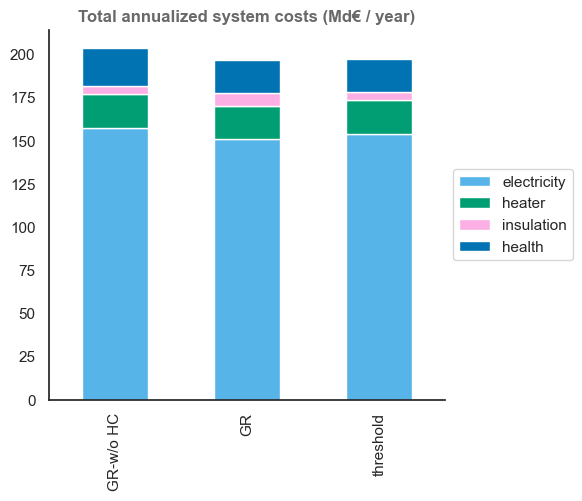

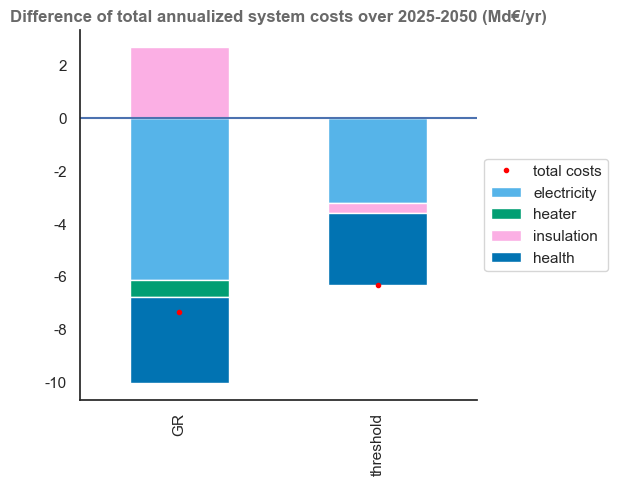

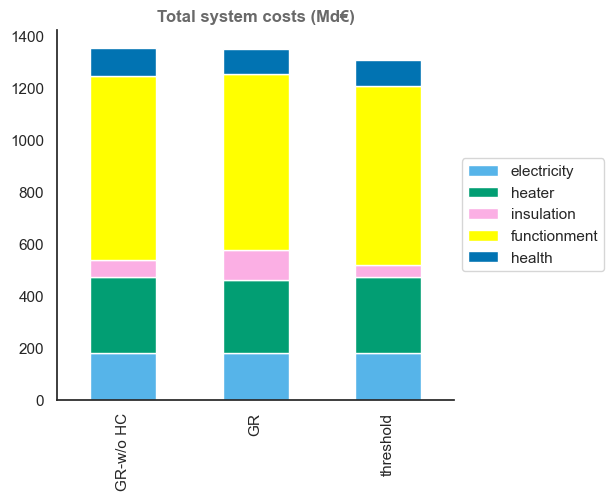

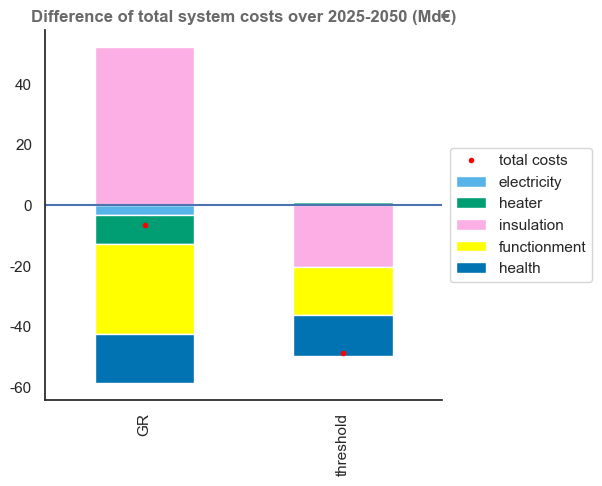

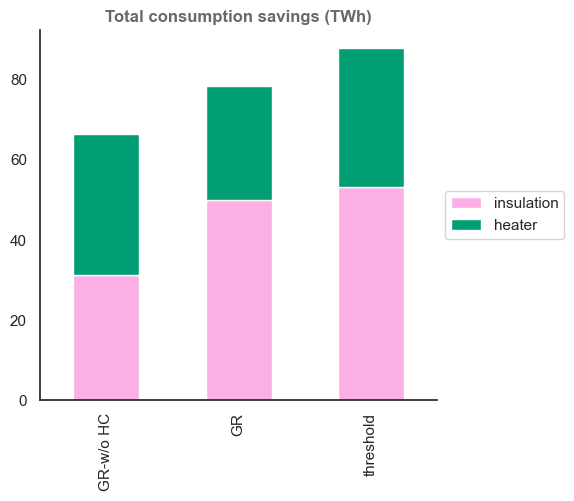

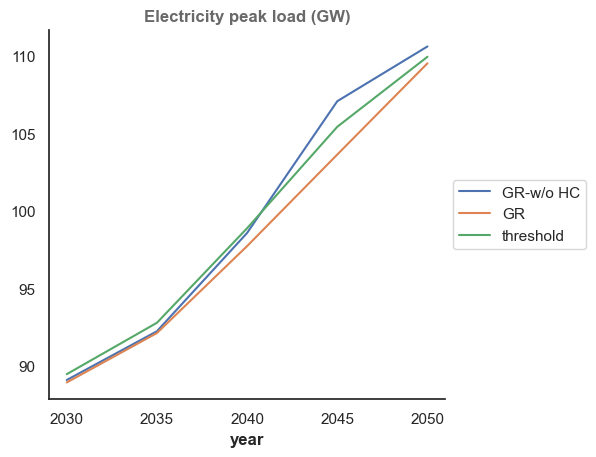

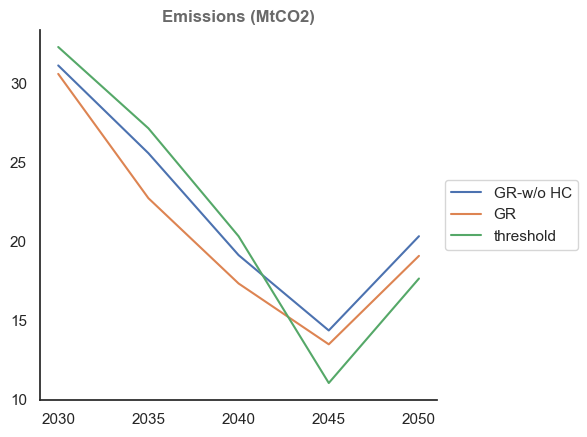

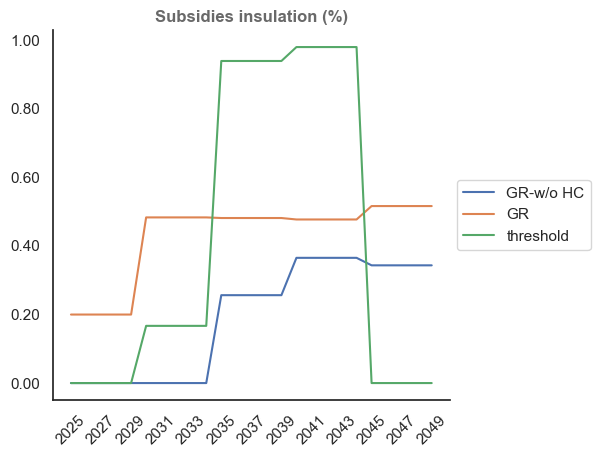

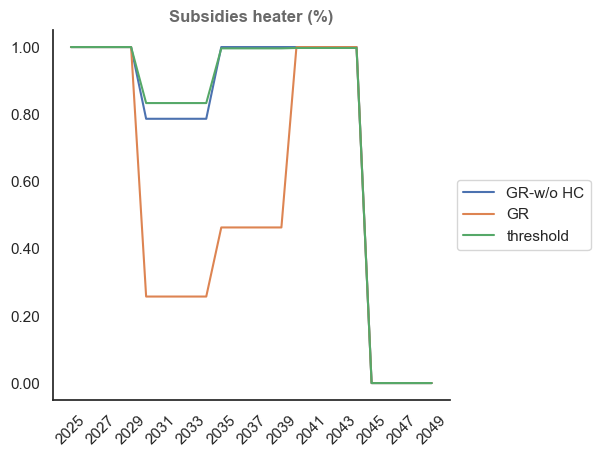

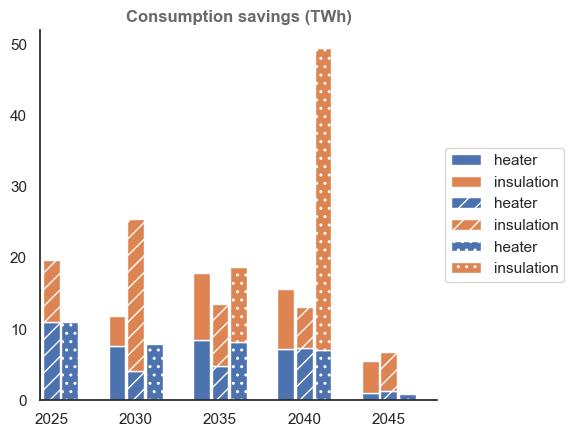

In [11]:
dict_output = {"GR-w/o HC": os.path.join("eoles/outputs/0131_131938_noHC_global_renovation"),
               "GR": os.path.join("eoles/outputs/0131_105702_global_renovation"),
               "threshold": os.path.join("eoles/outputs/0131_022136_threshold"),
               # "eff100": os.path.join("eoles/outputs/0131_102021_efficiency100"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="GR-w/o HC", health=True)

### Role of design

In [7]:
# sns.set_theme(context="talk", style="white")
dict_output = {"Uniform": os.path.join("eoles/outputs/0131_105544_temoin"),
               "GR": os.path.join("eoles/outputs/0131_105702_global_renovation"),
               "GR-MF": os.path.join("eoles/outputs/0131_104907_global_renovation_nolandlord_nomultifamily"),
               "Efficiency100": os.path.join("eoles/outputs/0131_102021_efficiency100"),
               "Centralized": os.path.join("eoles/outputs/0131_022136_threshold")
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, emissions_dict = \
    comparison_simulations(dict_output, ref="Uniform", health=True, save_path=os.path.join("eoles/outputs/simulations_comparison_EAERE/comparison design"))

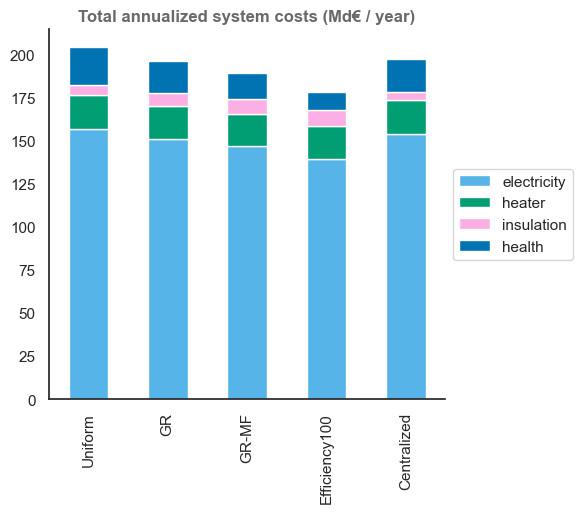

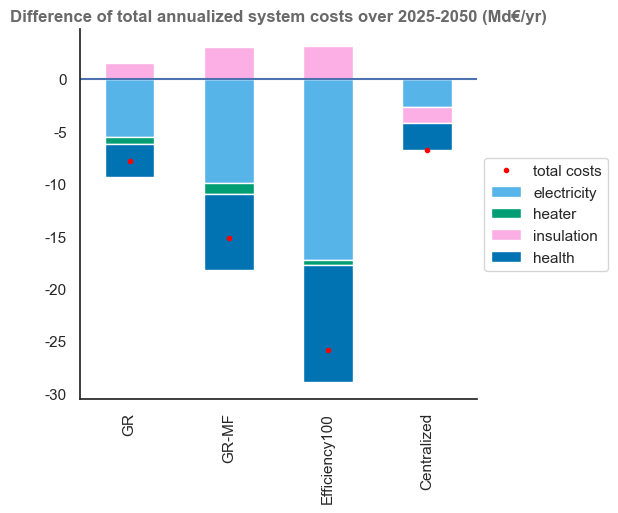

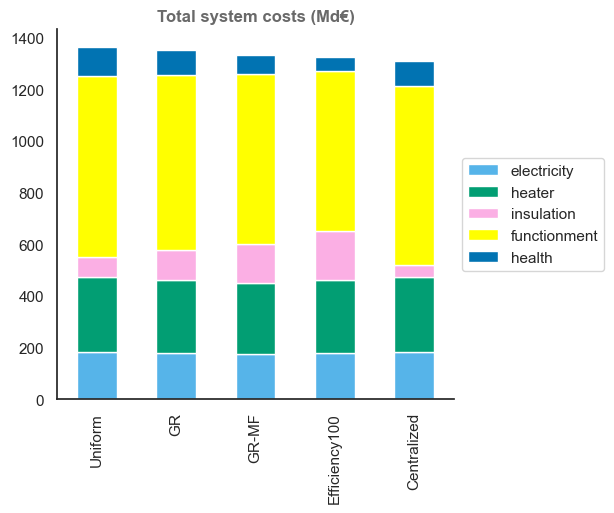

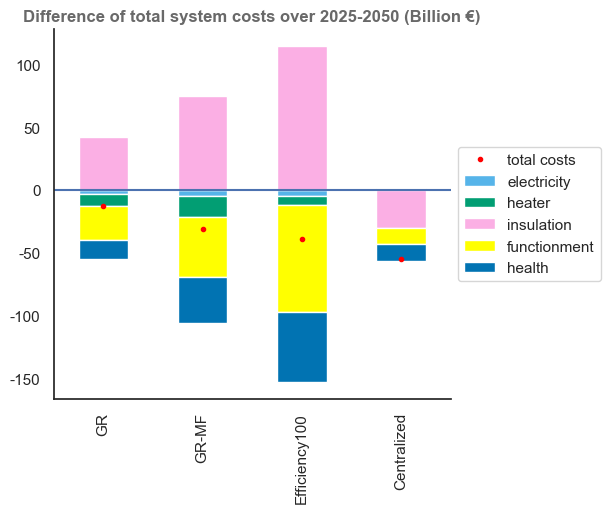

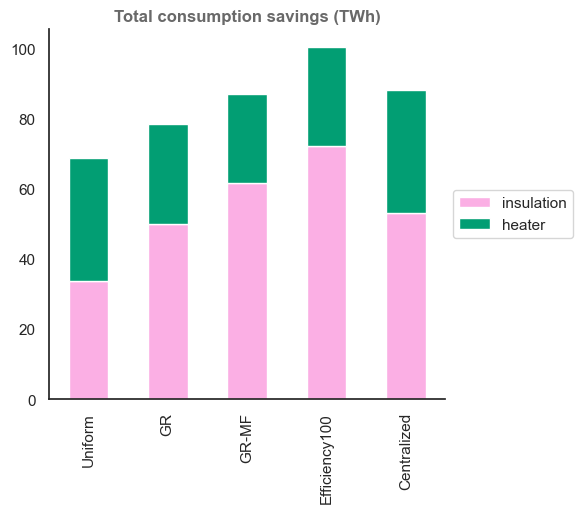

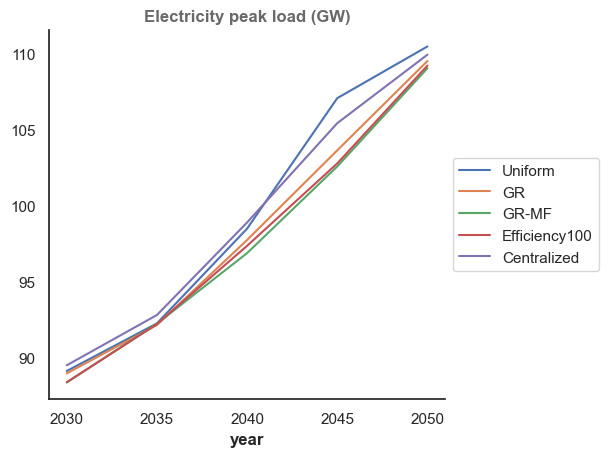

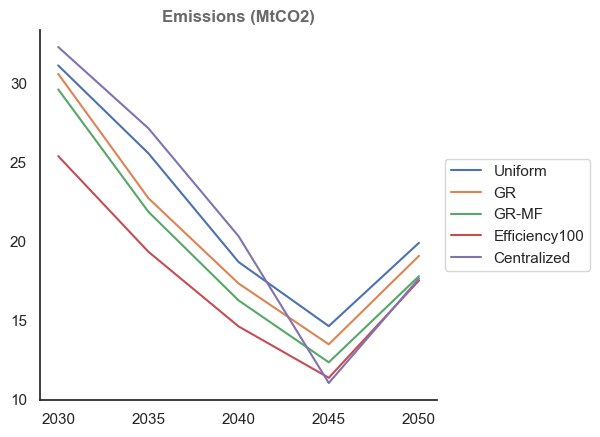

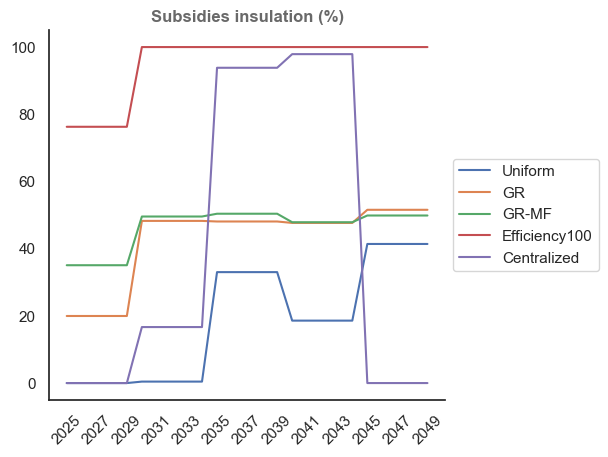

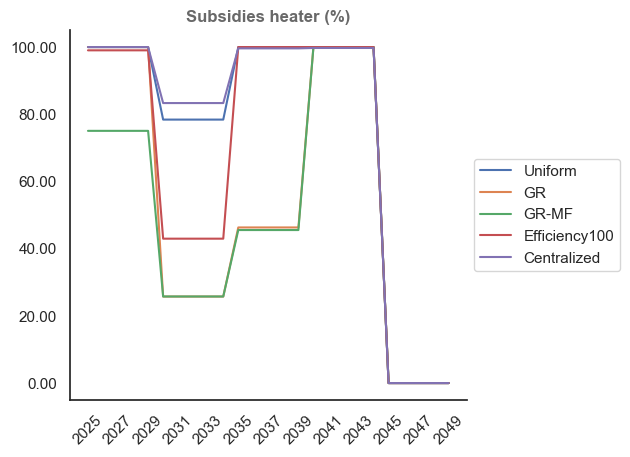

In [16]:
dict_output = {"Uniform": os.path.join("eoles/outputs/0131_105544_temoin"),
               "GR": os.path.join("eoles/outputs/0131_105702_global_renovation"),
               "GR-MF": os.path.join("eoles/outputs/0131_104907_global_renovation_nolandlord_nomultifamily"),
               "Efficiency100": os.path.join("eoles/outputs/0131_102021_efficiency100"),
               "Centralized": os.path.join("eoles/outputs/0131_022136_threshold"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
annualized_system_costs_df, total_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="Uniform", health=True)

In [7]:
total_system_costs_df

Uniform         GR      GR-MF  \
Investment electricity costs   181.262642  -3.046562  -5.203349   
Investment heater costs        290.691590  -9.658544 -16.261692   
Investment insulation costs     76.261014  42.284358  74.567463   
Functionment costs             704.215256 -26.906856 -48.358519   
Health costs                   110.217840 -15.581687 -36.114101   
Total costs                   1362.648341 -12.909290 -31.370198   
Total costs HC excluded       1252.430502   2.672397   4.743902   

                              Efficiency100  Centralized  
Investment electricity costs      -4.814346     0.358156  
Investment heater costs           -7.442355     0.869172  
Investment insulation costs      114.563969   -30.356180  
Functionment costs               -85.083724   -13.082679  
Health costs                     -56.025297   -13.028957  
Total costs                      -38.801753   -55.240488  
Total costs HC excluded           17.223544   -42.211531

In [8]:
55/1362

0.04038179148311307

In [9]:
emissions_dict

{'Uniform': 2030    31.115451
 2035    25.553792
 2040    18.671788
 2045    14.615163
 2050    19.887742
 Name: Emissions, dtype: float64,
 'GR': 2030    30.580815
 2035    22.712272
 2040    17.312975
 2045    13.461767
 2050    19.061492
 Name: Emissions, dtype: float64,
 'GR-MF': 2030    29.600057
 2035    21.850306
 2040    16.240793
 2045    12.323299
 2050    17.776491
 Name: Emissions, dtype: float64,
 'Efficiency100': 2030    25.377781
 2035    19.321013
 2040    14.595287
 2045    11.344181
 2050    17.499048
 Name: Emissions, dtype: float64,
 'Centralized': 2030    32.283568
 2035    27.135573
 2040    20.303195
 2045    11.013084
 2050    17.627010
 Name: Emissions, dtype: float64}

In [11]:
17.62-19.88

-2.259999999999998

In [9]:
consumption_savings_tot_df

Uniform         GR      GR-MF  \
Consumption saving insulation (TWh)  33.555405  49.933718  61.480456   
Consumption saving heater (TWh)      35.054131  28.396716  25.552609   

                                     Efficiency100  Centralized  
Consumption saving insulation (TWh)      72.008189    53.113140  
Consumption saving heater (TWh)          28.296619    34.864178

In [12]:
61.48-49.93

11.549999999999997

### MF scenario

In [2]:
with open(os.path.join('eoles/outputs/0131_104907_global_renovation_nolandlord_nomultifamily', 'coupling_results.pkl'), "rb") as file:
    output = load(file)

resirf_costs_df = output["ResIRF costs (Billion euro)"]
capacity_df = output["Capacities (GW)"]
generation_df = output["Generation (TWh)"]
primary_generation_df = output["Primary generation (TWh)"]

In [3]:
from eoles.write_output import DICT_TRANSFORM_LEGEND
elec_generation = ["offshore_f", "offshore_g", "onshore", "pv_g", "pv_c", "nuclear"]
make_line_plot(capacity_df.T, subset=elec_generation, y_label="Capacity power (GW)",
               colors=resources_data["colors_eoles"],
               save=os.path.join("eoles/outputs/simulations_comparison_EAERE/GR-MF/low_carbon_capacities.png"),
               format_y=lambda y, _: '{:.0f}'.format(y), dict_legend=DICT_TRANSFORM_LEGEND)

In [4]:
make_area_plot(primary_generation_df.T, y_label="Primary generation (TWh)", colors=resources_data["colors_eoles"],
               save=os.path.join("eoles/outputs/simulations_comparison_EAERE/GR-MF/primary_generation.png"),
               format_y=lambda y, _: '{:.0f}'.format(y), dict_legend=None)

In [5]:
from eoles.write_output import plot_investment_trajectory
plot_investment_trajectory(resirf_costs_df, save=os.path.join("eoles/outputs/simulations_comparison_EAERE/GR-MF/"))

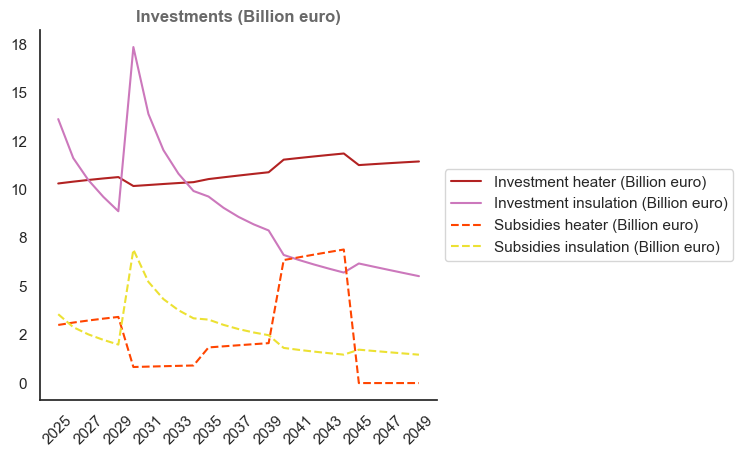

In [15]:
fig, ax = plt.subplots(1, 1)
resirf_costs_df[["Investment heater (Billion euro)"]].plot.line(ax=ax, color=resources_data["colors_eoles"])
resirf_costs_df[["Investment insulation (Billion euro)"]].plot.line(ax=ax, color=resources_data["colors_eoles"])
resirf_costs_df[["Subsidies heater (Billion euro)"]].plot.line(ax=ax, color=resources_data["colors_eoles"], style="--")
resirf_costs_df[["Subsidies insulation (Billion euro)"]].plot.line(ax=ax, color=resources_data["colors_eoles"], style="--")
ax = format_ax(ax, title="Investments (Billion euro)", x_ticks=resirf_costs_df.index[::2], format_y=lambda y, _: '{:.0f}'.format(y), rotation=45)
format_legend(ax)

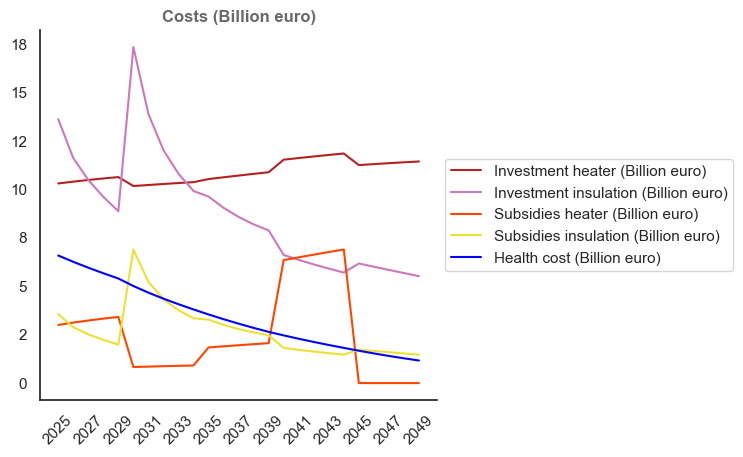

In [11]:
make_line_plot(resirf_costs_df, y_label="Costs (Billion euro)", save=None,
               colors=resources_data["colors_eoles"],
               format_y=lambda y, _: '{:.0f}'.format(y), rotation=45, x_ticks=resirf_costs_df.index[::2])

## New simulations

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from pickle import load
import pandas as pd
import seaborn as sns
from eoles.write_output import format_ax, format_legend

from eoles.write_output import make_area_plot, make_line_plot, plot_simulation, plot_comparison, comparison_simulations
from eoles.inputs.resources import resources_data
sns.set_theme(context="notebook", style="white")

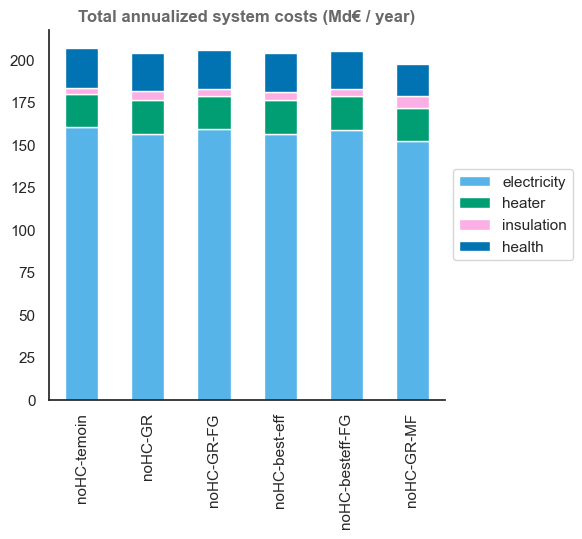

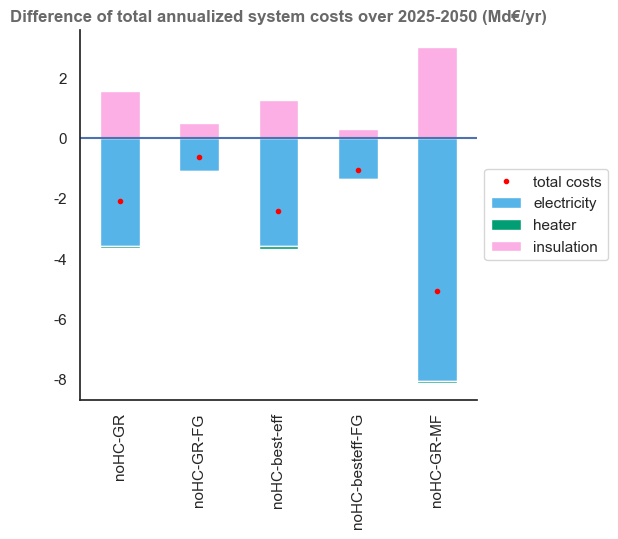

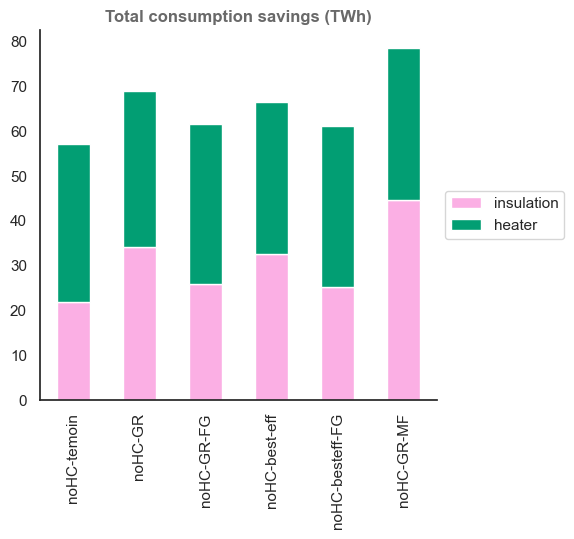

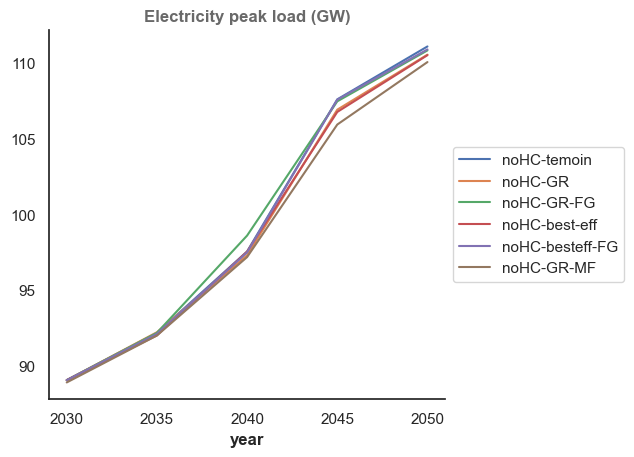

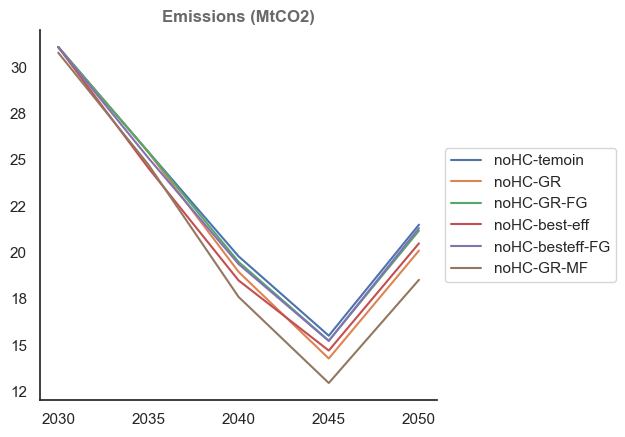

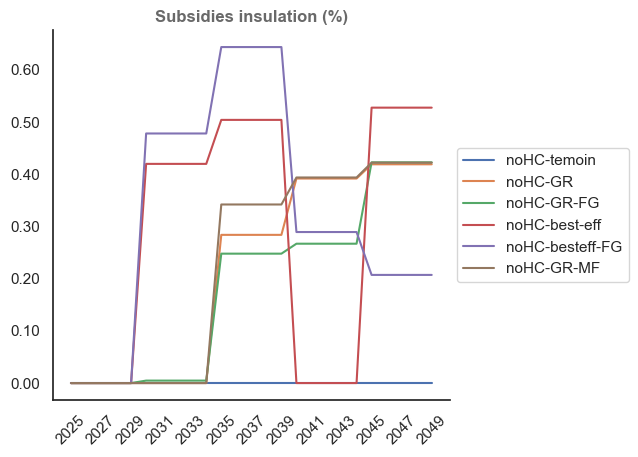

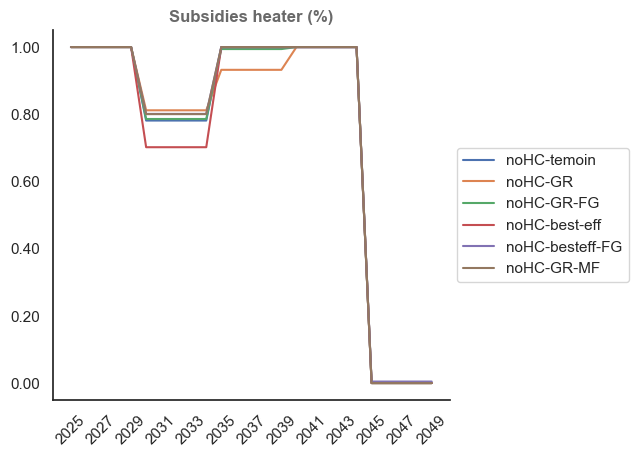

(                                        noHC-temoin   noHC-GR  noHC-GR-FG  \
 Annualized electricity system costs      160.281892 -3.579390   -1.104030   
 Annualized investment heater costs        19.691637 -0.062631   -0.014731   
 Annualized investment insulation costs     3.736250  1.555504    0.495679   
 Annualized health costs                   23.623379 -1.184224   -0.834405   
 Annualized total costs                   207.333159 -3.270742   -1.457486   
 Annualized total costs HC excluded       183.709779 -2.086518   -0.623081   
 
                                         noHC-best-eff  noHC-besteff-FG  \
 Annualized electricity system costs         -3.579859        -1.356917   
 Annualized investment heater costs          -0.106753        -0.004492   
 Annualized investment insulation costs       1.256008         0.312183   
 Annualized health costs                     -0.957739        -1.105761   
 Annualized total costs                      -3.388342        -2.154986   
 A

In [22]:
dict_output = {"noHC-temoin": os.path.join("eoles/outputs/0130_210326_noHC_temoin"),
               "noHC-GR": os.path.join("eoles/outputs/0130_205702_noHC_global_renovation"),
               "noHC-GR-FG": os.path.join("eoles/outputs/0130_205612_noHC_global_renov_FG"),
               "noHC-best-eff": os.path.join("eoles/outputs/0130_205757_noHC_best_eff"),
               "noHC-besteff-FG": os.path.join("eoles/outputs/0130_210645_noHC_best_eff_FG"),
               "noHC-GR-MF": os.path.join("eoles/outputs/0130_210711_noHC_global_renovation_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
comparison_simulations(dict_output, ref="noHC-temoin")

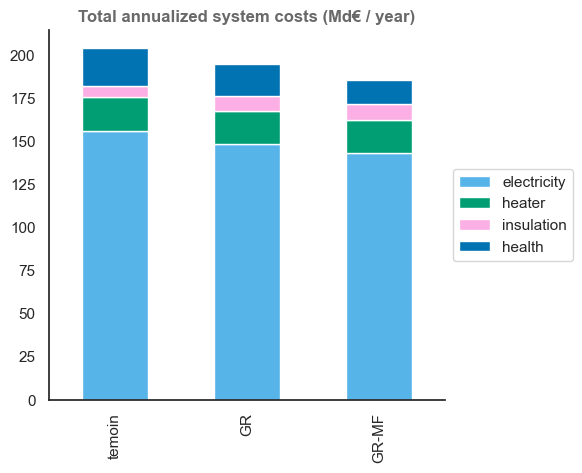

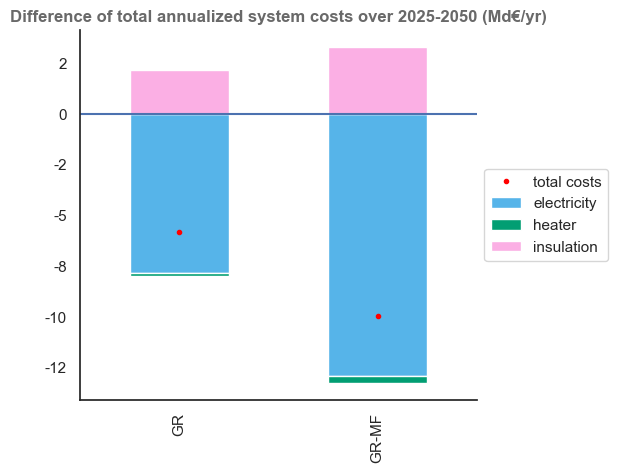

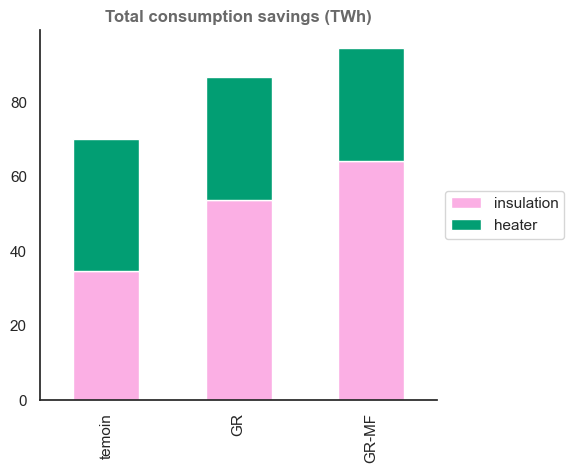

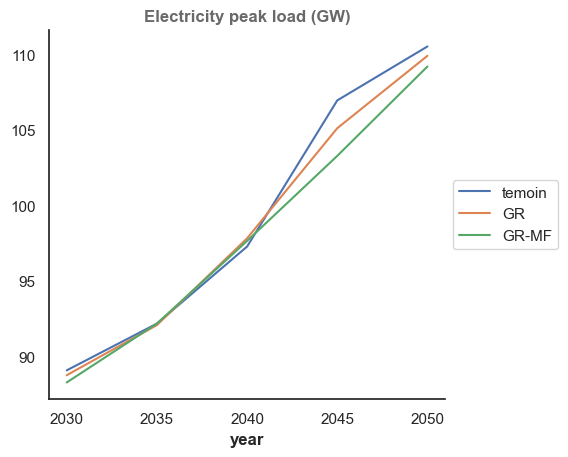

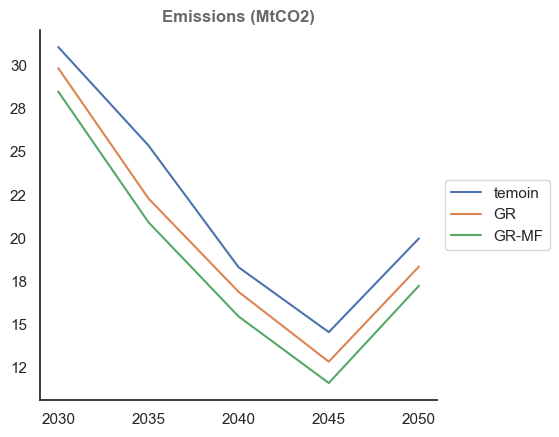

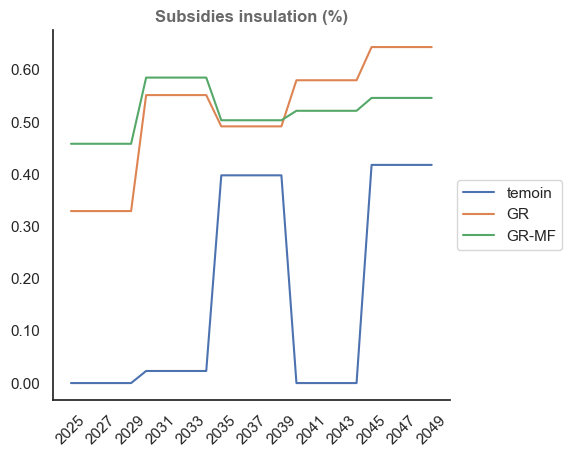

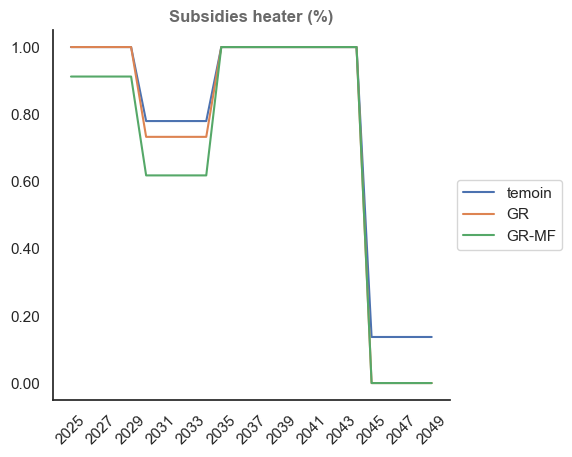

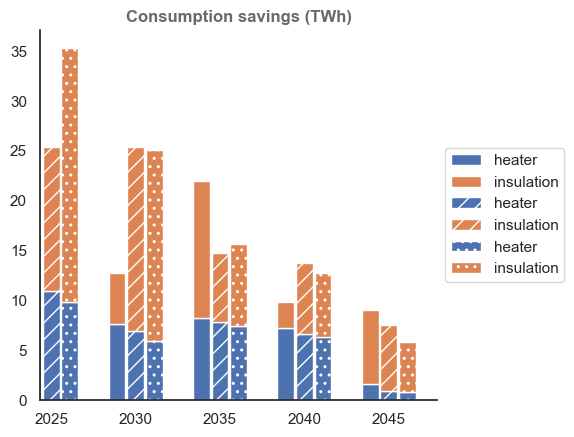

(                                            temoin        GR      GR-MF
 Annualized electricity system costs     156.259881 -7.842156 -12.896766
 Annualized investment heater costs       19.654633 -0.141376  -0.360835
 Annualized investment insulation costs    6.036777  2.143636   3.289902
 Annualized health costs                  22.385486 -3.695303  -8.493380
 Annualized total costs                  204.336776 -9.535198 -18.461079
 Annualized total costs HC excluded      181.951291 -5.839896  -9.967699,
                                         temoin         GR      GR-MF
 Consumption saving insulation (TWh)  34.693261  53.663951  64.234342
 Consumption saving heater (TWh)      35.464690  33.052491  30.322097,
 {'temoin': 2030    31.074845
  2035    25.365035
  2040    18.296822
  2045    14.533931
  2050    19.971085
  Name: Emissions, dtype: float64,
  'GR': 2030    29.850770
  2035    22.292468
  2040    16.870312
  2045    12.819072
  2050    18.338433
  Name: Emissions, dtype: 

In [18]:
dict_output = {"temoin": os.path.join("eoles/outputs/0130_205740_temoin"),
               "GR": os.path.join("eoles/outputs/0130_210542_global_renovation"),
               "GR-MF": os.path.join("eoles/outputs/0130_205638_global_renovation_nolandlord_nomultifamily"),
               # "noHC-best-eff": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
comparison_simulations(dict_output, ref="temoin")

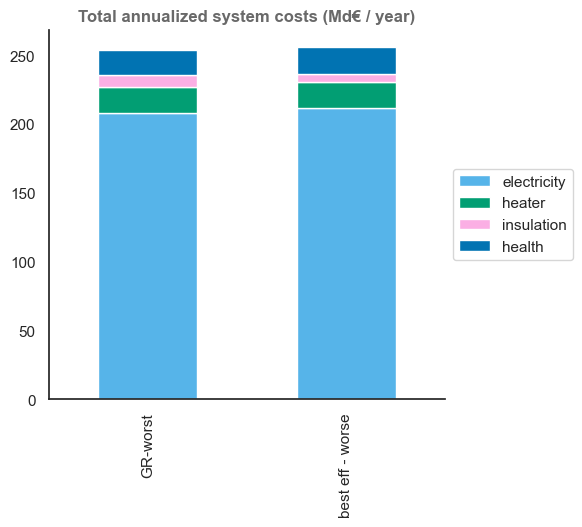

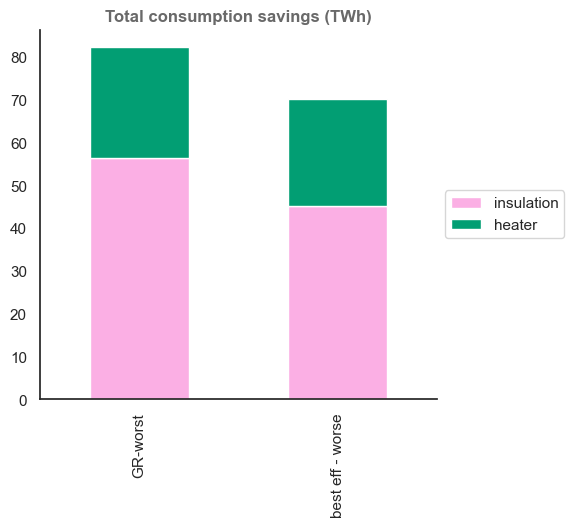

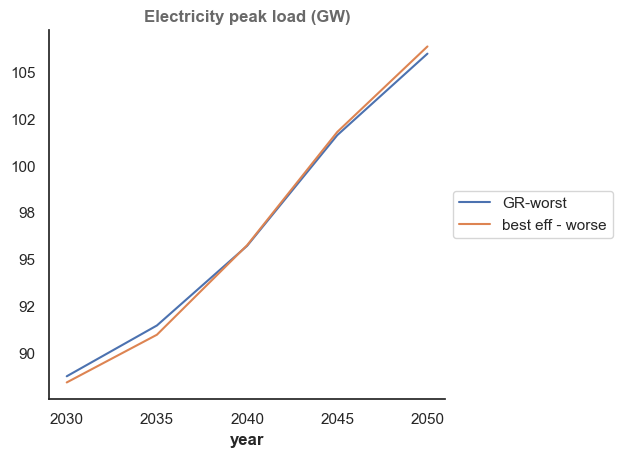

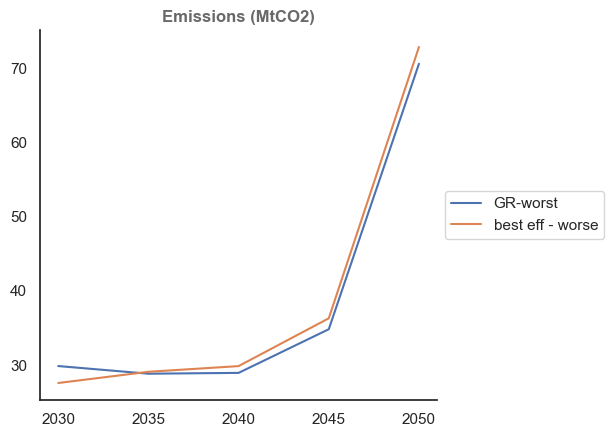

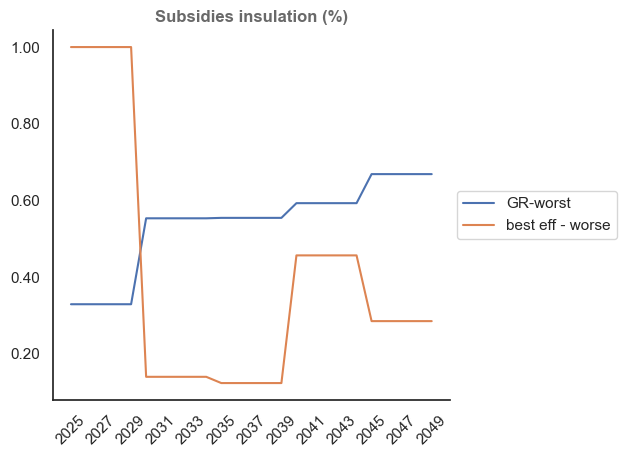

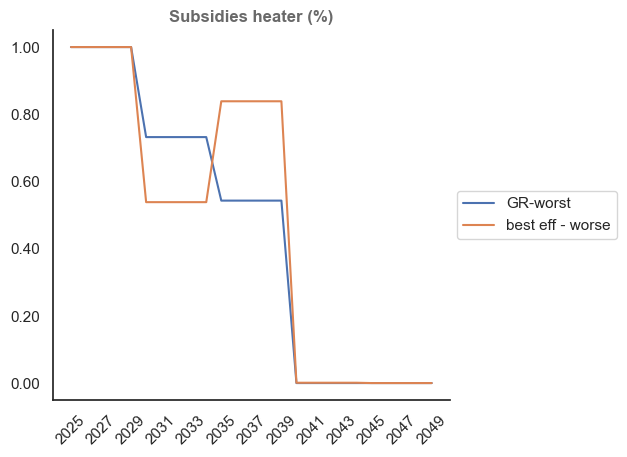

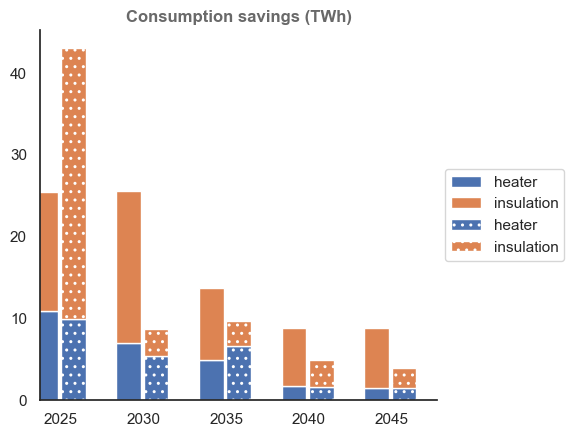

(                                          GR-worst  best eff - worse
 Annualized electricity system costs     208.047044          3.427485
 Annualized investment heater costs       18.919982          0.024864
 Annualized investment insulation costs    8.724299         -2.466862
 Annualized health costs                  18.433273          0.735963
 Annualized total costs                  254.124598          1.721450
 Annualized total costs HC excluded      235.691325          0.985487,
                                       GR-worst  best eff - worse
 Consumption saving insulation (TWh)  56.479217         45.211756
 Consumption saving heater (TWh)      25.807677         24.908371,
 {'GR-worst': 2030    29.850778
  2035    28.820543
  2040    28.931907
  2045    34.807024
  2050    70.538571
  Name: Emissions, dtype: float64,
  'best eff - worse': 2030    27.568577
  2035    29.078038
  2040    29.843927
  2045    36.276899
  2050    72.796649
  Name: Emissions, dtype: float64})

In [21]:
dict_output = {"GR-worst": os.path.join("eoles/outputs/0130_203540_global_renovation_elec_worst"),
               "best eff - worse": os.path.join("eoles/outputs/0130_204522_best_eff_elec_worst"),
               # "GR-FG": os.path.join("eoles/outputs/0130"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
comparison_simulations(dict_output, ref="GR-worst")

## Comparison

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from pickle import load
import pandas as pd
import seaborn as sns
from eoles.write_output import format_ax, format_legend

from eoles.write_output import make_area_plot, make_line_plot, plot_simulation, plot_comparison, comparison_simulations
from eoles.inputs.resources import resources_data
sns.set_theme(context="notebook", style="white")

### HC

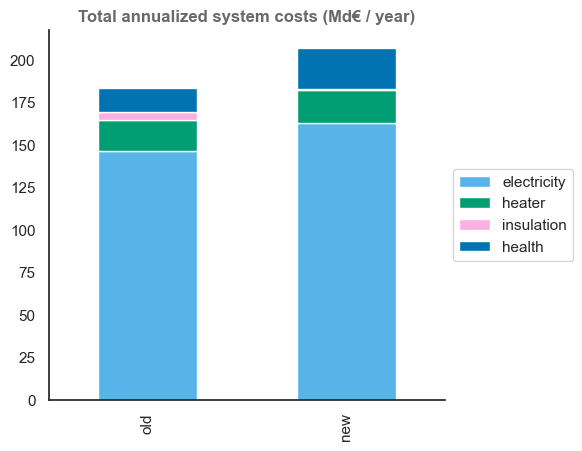

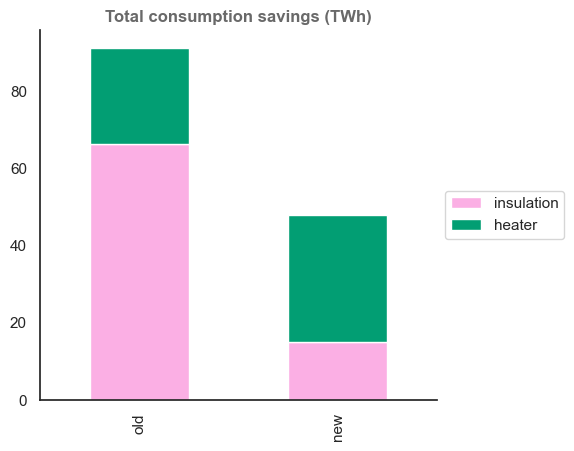

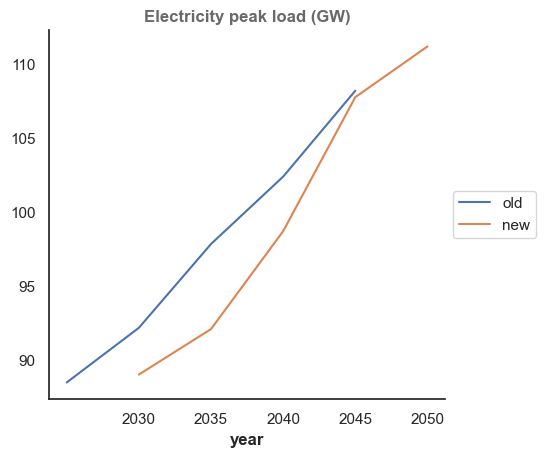

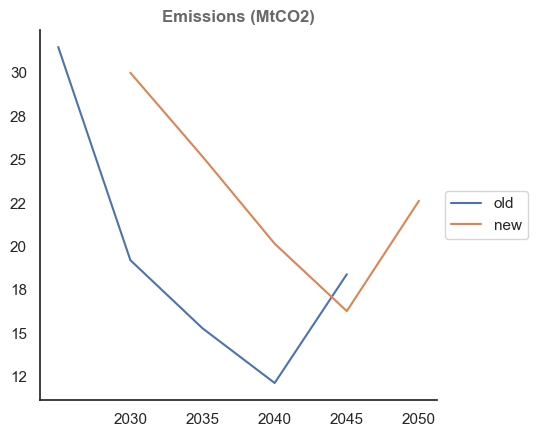

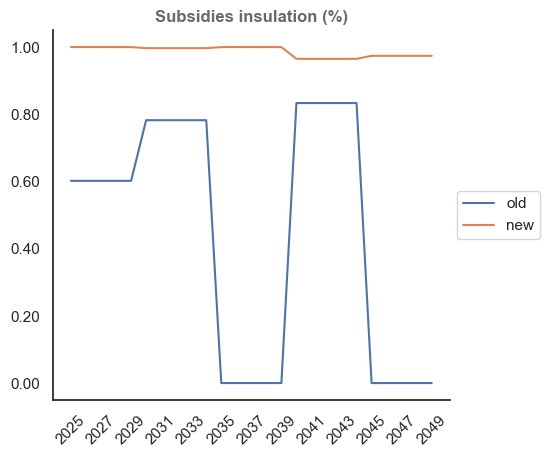

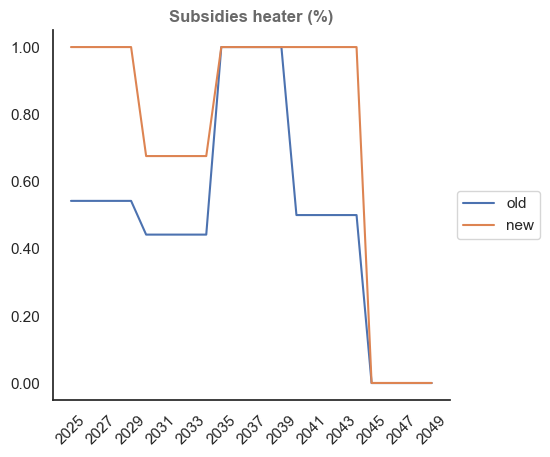

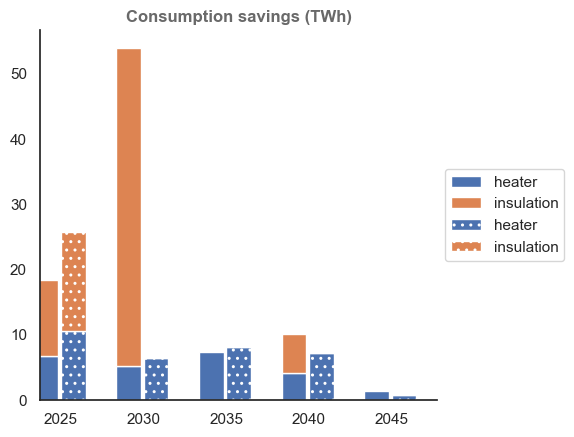

(                                               old        new
 Annualized electricity system costs     146.219595  16.700390
 Annualized investment heater costs       18.351184   1.280571
 Annualized investment insulation costs    4.980779  -4.330127
 Annualized health costs                  14.070557   9.880505
 Annualized total costs                  183.622114  23.531338
 Annualized total costs HC excluded      169.551557  13.650833,
                                            old        new
 Consumption saving insulation (TWh)  66.278513  15.070312
 Consumption saving heater (TWh)      24.919296  32.814968,
 {'old': 2025    31.453743
  2030    19.200877
  2035    15.284460
  2040    12.139386
  2045    18.391971
  Name: Emissions, dtype: float64,
  'new': 2030    29.972724
  2035    25.156756
  2040    20.149000
  2045    16.272301
  2050    22.611356
  Name: Emissions, dtype: float64})

In [11]:
dict_output = {"old": os.path.join("eoles/outputs/0128_235752_noHC_threshold"),
               "new": os.path.join("eoles/outputs/0130_130541_noHC_threshold"),
               # "GR-FG": os.path.join("eoles/outputs/0129_080330_global_renov_FG"),
               # "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               # "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
comparison_simulations(dict_output, ref="old")

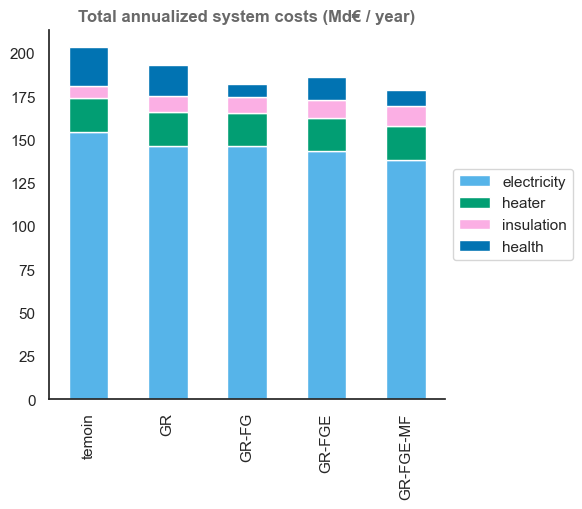

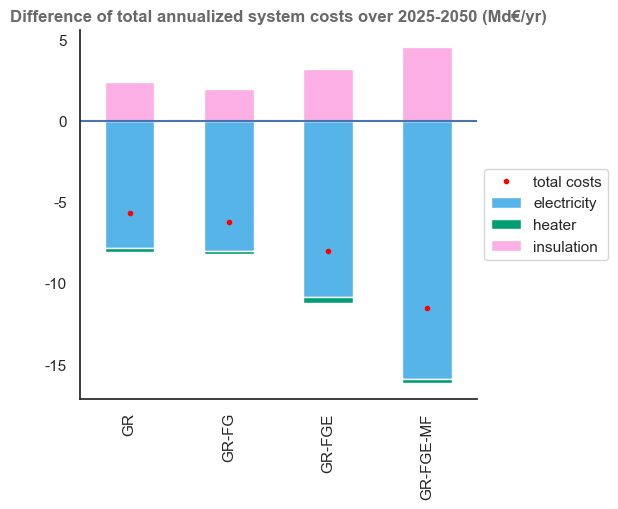

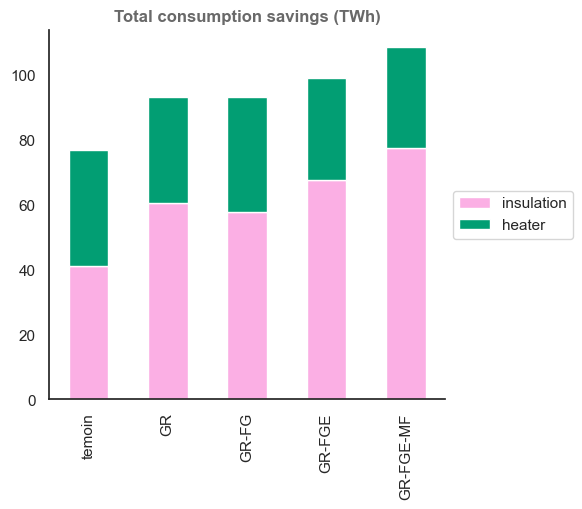

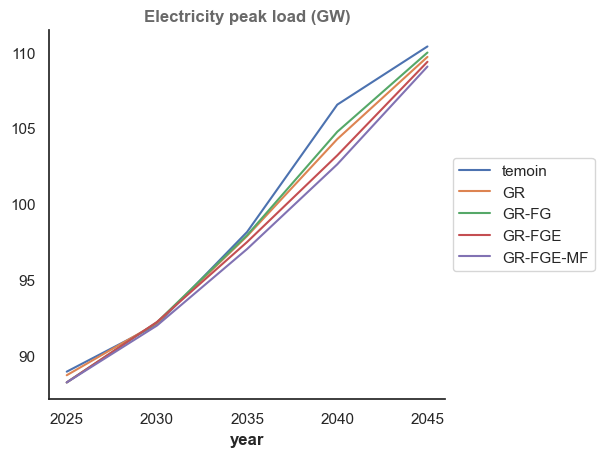

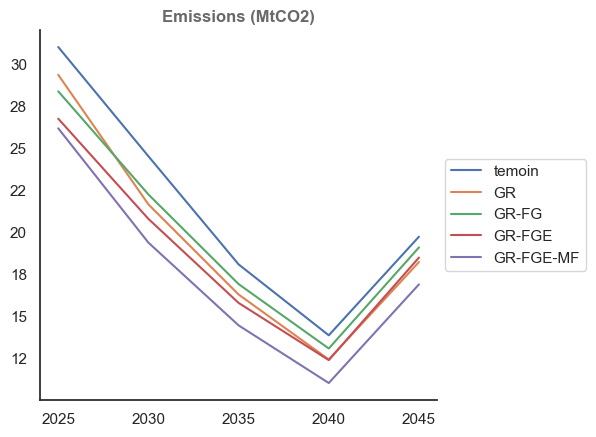

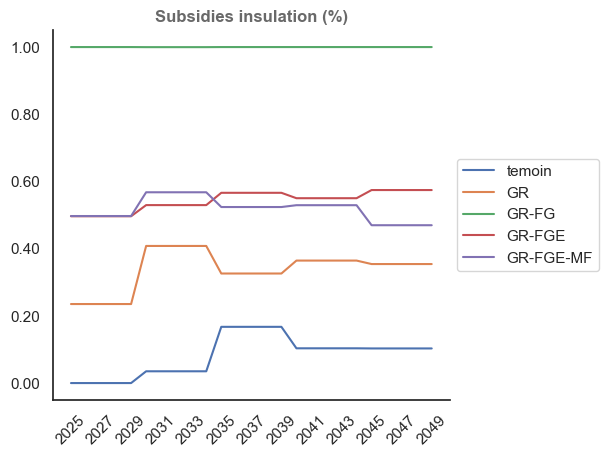

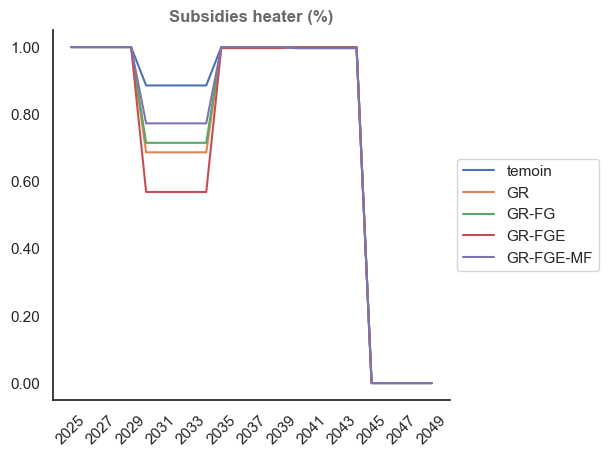

(                                            temoin        GR      GR-FG  \
 Annualized electricity system costs     154.462082 -7.811849  -8.035530   
 Annualized investment heater costs       19.476635 -0.250837  -0.148849   
 Annualized investment insulation costs    7.023880  2.406211   1.983863   
 Annualized health costs                  22.392133 -4.291784 -15.063545   
 Annualized total costs                  203.354730 -9.948259 -21.264062   
 Annualized total costs HC excluded      180.962597 -5.656475  -6.200517   
 
                                            GR-FGE  GR-FGE-MF  
 Annualized electricity system costs    -10.826315 -15.876389  
 Annualized investment heater costs      -0.375171  -0.248153  
 Annualized investment insulation costs   3.197088   4.598402  
 Annualized health costs                 -8.913660 -13.313755  
 Annualized total costs                 -16.918059 -24.839895  
 Annualized total costs HC excluded      -8.004399 -11.526140  ,
                 

In [6]:
dict_output = {"temoin": os.path.join("eoles/outputs/0128_092427_temoin_d32"),
               "GR": os.path.join("eoles/outputs/0128_093246_global_renovation_d32"),
               "GR-FG": os.path.join("eoles/outputs/0129_080330_global_renov_FG"),
               "GR-FGE": os.path.join("eoles/outputs/0129_081743_global_renov_FGE"),
               "GR-FGE-MF": os.path.join("eoles/outputs/0129_081010_global_renov_FGE_nolandlord_nomultifamily"),
               # "noHC + best eff FG": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128")
               }
comparison_simulations(dict_output, ref="temoin")

### No HC

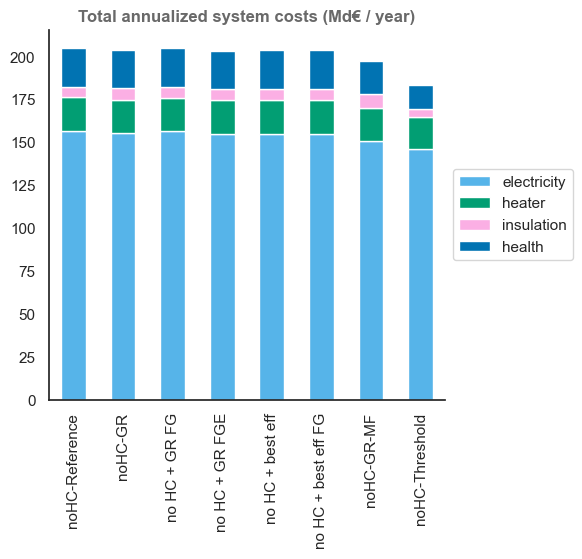

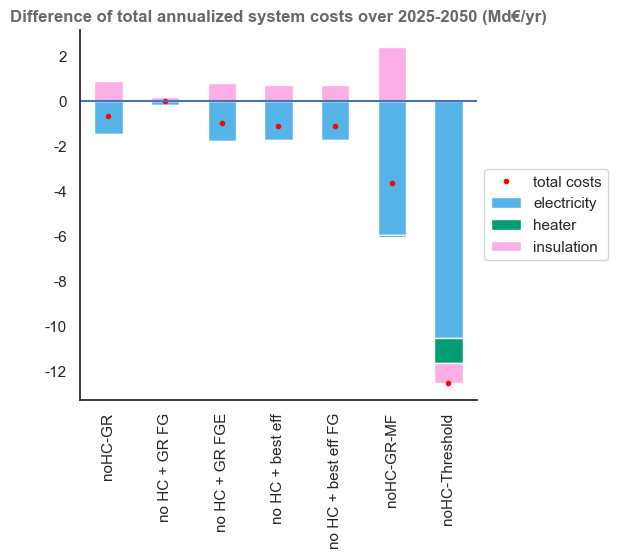

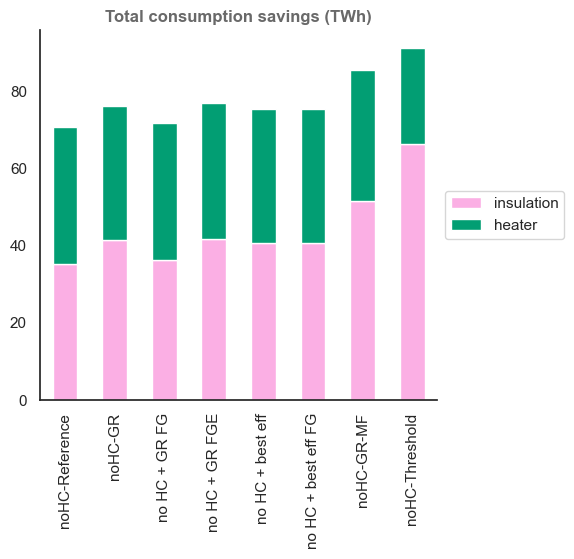

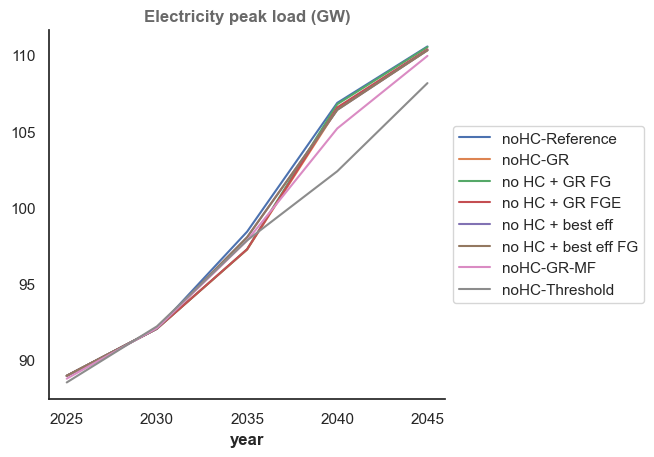

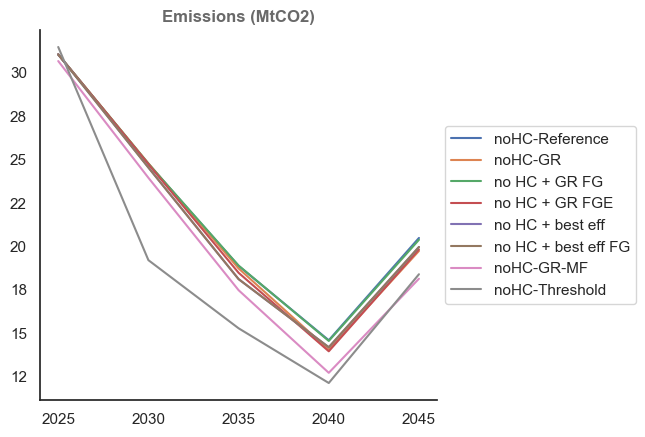

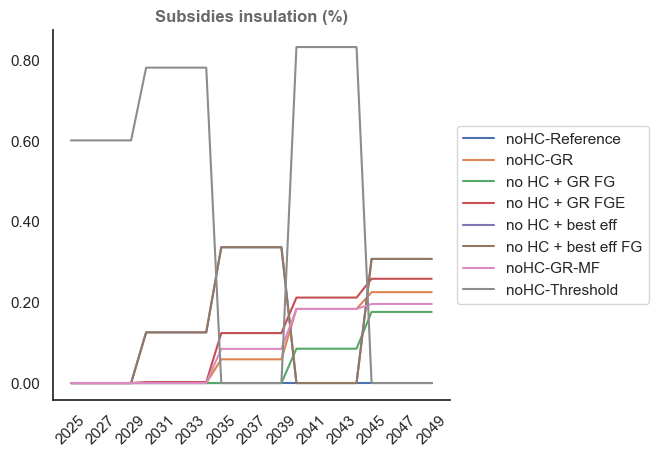

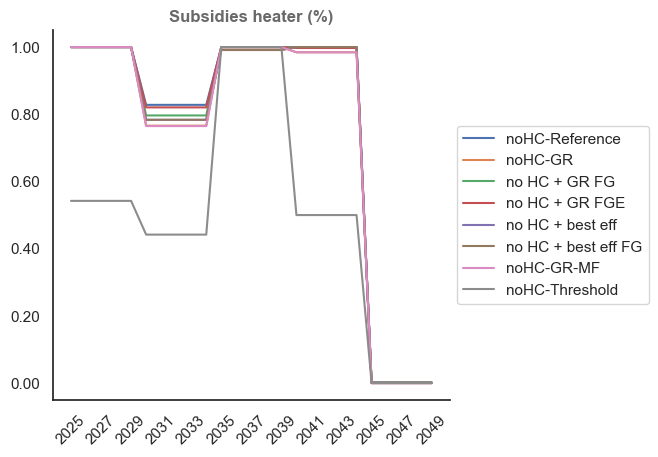

In [15]:
dict_output = {
                "noHC-Reference": os.path.join("eoles/outputs/0128_092618_noHC_temoin_d32"),
               "noHC-GR": os.path.join("eoles/outputs/0128_093915_noHC_global_renovation_d32"),
               "no HC + GR FG": os.path.join("eoles/outputs/0129_084553_noHC_global_renov_FG"),
               "no HC + GR FGE": os.path.join("eoles/outputs/0129_085202_noHC_global_renov_FGE"),
               "no HC + best eff": os.path.join("eoles/outputs/0129_084348_noHC_best_eff"),
               "no HC + best eff FG": os.path.join("eoles/outputs/0129_084527_noHC_best_eff_FG"),
                "noHC-GR-MF": os.path.join("eoles/outputs/0128_093923_noHC_global_renovation_nolandlord_nomultifamily_d32"),
               "noHC-Threshold": os.path.join("eoles/outputs/0128_235752_noHC_threshold")
               }
annualized_costs, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="noHC-Reference")

In [4]:
emissions_dict

{'no HC': 2025    31.027366
 2030    24.723165
 2035    18.871199
 2040    14.597021
 2045    20.477930
 Name: Emissions, dtype: float64,
 'no HC + GR': 2025    31.027366
 2030    24.764719
 2035    18.724454
 2040    14.056171
 2045    19.730320
 Name: Emissions, dtype: float64,
 'no HC + GR + MF': 2025    30.645604
 2030    23.934992
 2035    17.474747
 2040    12.724895
 2045    18.134443
 Name: Emissions, dtype: float64,
 'no HC + threshold': 2025    31.453743
 2030    19.200877
 2035    15.284460
 2040    12.139386
 2045    18.391971
 Name: Emissions, dtype: float64}

In [5]:
consumption_savings_tot_df

noHC-Reference    noHC-GR  \
Consumption saving insulation (TWh)       35.071689  41.286685   
Consumption saving heater (TWh)           35.543148  34.892532   

                                     no HC + GR + MF  
Consumption saving insulation (TWh)        51.484422  
Consumption saving heater (TWh)            33.878980

In [3]:
annualized_costs = annualized_costs.T
annualized_costs["Annualized total costs HC excluded"] = annualized_costs["Annualized total costs"] - annualized_costs["Annualized health costs"]
annualized_costs = annualized_costs.T
annualized_costs

noHC-Reference     noHC-GR  \
Annualized electricity system costs         156.761069  155.298812   
Annualized investment heater costs           19.455675   19.386555   
Annualized investment insulation costs        5.860419    6.737035   
Annualized health costs                      23.201362   22.588942   
Annualized total costs                      205.278525  204.011344   
Annualized total costs HC excluded          182.077163  181.422402   

                                        noHC-GR-MF  noHC-Threshold  
Annualized electricity system costs     150.793146      146.219595  
Annualized investment heater costs       19.363845       18.351184  
Annualized investment insulation costs    8.270083        4.980779  
Annualized health costs                  18.788693       14.070557  
Annualized total costs                  197.215767      183.622114  
Annualized total costs HC excluded      178.427074      169.551557

In [4]:
annualized_costs["noHC-GR"] = annualized_costs["noHC-GR"] - annualized_costs["noHC-Reference"]
annualized_costs["noHC-GR-MF"] = annualized_costs["noHC-GR-MF"] - annualized_costs["noHC-Reference"]
annualized_costs["noHC-Threshold"] = annualized_costs["noHC-Threshold"] - annualized_costs["noHC-Reference"]
annualized_costs

noHC-Reference   noHC-GR  noHC-GR-MF  \
Annualized electricity system costs         156.761069 -1.462257   -5.967923   
Annualized investment heater costs           19.455675 -0.069120   -0.091830   
Annualized investment insulation costs        5.860419  0.876617    2.409664   
Annualized health costs                      23.201362 -0.612420   -4.412669   
Annualized total costs                      205.278525 -1.267181   -8.062758   
Annualized total costs HC excluded          182.077163 -0.654760   -3.650089   

                                        noHC-Threshold  
Annualized electricity system costs         -10.541474  
Annualized investment heater costs           -1.104491  
Annualized investment insulation costs       -0.879640  
Annualized health costs                      -9.130805  
Annualized total costs                      -21.656411  
Annualized total costs HC excluded          -12.525606

In [7]:
annualized_costs.T[["Annualized total costs HC excluded"]].squeeze()

noHC-Reference    182.077163
noHC-GR            -0.654760
noHC-GR-MF         -3.650089
noHC-Threshold    -12.525606
Name: Annualized total costs HC excluded, dtype: float64

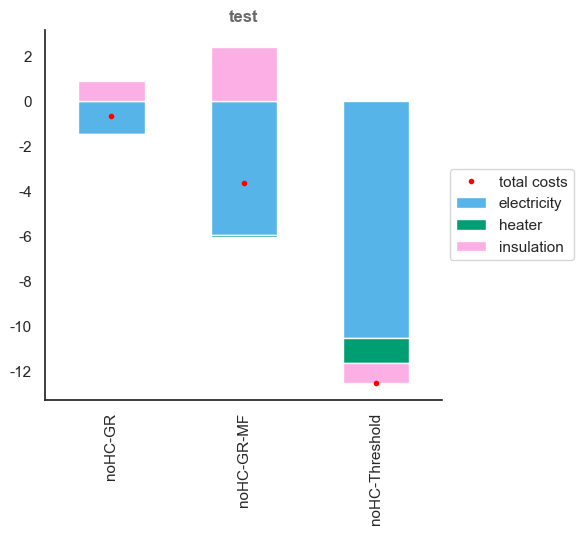

In [5]:
from eoles.write_output import make_stacked_investment_plot, DICT_TRANSFORM_LEGEND
subset_annualized_costs = ["Annualized electricity system costs", "Annualized investment heater costs",
                           "Annualized investment insulation costs"]
make_stacked_investment_plot(df=annualized_costs.drop(columns=["noHC-Reference"]).T, y_label="test", subset=subset_annualized_costs,
                             scatter=annualized_costs.drop(columns=["noHC-Reference"]).T[["Annualized total costs HC excluded"]].squeeze(),
                             save=None, colors=resources_data["colors_eoles"], format_y=lambda y, _: '{:.0f}'.format(y), rotation=90, dict_legend=DICT_TRANSFORM_LEGEND)

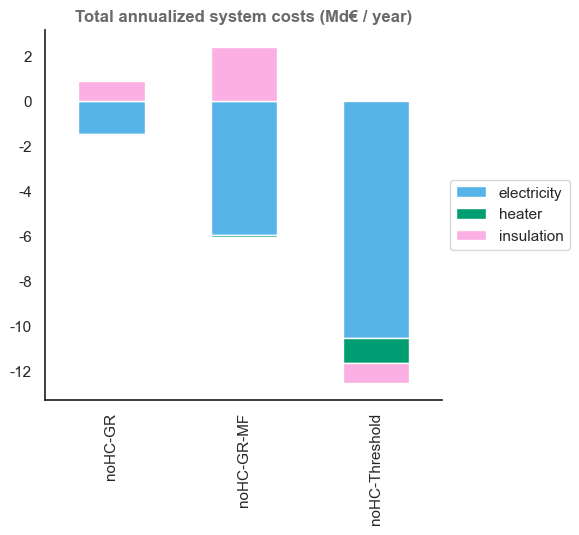

In [21]:
from eoles.write_output import make_stacked_bar_plot, DICT_TRANSFORM_LEGEND
subset_annualized_costs = ["Annualized electricity system costs", "Annualized investment heater costs",
                           "Annualized investment insulation costs"]
make_stacked_bar_plot(annualized_costs.drop(columns=["noHC-Reference"]).T, subset=subset_annualized_costs, y_label="Total annualized system costs (Md€ / year)",
                      colors=resources_data["colors_eoles"], format_y=lambda y, _: '{:.0f}'.format(y), index_int=False,
                      rotation=90, dict_legend=DICT_TRANSFORM_LEGEND)
plt.annotate('',xy=(0,y_min-0.5),xytext=(0,y_max),  arrowprops={"width":3,"headwidth":10,'headlength':5},
             horizontalalignment='center')

### HC VS noHC

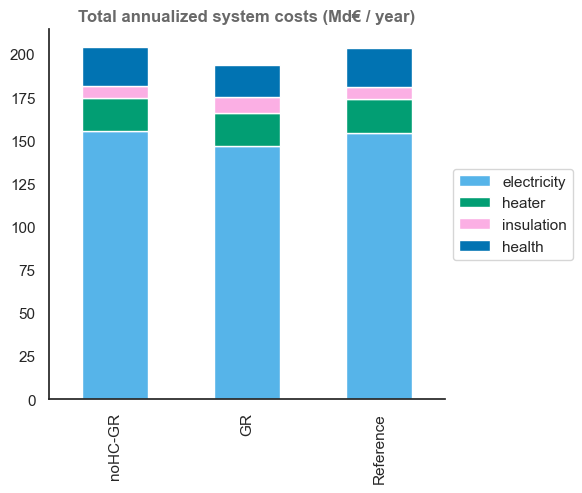

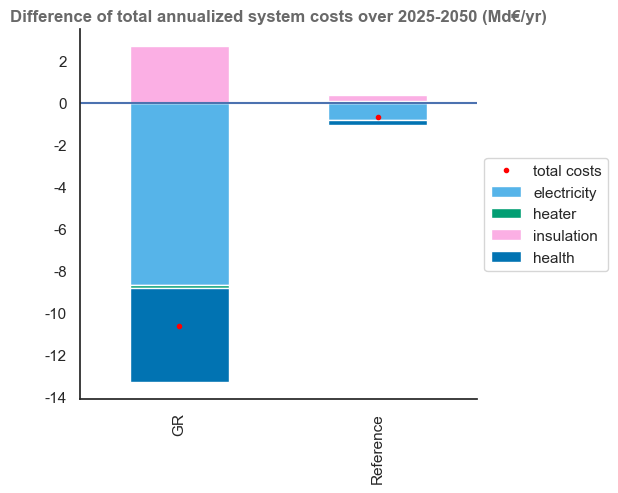

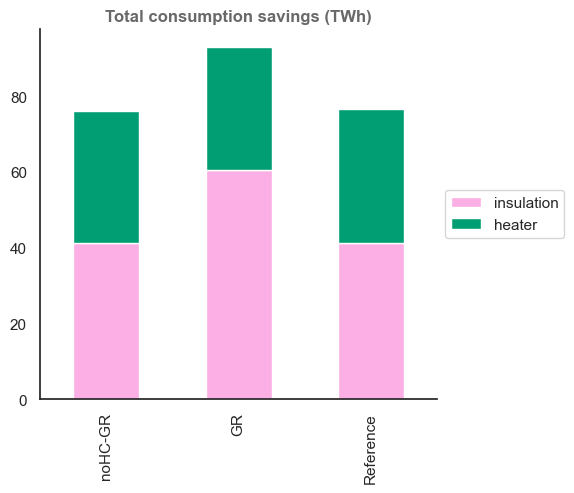

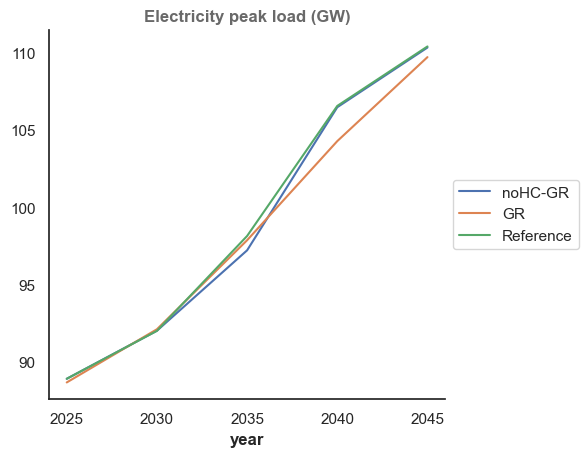

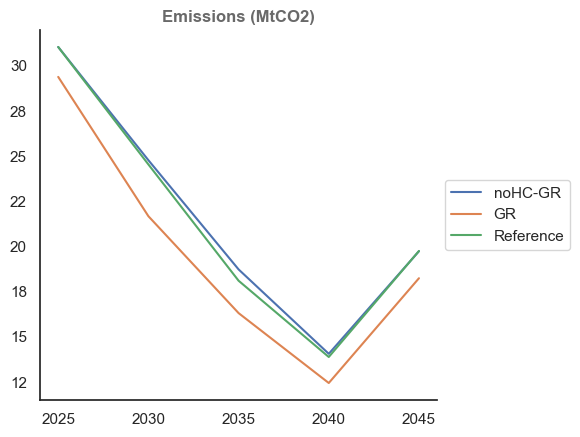

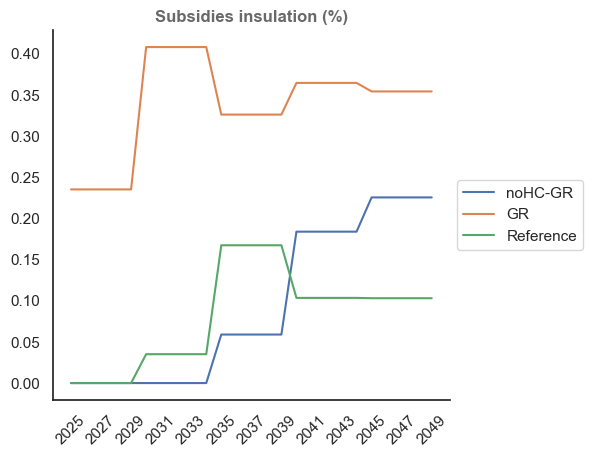

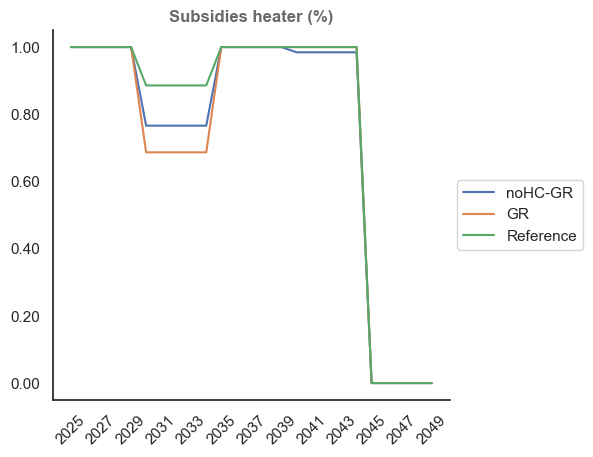

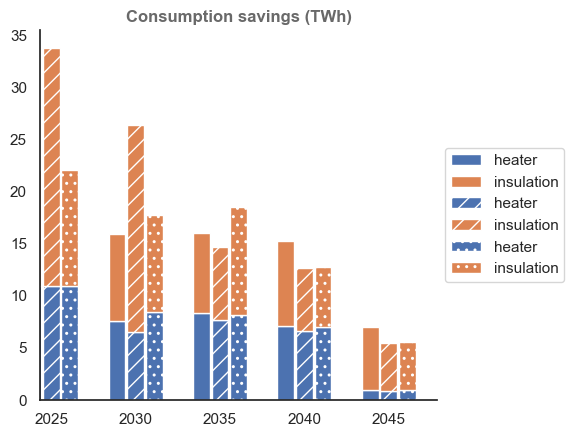

In [8]:
dict_output = {"noHC-GR": os.path.join("eoles/outputs/0128_093915_noHC_global_renovation_d32"),
               "GR": os.path.join("eoles/outputs/0128_093246_global_renovation_d32"),
               "Reference": os.path.join("eoles/outputs/0128_092427_temoin_d32"),
               # "GR-MF": os.path.join("eoles/outputs/0128_093540_global_renovation_nolandlord_nomultifamily_d32"),
               # "GR + MF + DR +TP": os.path.join("eoles/outputs/0127_104249_no_health_costs_landlord_multifamily_global_renovation_technical_progress_d32")
               }
annualized_system_costs_df, consumption_savings_tot_df, emissions_dict = comparison_simulations(dict_output, ref="noHC-GR", health=True)

In [3]:
annualized_system_costs_df

noHC-GR         GR      GR-MF
Annualized electricity system costs     155.298812  -8.648579 -14.559546
Annualized investment heater costs       19.386555  -0.160757  -0.207781
Annualized investment insulation costs    6.737035   2.693056   4.517724
Annualized health costs                  22.588942  -4.488593  -9.379640
Annualized total costs                  204.011344 -10.604873 -19.629243
Annualized total costs HC excluded      181.422402  -6.116280 -10.249603

In [4]:
emissions_dict

{'noHC-GR': 2025    31.027366
 2030    24.764719
 2035    18.724454
 2040    14.056171
 2045    19.730320
 Name: Emissions, dtype: float64,
 'GR': 2025    29.373307
 2030    21.666943
 2035    16.307838
 2040    12.441118
 2045    18.237387
 Name: Emissions, dtype: float64,
 'GR-MF': 2025    28.293334
 2030    20.395519
 2035    14.673552
 2040    10.849116
 2045    16.488277
 Name: Emissions, dtype: float64}

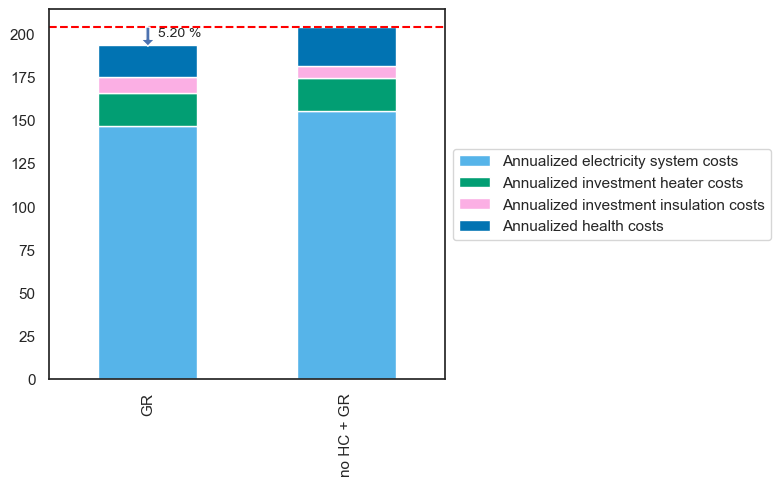

In [63]:
fig, ax = plt.subplots(1, 1)
subset_annualized_costs = ["Annualized electricity system costs", "Annualized investment heater costs",
                           "Annualized investment insulation costs", "Annualized health costs"]
tmp = annualized_dict.T[subset_annualized_costs]
tmp.plot(kind='bar', stacked=True, ax=ax, color=resources_data["colors_eoles"])
y_max = tmp.sum(axis=1).max()
y_min = tmp.sum(axis=1).min()
percent = (y_max - y_min) / y_max * 100
plt.annotate('',xy=(0,y_min-0.5),xytext=(0,y_max),  arrowprops={"width":3,"headwidth":10,'headlength':5},
             horizontalalignment='center')
plt.annotate(str('{:.2f} %'.format(percent)),xy=(0.05,y_min+(y_max-y_min)/2), fontsize=10)
plt.axhline(y=y_max, color="red", linestyle="--")
format_legend(ax)

In [13]:
ax.get_xticks()

array([0, 1])

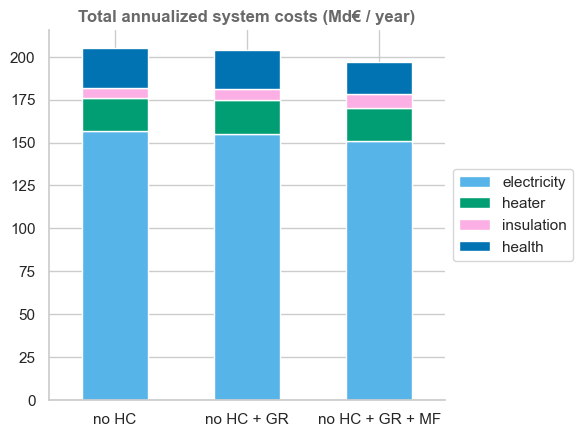

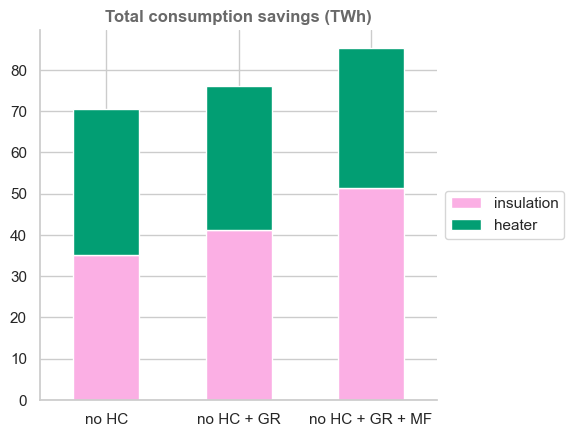

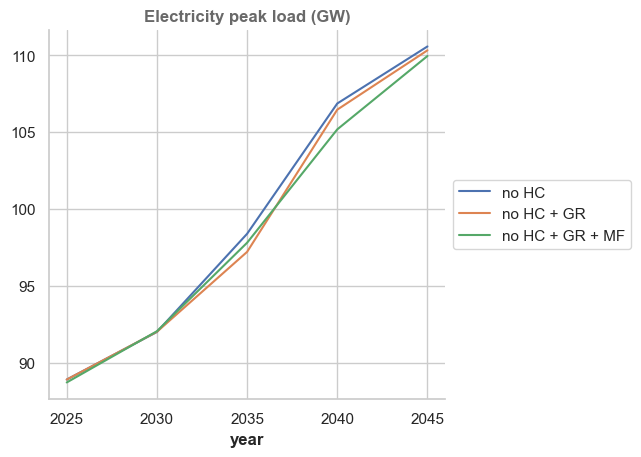

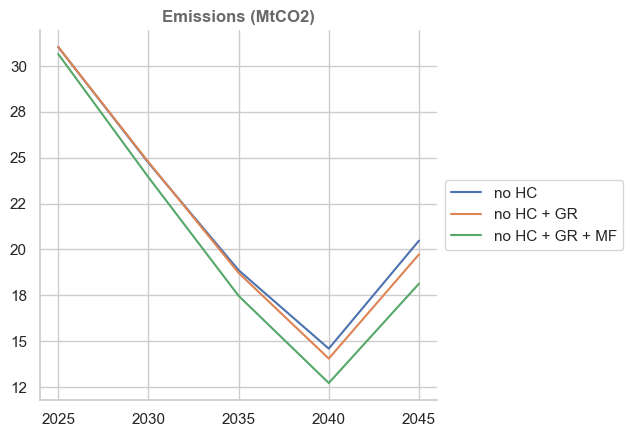

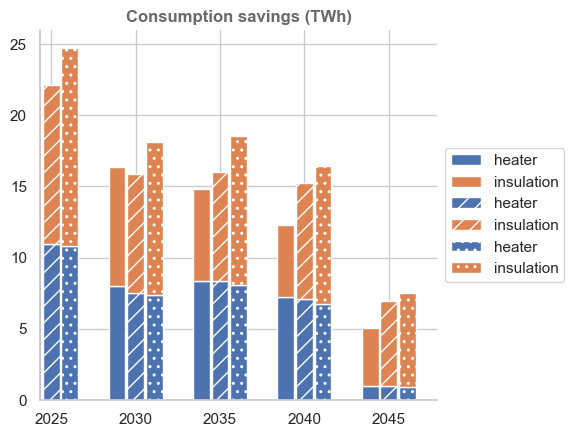

In [2]:
dict_output = {"no HC": os.path.join("eoles/outputs/0128_092618_noHC_temoin_d32"),
               "no HC + GR": os.path.join("eoles/outputs/0128_093915_noHC_global_renovation_d32"),
               "no HC + GR + MF": os.path.join("eoles/outputs/0128_093923_noHC_global_renovation_nolandlord_nomultifamily_d32")
               # "no HC + GR + threshold": os.path.join("eoles/outputs/0128_")
               }
comparison_simulations(dict_output)

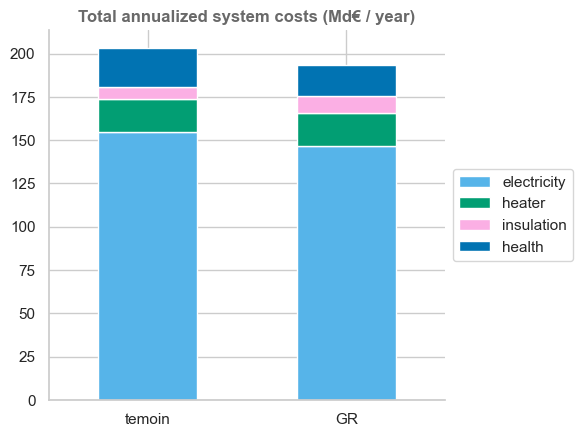

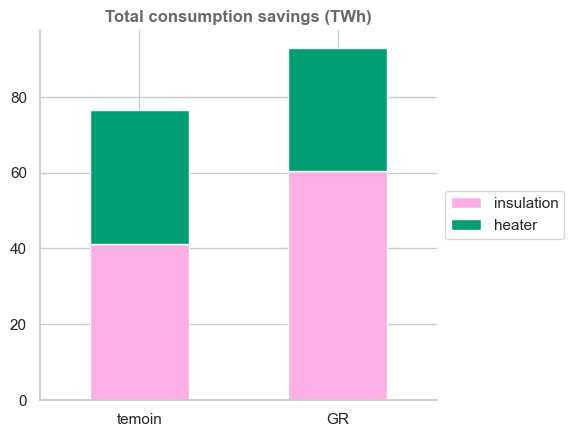

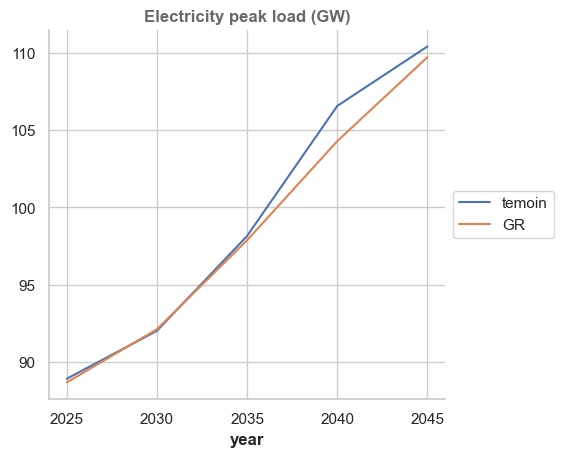

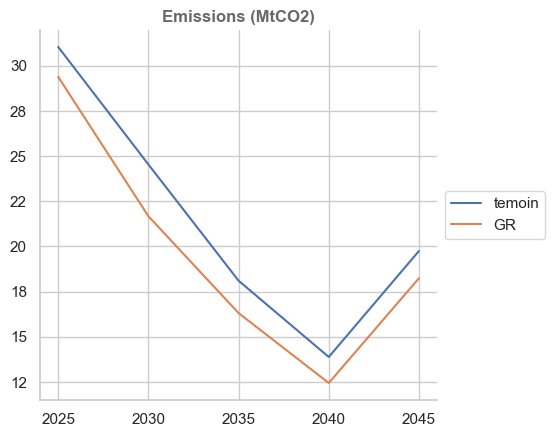

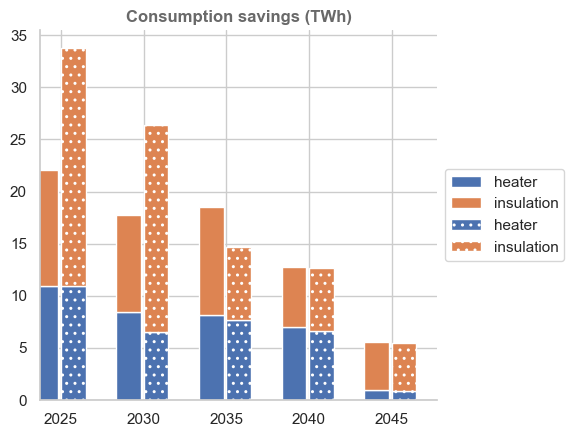

In [3]:
dict_output = {"temoin": os.path.join("eoles/outputs/0128_092427_temoin_d32"),
               "GR": os.path.join("eoles/outputs/0128_093246_global_renovation_d32"),
               # "GR + elec worst + MF": os.path.join("eoles/outputs/0128_091727_global_renovation_elec_worst_nolandlord_nomultifamily_d32")
               }
comparison_simulations(dict_output)

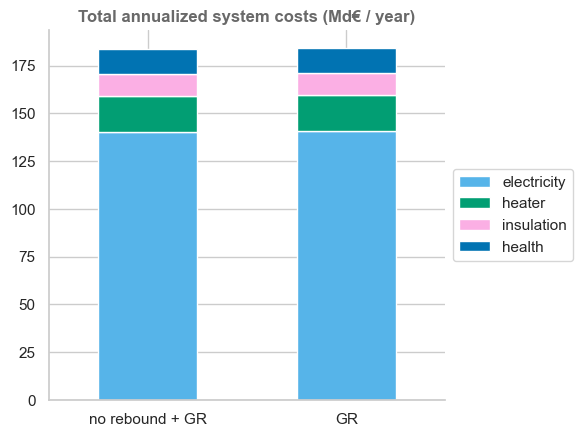

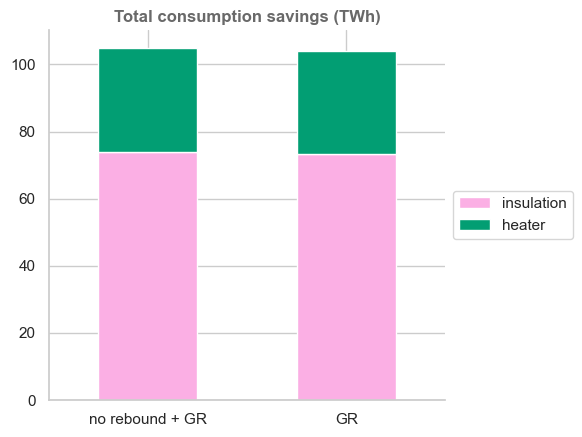

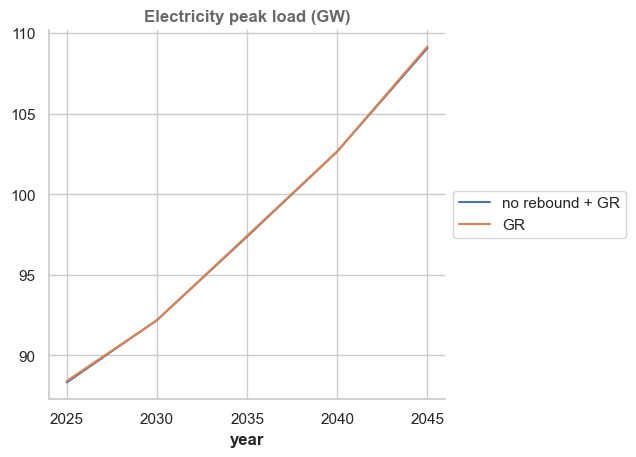

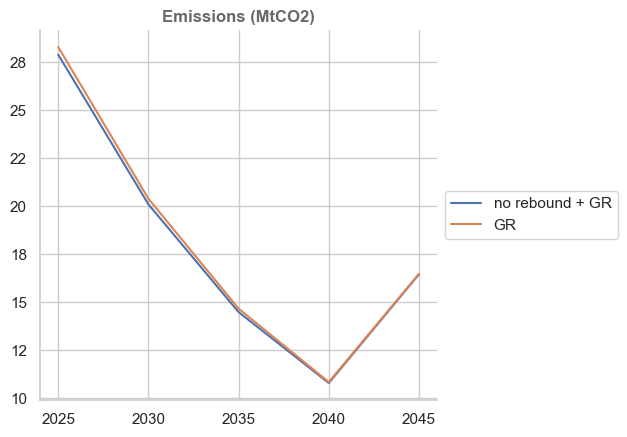

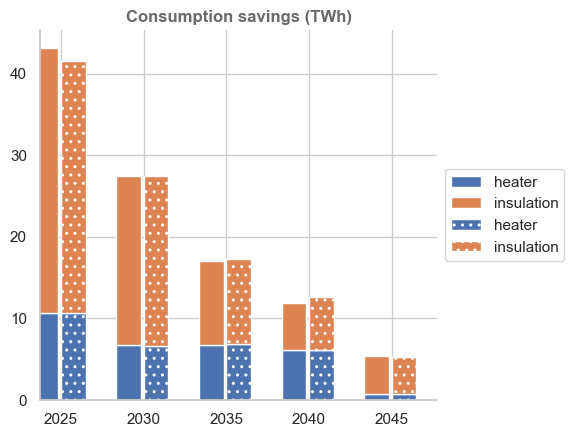

In [7]:
dict_output = {"no rebound + GR": os.path.join("eoles/outputs/0128_160715_global_renovation_nolandlord_nomultifamily_d32_norebound"),
               "GR": os.path.join("eoles/outputs/0128_093540_global_renovation_nolandlord_nomultifamily_d32"),
               # "GR + elec worst + MF": os.path.join("eoles/outputs/0128_091727_global_renovation_elec_worst_nolandlord_nomultifamily_d32")
               }
comparison_simulations(dict_output)

### Worst electricity system

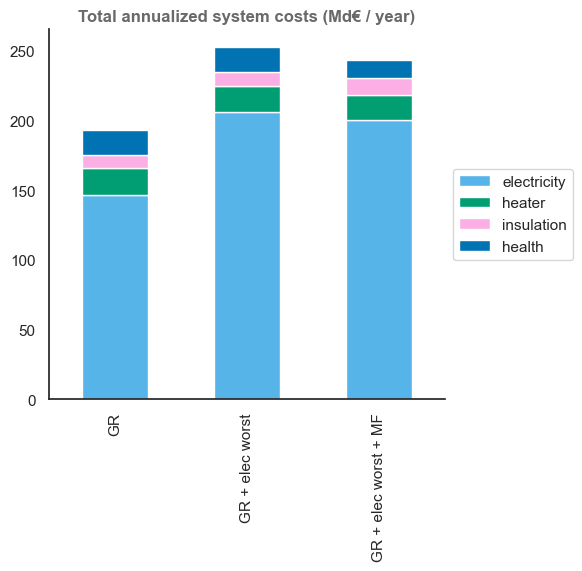

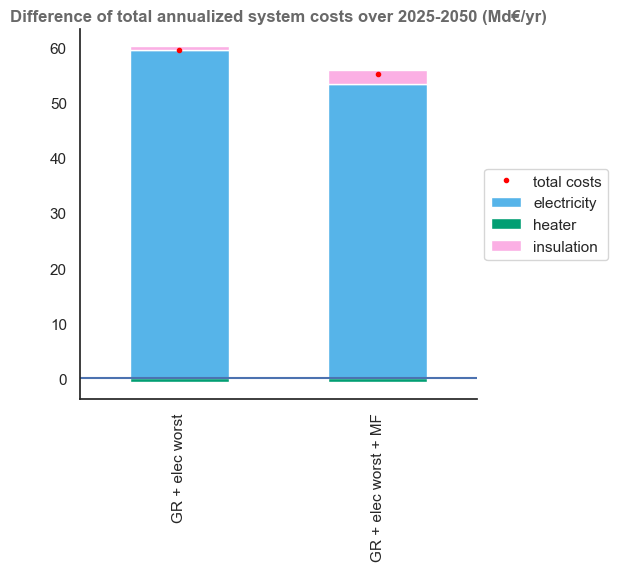

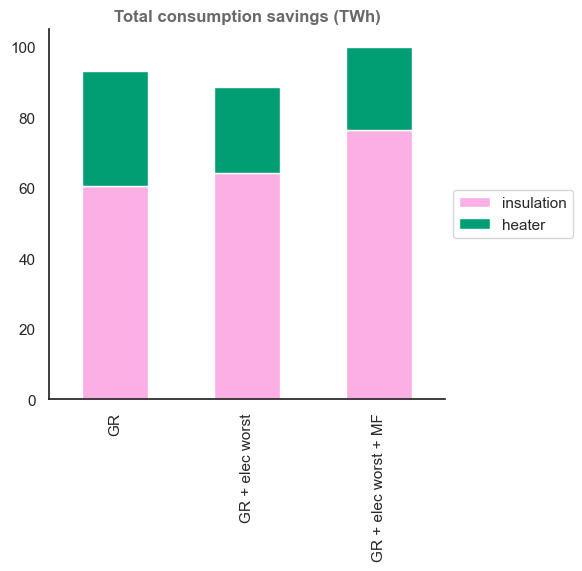

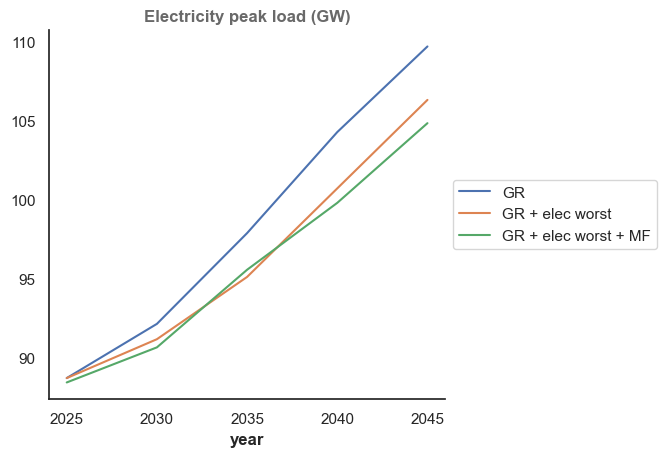

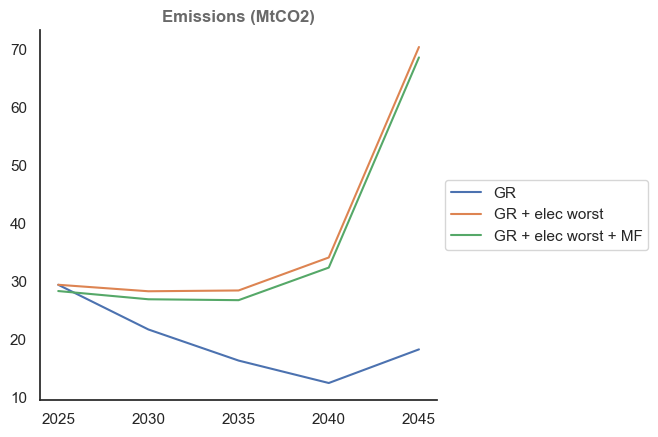

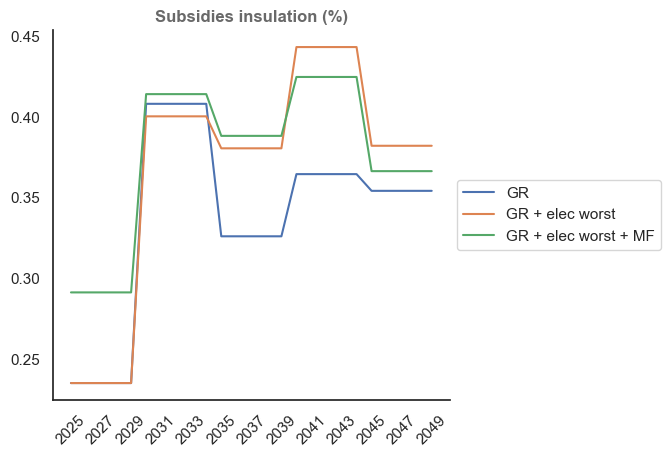

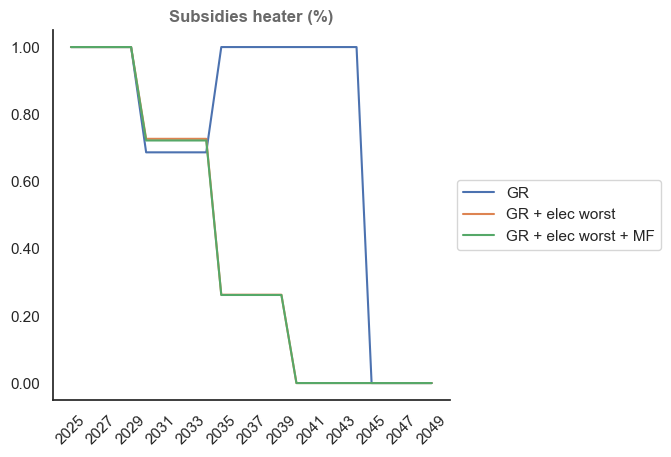

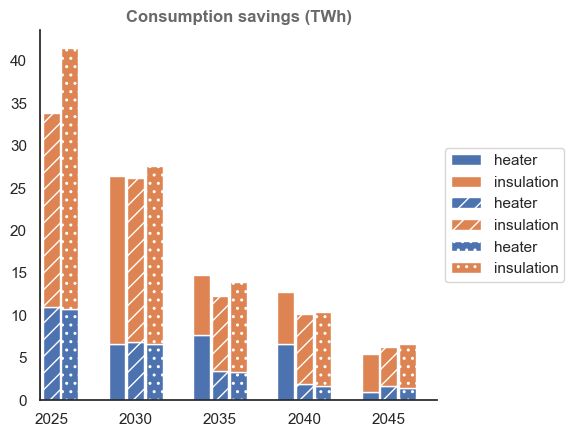

(                                                GR  GR + elec worst  \
 Annualized electricity system costs     146.650233        59.432079   
 Annualized investment heater costs       19.225799        -0.667916   
 Annualized investment insulation costs    9.430091         0.766191   
 Annualized health costs                  18.100349        -0.277544   
 Annualized total costs                  193.406471        59.252810   
 Annualized total costs HC excluded      175.306123        59.530354   
 
                                         GR + elec worst + MF  
 Annualized electricity system costs                53.365118  
 Annualized investment heater costs                 -0.700733  
 Annualized investment insulation costs              2.495122  
 Annualized health costs                            -5.044853  
 Annualized total costs                             50.114654  
 Annualized total costs HC excluded                 55.159507  ,
                                             

In [3]:
dict_output = {"GR": os.path.join("eoles/outputs/0128_093246_global_renovation_d32"),
               "GR + elec worst": os.path.join("eoles/outputs/0128_091951_global_renovation_elec_worst_d32"),
               "GR + elec worst + MF": os.path.join("eoles/outputs/0128_091727_global_renovation_elec_worst_nolandlord_nomultifamily_d32")
               }
comparison_simulations(dict_output, ref="GR")

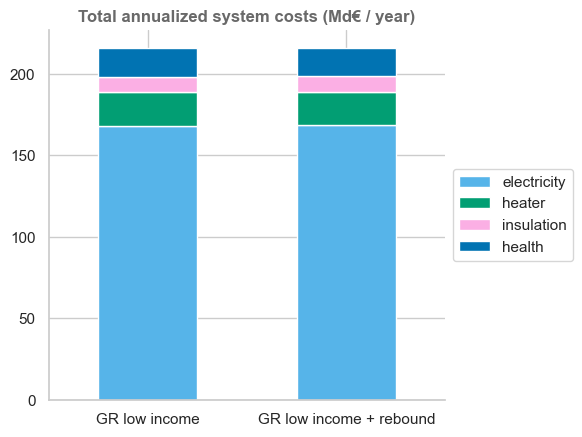

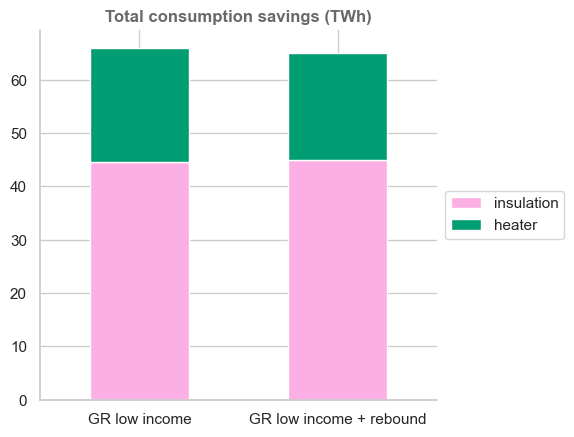

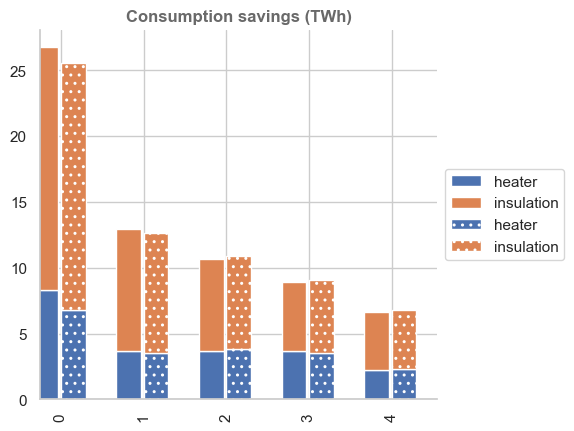

In [75]:
dict_output = {"GR low income": os.path.join("eoles/outputs/0127_103738_global_renovation_low_income"),
               # "GR": os.path.join("eoles/outputs/0127_104159_no_health_costs_global_renovation"),
               "GR low income + rebound": os.path.join("eoles/outputs/0127_164057_global_renovation_low_income_rebound")
               }
comparison_simulations(dict_output)

## Rerun plots

In [2]:
with open(os.path.join('eoles/outputs/0129_081743_global_renov_FGE', 'coupling_results.pkl'), "rb") as file:
    output1 = load(file)

plot_simulation(output1, save_path="eoles/outputs/test_plots")

In [9]:
resirf_consumption_saving_df = output1["ResIRF consumption savings (TWh)"]
resirf_consumption_saving_df

Consumption saving insulation (TWh)  Consumption saving heater (TWh)
2025                            20.701051                         2.349635
2026                             9.379612                         2.232429
2027                             5.877472                         2.114462
2028                             4.216786                         2.015860
2029                             3.260503                         1.930410
2030                             3.115576                         1.202310
2031                             2.520637                         1.164616
2032                             2.115441                         1.129629
2033                             1.820894                         1.096749
2034                             1.595293                         1.065624
2035                             1.628678                         1.590869
2036                             1.414434                         1.546473
2037                             1.245888                         1.504037
2038                             1.110872                         1.463410
2039                             1.000905                         1.424450
2040                             0.869704                         1.390345
2041                             0.796355                         1.346111
2042                             0.734212                         1.303725
2043                             0.680684                         1.263066
2044                             0.633914                         1.224011
2045                             0.626690                         0.184812
2046                             0.589679                         0.181534
2047                             0.556798                         0.178626
2048                             0.527354                         0.176056
2049                             0.500787                         0.173793

In [10]:
resirf_consumption_saving_df.sum(axis=0)

Consumption saving insulation (TWh)    67.520221
Consumption saving heater (TWh)        31.253041
dtype: float64

In [8]:
resirf_consumption_saving_df = resirf_consumption_saving_df.reset_index().rename(columns={'index': 'year'})
resirf_consumption_saving_df["Consumption saving heater cumulated (TWh)"] = resirf_consumption_saving_df["Consumption saving heater (TWh)"].cumsum()
resirf_consumption_saving_df["Consumption saving insulation cumulated (TWh)"] = resirf_consumption_saving_df[
    "Consumption saving insulation (TWh)"].cumsum()
resirf_consumption_saving_df = resirf_consumption_saving_df.loc[resirf_consumption_saving_df["year"] % 5 == 4]  # we only keep rows like 2029, 2034, etc...
resirf_consumption_saving_df["year"] = resirf_consumption_saving_df["year"] + 1  # we modify the row
resirf_consumption_saving_df = resirf_consumption_saving_df.set_index("year")
resirf_consumption_saving_df

Consumption saving insulation (TWh)  Consumption saving heater (TWh)  \
year                                                                         
2030                             3.260503                         1.930410   
2035                             1.595293                         1.065624   
2040                             1.000905                         1.424450   
2045                             0.633914                         1.224011   
2050                             0.500787                         0.173793   

      Consumption saving heater cumulated (TWh)  \
year                                              
2030                                  10.642796   
2035                                  16.301725   
2040                                  23.830963   
2045                                  30.358220   
2050                                  31.253041   

      Consumption saving insulation cumulated (TWh)  
year                                                 
2030                                      43.435425  
2035                                      54.603266  
2040                                      61.004043  
2045                                      64.718913  
2050                                      67.520221

In [76]:
with open(os.path.join('eoles/outputs/0126_110947_design_global_renovation_low_income_maxiter17', 'coupling_results.pkl'), "rb") as file:
    output1 = load(file)

with open(os.path.join('eoles/outputs/0126_105052_design_global_renovation_maxiter17', 'coupling_results.pkl'), "rb") as file:
    output2 = load(file)

In [77]:
consumption_savings1 = output1["ResIRF consumption savings (TWh)"]
consumption_savings2 = output2["ResIRF consumption savings (TWh)"]

consumption_savings1 = consumption_savings1[["Consumption saving insulation (TWh)"]].squeeze().rename("simu1")
consumption_savings2 = consumption_savings2[["Consumption saving insulation (TWh)"]].squeeze().rename("simu1")

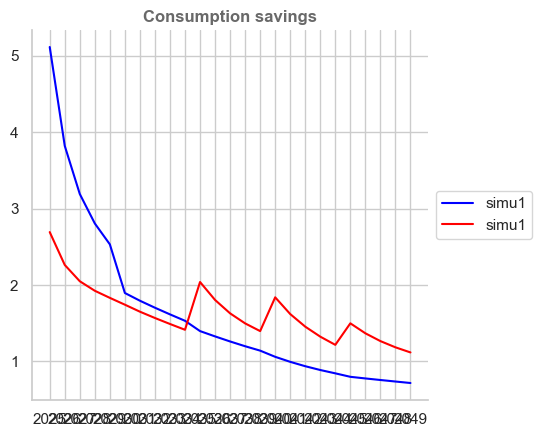

In [78]:
from eoles.write_output import format_ax, format_legend
fig, ax = plt.subplots(1, 1)
consumption_savings1.index = consumption_savings1.index.astype(int)
consumption_savings2.index = consumption_savings2.index.astype(int)

consumption_savings1.plot.line(ax=ax, color="blue")
consumption_savings2.plot.line(ax=ax, color="red")

ax = format_ax(ax, title="Consumption savings", x_ticks=consumption_savings1.index, format_y=lambda y, _: '{:.0f}'.format(y))
format_legend(ax)

In [79]:
ax.get_legend_handles_labels()[1]

['simu1', 'simu1']

In [80]:
consumption_savings1 = output1["ResIRF consumption savings (TWh)"]
# consumption_savings1.sum(axis=0).to_frame().rename(columns={0: "simu1"})
consumption_savings1 = consumption_savings1.reset_index().rename(columns={'index': 'year'})
consumption_savings1["period"] = consumption_savings1.apply(lambda row: (row["year"] - 2025) // 5, axis=1)
consumption_savings1 = consumption_savings1.groupby("period").agg(
    {"year": np.min, "Consumption saving heater (TWh)": np.sum, "Consumption saving insulation (TWh)": np.sum}).set_index("year")

consumption_savings2 = output2["ResIRF consumption savings (TWh)"]
# consumption_savings2.sum(axis=0).to_frame().rename(columns={0: "simu1"})
consumption_savings2 = consumption_savings2.reset_index().rename(columns={'index': 'year'})
consumption_savings2["period"] = consumption_savings2.apply(lambda row: (row["year"] - 2025) // 5, axis=1)
consumption_savings2 = consumption_savings2.groupby("period").agg(
    {"year": np.min, "Consumption saving heater (TWh)": np.sum, "Consumption saving insulation (TWh)": np.sum}).set_index("year")

consumption_savings = pd.concat([consumption_savings1, consumption_savings2], axis=0)

In [81]:
consumption_savings2

Consumption saving heater (TWh)  Consumption saving insulation (TWh)
year                                                                      
2025                        15.896076                            10.755730
2030                         8.545703                             7.861928
2035                         8.482175                             8.363337
2040                         6.819546                             7.451178
2045                         0.587621                             6.431701

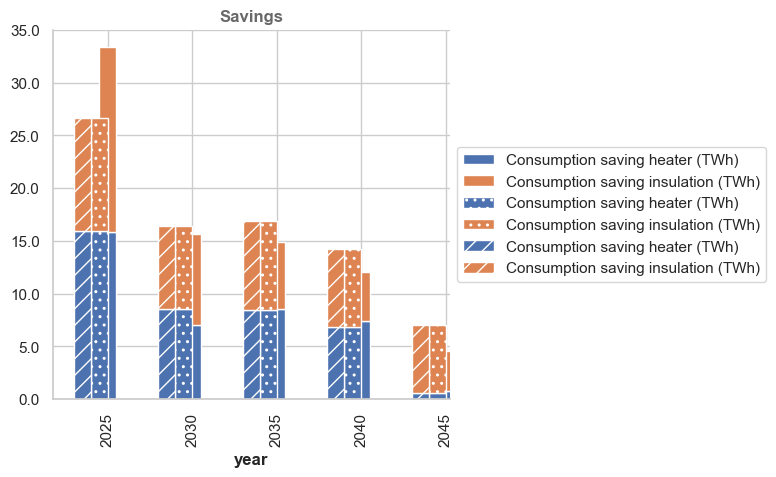

In [82]:
dict_position = {0: -0.6, 1: 0.5, 2: 1.6}
dict_width = {0: 0.2, 1: 0.2, 2: 0.2}

fig, ax = plt.subplots(1, 1)

consumption_savings1.plot(kind='bar', stacked=True, ax=ax, position=0.5, width=0.2, hatch=None)
consumption_savings2.plot(kind='bar', stacked=True, ax=ax, position=1, width=0.2, hatch="..")
consumption_savings2.plot(kind='bar', stacked=True, ax=ax, position=2, width=0.2, hatch="//")

ax = format_ax(ax, title="Savings", rotation=None)
format_legend(ax)


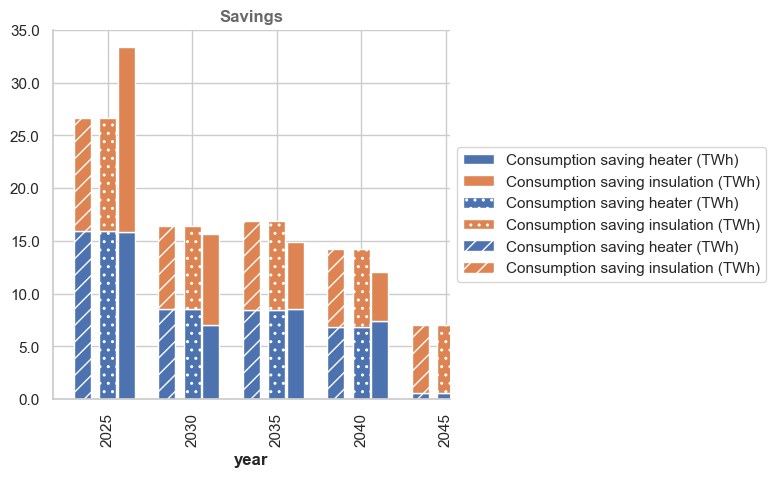

In [83]:
dict_position = {0: -0.6, 1: 0.5, 2: 1.6}
dict_width = {0: 0.2, 1: 0.2, 2: 0.2}

fig, ax = plt.subplots(1, 1)

consumption_savings1.plot(kind='bar', stacked=True, ax=ax, position=-0.6, width=0.2, hatch=None)
consumption_savings2.plot(kind='bar', stacked=True, ax=ax, position=0.5, width=0.2, hatch="..")
consumption_savings2.plot(kind='bar', stacked=True, ax=ax, position=2, width=0.2, hatch="//")

ax = format_ax(ax, title="Savings", rotation=None)
format_legend(ax)


In [84]:
annualized_system_costs1 = output1["Annualized system costs (Billion euro / year)"]
annualized_system_costs1 = annualized_system_costs1.sum(axis=0).to_frame().rename(columns={0: "simu1"})

annualized_system_costs2 = output2["Annualized system costs (Billion euro / year)"]
annualized_system_costs2 = annualized_system_costs2.sum(axis=0).to_frame().rename(columns={0: "simu2"})

annualized_system_costs = pd.concat([annualized_system_costs1, annualized_system_costs2], axis=1)
annualized_system_costs.T

Annualized electricity system costs  \
simu1                           154.091679   
simu2                           154.644320   

       Annualized investment heater costs  \
simu1                           18.724332   
simu2                           18.940701   

       Annualized investment insulation costs  Annualized health costs  \
simu1                                9.361442                19.674137   
simu2                                9.048193                24.548226   

       Annualized total costs  
simu1              201.851590  
simu2              207.181441

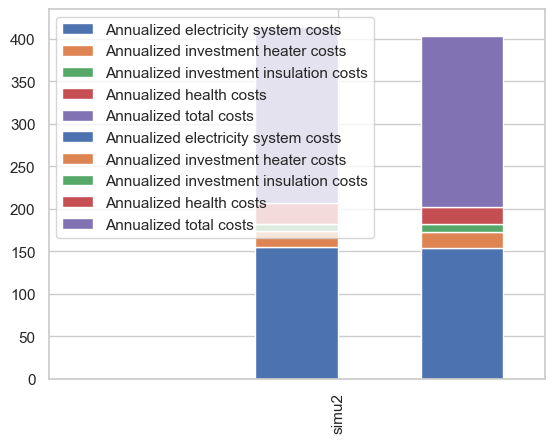

In [85]:
fig, ax = plt.subplots(1, 1)
annualized_system_costs1.T.plot(kind='bar', stacked=True, position=-1, width=0.1, ax=ax)
annualized_system_costs2.T.plot(kind='bar', stacked=True, position=1, width=0.1, ax=ax)

# labels for x & y axis
plt.show()

## Single simulation

In [86]:
with open(os.path.join('eoles/outputs/0127_103850_global_renovation', 'coupling_results.pkl'), "rb") as file:
    output = load(file)

peak_load_info_df = output["Peak load information"]
annualized_system_costs = output["Annualized system costs (Billion euro / year)"]

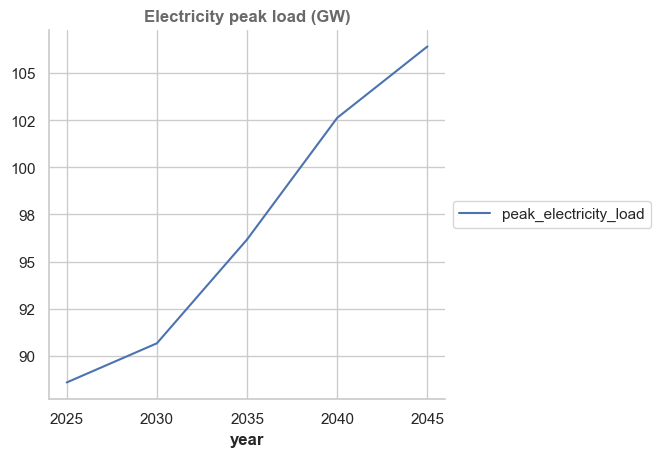

In [87]:
peak_load_info = peak_load_info_df[["peak_electricity_load", "year"]].groupby(["year"]).mean()
make_line_plot(peak_load_info, y_label="Electricity peak load (GW)", save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

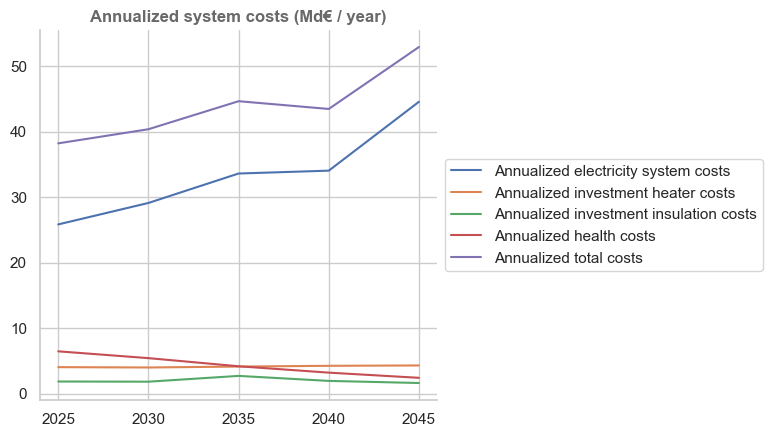

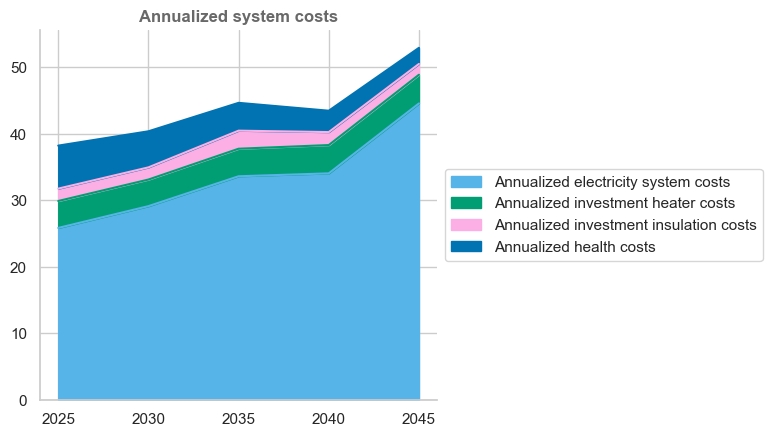

In [88]:
make_line_plot(annualized_system_costs, y_label="Annualized system costs (Md€ / year)",
               save=None, format_y=lambda y, _: '{:.0f}'.format(y))

subset_annualized_costs = ["Annualized electricity system costs", "Annualized investment heater costs", "Annualized investment insulation costs", "Annualized health costs"]
make_area_plot(annualized_system_costs, subset=subset_annualized_costs, y_label="Annualized system costs",
               save=None, format_y=lambda y, _: '{:.0f}'.format(y), colors=resources_data["colors_eoles"])

In [89]:
export_results = 'eoles/outputs/0125_090113_landlord_design_low_income_maxiter17'
for key in output.keys():
    if key != 'Subvention heater' and key != 'Subvention insulation' and key != 'max_iter':
        key_save = '_'.join(key.split('(')[0].lower().split(' ')[:-1])
        output[key].to_csv(os.path.join(export_results, 'dataframes', f'{key_save}.csv'))

In [90]:
export_results = 'eoles/outputs/test_plots'
plot_simulation(output, save_path=os.path.join(export_results, "plots"))

KeyError: 'Peak electricity load'

In [ ]:
subsidies_df = pd.DataFrame(dtype=float)
for e in os.listdir('eoles/outputs'):
    if '0126' in e:
        print(e)
        name = '_'.join(e.split("_")[2:])
        subsidies = pd.read_csv(os.path.join('eoles/outputs', e, 'dataframes', 'subsidies.csv'), index_col=0)
        subsidies_df = pd.concat([subsidies_df, subsidies["Insulation"].rename(name)], axis=1)
        # print(subsidies)

In [ ]:
subsidies_df.to_csv("eoles/outputs/subsidies_total.csv")

In [ ]:
plot_simulation(output_classic, save_path=os.path.join('eoles/outputs/0124_185848_classic_oneshot_scc650_nobiogas_subheaterf_subdesignGas_annuityFalse_maxiter6', "plots"))

In [ ]:
output_classic["ResIRF costs (Billion euro)"]

In [ ]:
output_classic['ResIRF stock heater (Thousand)']

In [ ]:
output_classic.keys()

In [ ]:
for key in output_classic.keys():
    if key != 'Subvention heater' and key != 'Subvention insulation' and key != 'max_iter':
        key_save = '_'.join(key.split('(')[0].lower().split(' ')[:-1])
        output_classic[key].to_csv(os.path.join('eoles/outputs/0124_133525_classic_oneshot_scc2000_nobiogas_subheaterf_maxiter4_no_opti', 'dataframes', f'{key_save}.csv'))

In [ ]:
for key in output_classic.keys():
    if key != "Output global ResIRF" and key != 'Subvention heater' and key != 'Subvention insulation' and key != 'max_iter':
        key_save = '_'.join(key.split('(')[0].lower().split(' ')[:-1])
        output_classic[key].to_csv(os.path.join('eoles/outputs/0124_124419_classic_oneshot_scc1000_nobiogas_subheaterf_maxiter4', 'dataframes', f'{key_save}.csv'))

In [ ]:
output_classic["Output global ResIRF"][2025]

In [ ]:
output_classic["Subsidies (%)"]

In [ ]:
output_classic["Generation (TWh)"]

In [ ]:
with open(os.path.join('eoles/outputs/0123_182811_classic_oneshot_maxiter10', 'coupling_results.pkl'), "rb") as file:
    output_classic = load(file)

with open(os.path.join('eoles/outputs/0123_174538_threshold_oneshot_maxiter10', 'coupling_results.pkl'), "rb") as file:
    output_threshold = load(file)

In [ ]:
output_classic["Capacities (GW)"]

In [ ]:
output_classic["Generation (TWh)"]

In [ ]:
output_threshold["ResIRF consumption (TWh)"]

In [ ]:
output_threshold["Annualized system costs (Billion euro / year)"].sum(axis=1)

In [ ]:
output_classic["Annualized system costs (Billion euro / year)"].sum(axis=1)

In [ ]:
plot_comparison(output_classic, output_threshold, "classic", "threshold")

In [ ]:
output_classic["Capacities (GW)"].T

In [ ]:
df1 = output_classic["ResIRF costs (Billion euro)"].rename(index={2025: "classic"})
df2 = output_threshold["ResIRF costs (Billion euro)"].rename(index={2025: "threshold"})
tmp = pd.concat([df1, df2], axis=0)

In [ ]:
len(tmp.index)

In [ ]:
make_line_plot(tmp, y_label="Capacity power (GWh)",
               colors=None,
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y), index_int=False, str=True)

In [ ]:
generation_df = output["Generation (TWh)"]
generation_df

In [ ]:
make_line_plot( output["ResIRF consumption (TWh)"], subset=["Electricity", "Natural gas", "Oil fuel", "Wood fuel"],
               y_label="Heating consumption (TWh)", colors=resources_data["colors_resirf"],
               save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
plot_simulation(output, save_path=os.path.join("eoles", "outputs", "01210040_threshold"))

In [ ]:
resirf_costs_eff_df = output["ResIRF costs eff (euro / kWh.year)"]
make_line_plot(resirf_costs_eff_df, y_label="Costs per saving (euro / kWh.year)", save=None,
               format_y=lambda y, _: '{:.0f}'.format(y), rotation=45, x_ticks=resirf_costs_eff_df.index[::2])

In [ ]:
resirf_subsidies_df = pd.DataFrame({'Heater': output['Subvention heater'], 'Insulation': output['Subvention insulation']},
                                index=[2025, 2030, 2035, 2040, 2045])

In [ ]:
make_line_plot(resirf_subsidies_df, y_label="Subsidies (%)", save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
output['Generation (TWh)']

In [ ]:
output['ResIRF costs (Billion euro)']

In [ ]:
output.keys()

In [ ]:
plot_simulation(output, save_path=os.path.join("eoles", "outputs", "01210058_classic"))

In [ ]:
with open(os.path.join('eoles/outputs/01191737_classic', 'coupling_results.pkl'), "rb") as file:
    output = load(file)
output["ResIRF replacement heater (Thousand)"] = output["replacement_heater"]
# output["ResIRF consumption (TWh)"] = output["ResIRF consumption (TWh)"] * 1e-3

In [ ]:
output['Subvention insulation']

In [ ]:
resirf_consumption_df = output["ResIRF consumption (TWh)"]
resirf_consumption_df

In [ ]:
plot_simulation(output, save_path=os.path.join("eoles", "outputs", "01191737_classic"))

In [ ]:
with open(os.path.join('eoles/outputs/01191535_classic', 'coupling_results.pkl'), "rb") as file:
    output = load(file)

# Get output
capacity_df = output["capacity"]
new_capacity_df = output["new_capacity"]
generation_df = output["generation"]
primary_generation_df = output["primary_generation"]
weighted_average_elec_price = output["weighted_average_elec_price"]
weighted_average_CH4_price = output["weighted_average_CH4_price"]
lcoe_elec = output["lcoe_elec"]
lcoe_elec_volume = output["lcoe_elec_volume"]
lcoe_elec_value = output["lcoe_elec_value"]
list_sub_heater = output["sub_heater"]
list_sub_insulation = output["sub_insulation"]
list_investment_heater = output["investment_heater_cost"]
list_investment_insulation = output["investment_insulation_cost"]
list_subsidies_heater_cost = output["investment_subsidies_heater_cost"]
list_subsidies_insulation_cost = output["investment_subsidies_insulation_cost"]
list_health_cost = output["health_cost"]
list_electricity_consumption = output["electricity_consumption"]
list_gas_consumption = output["gas_consumption"]
list_wood_consumption = output["wood_consumption"]
list_oil_consumption = output["oil_consumption"]

resirf_costs_df = pd.DataFrame({'Heater': list_investment_heater, "Insulation": list_investment_insulation, 'Subsidies insulation': list_subsidies_insulation_cost,
                                'Subsidies heater': list_subsidies_heater_cost, "Health cost": list_health_cost},
index=[2025, 2030, 2035, 2040, 2045])

resirf_consumption_df = pd.DataFrame({'Electricity': list_electricity_consumption, "Natural gas": list_gas_consumption, 'Oil fuel': list_oil_consumption,
                                'Wood fuel': list_wood_consumption},
index=[2025, 2030, 2035, 2040, 2045])

price_df = pd.DataFrame({'Average electricity price': weighted_average_elec_price.T.squeeze().tolist(),
                         'Average CH4 price': weighted_average_CH4_price.T.squeeze().tolist(), 'LCOE electricity': lcoe_elec.T.squeeze().tolist(),
                         'LCOE electricity value': lcoe_elec_value.T.squeeze().tolist(),
                         'LCOE electricity volume': lcoe_elec_volume.T.squeeze().tolist()}, index=[2025, 2030, 2035, 2040, 2045])

output_test = {
        "Capacities (GW)": output["capacity"],
        "New capacities (GW)": output["new_capacity"],
        "Generation (TWh)": output["generation"],
        "Primary generation (TWh)": output["primary_generation"],
        "Charging capacity (GW)": output["charging_capacity"],
        "Energy capacity (GW)": output["energy_capacity"],
        "Prices (€/MWh)": price_df,
        "Subvention heater": output["sub_heater"],
        "Subvention insulation": output["sub_insulation"],
        "ResIRF costs (Billion euro)": resirf_costs_df,
        "ResIRF consumption (TWh)": resirf_consumption_df,
        "replacement_heater": None
        # "stock_heater": stock_heater_df
    }


In [ ]:
elec_generation = ["offshore_f", "offshore_g", "onshore", "pv_g", "pv_c", "river", "lake", "nuclear", "ocgt",
                   "ccgt"]
make_line_plot(output["Capacities (GW)"].T, subset=elec_generation, y_label="Capacity (GWh)",
               colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
CH4_generation = ["methanization", "pyrogazification", "methanation"]
make_line_plot(output["Capacities (GW)"].T, subset=CH4_generation, y_label="Capacity (GWh)",
               colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
make_area_plot(output["Primary generation (TWh)"].T, y_label="Primary generation (TWh)", colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
output["Generation (TWh)"]

In [ ]:
CH4_generation = ["methanation", "natural_gas", "methanization", "pyrogazification"]
make_area_plot(output["Generation (TWh)"].T, subset=CH4_generation, y_label="Primary generation (TWh)", colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
df = pd.concat([output["Generation (TWh)"].T[CH4_generation], output["Conversion generation (TWh)"].T[["ocgt", "ccgt"]],
                output["ResIRF consumption (TWh)"][["Natural gas"]].rename(columns={'Natural gas': 'Gas for heating'})], axis=1)
df["ocgt"] = - df["ocgt"]
df["ccgt"] = - df["ccgt"]
df['Gas for heating'] = - df['Gas for heating']
make_area_plot(df, y_label="Gas generation and conversion (TWh)", colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
make_line_plot(price_df, y_label="Prices (€ / MWh)", colors=resources_data["colors_eoles"],
               save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
output["ResIRF consumption (TWh)"]

In [ ]:
make_area_plot(output["ResIRF consumption (TWh)"], y_label="Consumption (TWh)", colors=resources_data["colors_resirf"],
               save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
make_line_plot(output["ResIRF costs (Billion euro)"], y_label="Costs (Billion euro)", save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
make_area_plot(resirf_costs_df, y_label="Costs (Billion euro)", save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
make_area_plot(resirf_costs_df, y_label="Costs (Billion euro)", save=None,
               format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
make_area_plot(resirf_consumption_df, y_label="Consumption (TWh)", colors=resources_data["colors_resirf"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
make_area_plot(resirf_costs_df, y_label="Costs (Billion euro)", save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
make_line_plot(price_df, y_label="Prices (€ / MWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
capacity_df

In [ ]:
list_investment_insulation

## Subsidy

## Capacity

In [ ]:
make_line_plot(capacity_df.T, y_label="Capacity (GWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y),
               subset=["offshore_f", "offshore_g", "onshore", "pv_g", "methanization", "nuclear", "electrolysis", "methanation", "pyrogazification"])

In [ ]:
fig = plt.figure()
ax = primary_generation_df.T.plot.area()
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Year")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
sns.set_theme(context="paper", style="whitegrid")
fig = plt.figure()
ax = capacity_df.T[["offshore_f", "offshore_g", "onshore", "pv_g", "methanization", "nuclear", "electrolysis", "methanation", "pyrogazification"]].plot.line()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Capacities (GW)")

In [ ]:
tmp = capacity_df.transpose().stack().reset_index().rename(columns={'level_0': 'year', 'level_1': 'technology', 0: 'capacity'})
tmp['year'] = tmp['year'].apply(str)
tmp = tmp.loc[tmp.technology.isin(["offshore_f", "offshore_g", "onshore", "pv_g", "methanization", "nuclear", "electrolysis", "methanation", "pyrogazification"])]
fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(tmp, x="year", y="capacity", hue="technology")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Capacities (GW)")

In [ ]:
tmp = new_capacity_df.transpose().stack().reset_index().rename(columns={'level_0': 'year', 'level_1': 'technology', 0: 'capacity'})
tmp['year'] = tmp['year'].apply(str)
tmp = tmp.loc[tmp.technology.isin(["offshore_f", "offshore_g", "onshore", "pv_g", "methanization", "nuclear", "electrolysis", "methanation", "pyrogazification"])]
fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(tmp, x="year", y="capacity", hue="technology")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Capacities (GW)")

## Generation

In [ ]:
make_area_plot(primary_generation_df.T, y_label="Generation (TWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
primary_generation_df.T.index

In [ ]:
make_area_plot(primary_generation_df.T, y_label="Generation (TWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
fig = plt.figure()
ax = primary_generation_df.T.plot.area()
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Year")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
l = ax.get_lines()[0]

In [ ]:
l.__dict__.keys()

In [ ]:
l._color

In [ ]:
fig = plt.figure()
ax = primary_generation_df.T.plot.area()
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Year")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
fig = plt.figure()
ax = generation_df.T[["electrolysis", "hydrogen", "methane", "methanation", "natural_gas", "ocgt", "ccgt"]].plot.area()
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Year")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Investment ResIRF

## LCOE

In [ ]:
lcoe_df = pd.concat([weighted_average_elec_price.rename(index={0 : "average_elec_price"}), lcoe_elec.rename(index={0 : "lcoe_elec"}),
                     lcoe_elec_volume.rename(index={0 : "lcoe_elec_volume"}), lcoe_elec_value.rename(index={0 : "lcoe_elec_value"})], axis=0)
lcoe_df

In [ ]:
make_line_plot(lcoe_df.T, y_label="LCOE and price (€/MWh)", colors=resources_data["colors_eoles"], save=None, format_y=lambda y, _: '{:.0f}'.format(y))

In [ ]:
lcoe_df = pd.concat([weighted_average_elec_price.rename(index={0 : "average_elec_price"}), lcoe_elec.rename(index={0 : "lcoe_elec"}),
                     lcoe_elec_volume.rename(index={0 : "lcoe_elec_volume"}), lcoe_elec_value.rename(index={0 : "lcoe_elec_value"})], axis=0)
lcoe_df = lcoe_df.T.reset_index().rename(columns={"index": "year"})
lcoe_df['year'] = lcoe_df['year'].apply(str)

fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(lcoe_df, x="year", y="average_elec_price", label="average_elec_price")
# sns.lineplot(lcoe_df, x="year", y="average_CH4_price", label="average_CH4_price")
sns.lineplot(lcoe_df, x="year", y="lcoe_elec", label="lcoe_elec")
sns.lineplot(lcoe_df, x="year", y="lcoe_elec_volume", label="lcoe_elec_volume")
sns.lineplot(lcoe_df, x="year", y="lcoe_elec_value", label="lcoe_elec_value")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("LCOE and average elec price (€/MWh)")